# Solving the stochastic growth model with irreversible investment, using the bc-MC-PEA

This notebook solves a simple optimal growth model, with irreversible investment.


## This version

* Log-Log model
* Treat the irreversible‐investment multiplier $\mu_t$​ as an additional state (residual) to be solved for.
  
---
---

## I. Model: Optimal Growth Model with Irreversible Investment

The planner’s problem is to choose consumption $\{c_t\}$ and next period’s capital $\{k_{t+1}\}$ to maximize expected utility,

\begin{equation}
\max_{\{c_t,k_{t+1}\}_{t=0}^\infty} \; E_0 \sum_{t=0}^\infty \beta^t \frac{c_t^{1-\sigma}-1}{1-\sigma}
\end{equation}

subject to the resource constraint:
\begin{equation}
k_{t+1} = z_t k_t^\alpha - c_t + (1-\delta)k_t,
\end{equation}
constraint on investment:
\begin{equation}
k_{t+1} \geq (1-\delta)k_t,
\end{equation}
the law of motion for TFP:
\begin{equation}
\log(z_{t+1}) = \rho \log(z_t) + \varepsilon_{t+1},
\end{equation}

The associated FOCs are:
\begin{equation}
\begin{split}
c_t^{-\sigma} - \mu_t &= \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta)\right\}, \\
\end{split}
\end{equation}

\begin{equation}
\mu_t ( k_{t+1} - (1-\delta)k_t) = 0
\end{equation}

\begin{equation}
\mu_t \geq 0
\end{equation}


#### Expectation Function $E_t[\phi_{t+1}]$:
$$
\phi_{t+1} \equiv \beta  \Big( c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta).
\Big)$$
As in the standard case, a parametric approximation is used. For example, one may posit the following log-log model:
\begin{equation}
\begin{split}
\log(E_t[\phi_{t+1}]) & = \theta_0 + \theta_1 \log k_t + \theta_2 \log z_t + \theta_3 \left(\log k_t\right)^2 + \theta_4 \left(\log z_t\right)^2 + \theta_5 \log k_t \cdot \log z_t \\
& = \boldsymbol{s}_t' \boldsymbol{\theta}
\end{split}
\end{equation}

#### Implied consumption

Under the assumption that the constraint does not bind:

\begin{equation}
\tilde{c}_t = \exp(\boldsymbol{s}_t' \boldsymbol{\theta})^{-1/\sigma}
\end{equation}

Consumption choice $\tilde{c}_t$ implies a savings choice: $\tilde{k}_{t+1} = z_t k_t^\alpha - \tilde{c}_t + (1-\delta)k_t$. Two cases can occur:

1. If $\tilde{k}_{t+1} \geq (1-\delta)k_t$, then the irreversible investment constraint does not bind:

\begin{equation}
\begin{split}
c_t & = \tilde{c}_t \\
k_{t+1} &= \tilde{k}_{t+1} \\
\mu_t & = 0
\end{split}
\end{equation}

2. If $\tilde{k}_{t+1} < (1-\delta)k_t$, then the irreversible investment constraint binds and we recover $c_t$ from the budget constraint:
\begin{equation}
\begin{split}
c_t & = z_t k_t^\alpha \\
k_{t+1} & = (1-\delta)k_t \\
\mu_t & > 0
\end{split}
\end{equation}

In case 2, the value of the lagrange multiplier is then:

\begin{equation}
\begin{split}
\mu_t & = c_t^{-\sigma} - \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] - \mu_{t+1} (1 - \ \delta)\right\} \\
& \approx c_t^{-\sigma} - \exp(\boldsymbol{s}_t' \boldsymbol{\theta})
\end{split}
\end{equation}

provided that $\exp(\boldsymbol{s}_t' \boldsymbol{\theta})$ approximates correctly the conditional expectation.

### Accuracy

#### Euler equation error

unit-less Euler equation error (EEE):

\begin{equation}
\begin{split}
    EEE & = 1 - \frac{1}{c_t} \Big( \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right]  -\mu_{t+1} (1 - \ \delta) \right\} + \mu_t \Big)^{-1/\sigma}
\end{split}
\end{equation}

#### mean square integration error of the OLS forecast

mean square integration error (MSIE) is given by:

\begin{equation}
    E\Big[\big(\boldsymbol{s}_m' \boldsymbol{\theta^{*}} - \boldsymbol{s}_m' \boldsymbol{\theta^{(n)}}\big)^{2} \Big] = \frac{\sigma_{g,\varepsilon}^2 k}{N(M-k-1)}, \quad \text{for } M > k+1
\end{equation}

where, by assumption, the true value for the conditional expectation is given by $E_t[\phi_{t+1}] = \boldsymbol{s}_m' \boldsymbol{\theta^{*}}$.

In practice, $\boldsymbol{\theta^{*}}$ is unknow, and instead I calculate $E_t[\phi_{t+1}]$ very accurately, using a Gaussian quadrature for the integral with respect to the innovation variable.


---

## II. Computations


### Roadmap

<div style="background-color: #f0f0f0; padding: 10px;">    
    
#### Subsection 1


#### Subsection 2

</div>

### II. A. Load libraries, functions and types

In [1]:
on_Colab = True #True
import time, os

def is_chaospy_installed():
    try:
        import chaospy
        return True
    except ModuleNotFoundError:
        return False

# Usage
if is_chaospy_installed():
    print("chaospy is installed.")
else:
    print("chaospy is not installed.")

# Install deps on Colab
if (on_Colab == True) & (is_chaospy_installed() == False):
    print("Installing packages...")
    %shell pip install -v quantecon interpolation chaospy --user
    #Restart runtime
    print("Runtime is now restarting...")
    print("You can ignore the error message [Your session crashed for an unknown reason.]")
    time.sleep(0.5)
    os._exit(0)  # restart
    # torch torchcontrib torch-optimizer
else:
    print("Packages already installed")

chaospy is installed.
Packages already installed


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
import scipy.stats
import chaospy  ## for quadrature
from itertools import product
import os
import re
import subprocess
import shutil

import time
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

import seaborn as sns; sns.set()
from tqdm import tqdm as tqdm
import datetime
from typing import Tuple
class Vector: pass
from scipy.stats import norm

import torch
from torch import nn
from torch.utils.data import DataLoader, Subset, Dataset, TensorDataset
from torch.nn.utils import clip_grad_norm_

# To create copies of NN
import copy
import matplotlib.ticker as mtick
# To use sparse kronecker product
from scipy import sparse

import itertools
# Interpolations
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

# Regressions
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
lowess = sm.nonparametric.lowess

import quantecon as qe
from interpolation import interp
from quantecon.optimize import brentq
from numba import njit
#from numba.experimental import jitclass
#import copy # Not used so far

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

import platform,socket,re,uuid,json,psutil,logging, cpuinfo, shutil

from scipy.stats import chi2

In [3]:
# Store parameters
class MyParams():
    """
    N: number of draws for innovation vector
    M: number of draws for the state vector
    ...
    """
    def __init__(self, N, M, lr, optimizer, nb_epochs, order_gauss,
                 beta, alpha, gamma, delta, std_tfp, rho_tfp,
                 regression_two_steps, feasible_GLS, effective_sample_size):
        # Model parameters
        self.beta = beta # Discount factor (patience)
        self.alpha = alpha # Capital share in production
        self.gamma = gamma # CRRA coefficient
        self.one_min_gamma = 1 - gamma #pre-compute
        # depreciation rate capital
        self.delta = delta
        # Standard deviation exo random variables
        self.std_tfp = std_tfp #0.01
        # Mean value exo random variables
        self.mean_tfp = 1.0
        # Persistence params
        self.rho_tfp = rho_tfp # Persistence log TFP values
        # Non stochastic steady state calculations
        self.kss = ((1 - self.beta * (1 - self.delta)) / (self.alpha * self.beta)) ** (1 / (self.alpha - 1))
        self.std_k = 0 #std. dev capital
        self.css = self.kss**self.alpha - self.delta*self.kss
        self.std_c = 0 #std. dev consumption
        self.zss = 1
        self.std_z = 0
        self.tol_c = 1e-3 #to prevent negative consumption
        # Dependent variable in level or log
        self.formula = ""
        # Options for OLS regression
        self.center_dep_var = False #True #False #demean
        self.normalize_dep_var = False #True #False #divide by std. dev
        self.nb_expl_vars = 10   # including constant
        if self.nb_expl_vars not in (4, 6, 10):
            raise ValueError( f"nb_expl_vars must be one of (4, 6, 10); got {self.nb_expl_vars}"  )
        self.basis = 2          # 1: monomial, 2: Chebyshev
        if self.basis not in (1, 2):
            raise ValueError( f"basis must be either 1 (monomial) or 2 (Chebyshev); got {self.basis}" )
        self.regression_two_steps = regression_two_steps #Use the two-step regression described in appendix (approximation to full GLS)
        self.feasible_GLS = feasible_GLS #
        if self.regression_two_steps and self.feasible_GLS:
            raise RuntimeError("Both regression_two_steps and feasible_GLS are True. Choose one of the options.")
        # Correction for serial correlation in dependent variables
        self.effective_sample_size = effective_sample_size
        self.nb_shocks = 1
        ## State: Distribution of wealth + TFP (no persistence depreciation shocks)
        self.dim_state = 2
        ## Input for neural net
        self.dim_input = 2
        self.dim_output = 1
        # Nb agents:
        self.nb_agents = 1 #One representative household
        # Functions
        ## Utility
        if self.gamma != 1:
            self.u = lambda c: (1/self.one_min_gamma)*(c**(self.one_min_gamma) - 1)
        else:
            self.u = lambda c: torch.log(c)
        self.u_prime =  lambda c: c**(-self.gamma)
        self.u_prime_inv =  lambda c: c**(-(1/self.gamma))
        # bc-MC hyperparameters
        self.N = N #number of iid shocks used for each value of the state vector
        self.M = M #number of iid realization of the state vector
        self.MN = int(M*N)
        # To keep constant the number of function evaluations
        self.T = int((M*N)/2) #number
        self.distribution_shocks = "Normal" #"Normal" #Lognormal
        # Learning parameters
        self.lr = lr
        self.momentum = 0.9 #momentum for SGD with momentum
        self.optimizer = optimizer #"Adam" #default: #Adam or SGD or SWA
        self.freq_gamma = 0.95 #When using a scheduler for the learning rate, lr_{t} = freq_gamma*lr_{t-1}
        self.use_scheduler = False #If true, use a scheduler for the learning rate
        self.nb_epochs = nb_epochs
        self.freq_scheduler = 1000
        # GAUSSIAN QUADRATURE
        ## INNOVATION VECTOR
        strr = "chaospy.Normal(0, self.std_tfp)"
        self.distrib = eval('chaospy.J({})'.format(strr))
        self.order_gauss = order_gauss
        nodes, weights = chaospy.generate_quadrature(self.order_gauss, self.distrib, rule = "gaussian", sparse=True) #dist(self.order_gauss, self.distrib, rule = "gaussian", sp=True)
        self.nodes = nodes
        self.nodes_flat =  self.nodes.flatten() #make 1d array
        self.weights = weights
        self.weights_torch = torch.tensor(weights)
        self.nodes_torch = torch.tensor(np.transpose(self.nodes)) #column=dim. Row=observation
        # Save the number of points for the guassian quadrature:
        self.N_gaussian = len(self.weights_torch)
        # Implied number of points for the current space (T=MN/2 <-> M = 2T/N)
        self.M_gaussian = int((2*self.T)/self.N_gaussian)
        self.MN_gaussian = self.N_gaussian*self.M_gaussian
        # Repeat nodes to match the number of function evaluations for the expectation
        self.nodes_torch_repeated = self.nodes_torch.repeat(self.M_gaussian, 1)


def show_params(params, limited=True):
    """
    Function to display parameter values
    """
    print("learning rate: {}".format(params.lr))
    print("nb epochs: {}".format(params.nb_epochs))
    print("M: {}".format(params.M))
    print("N: {}".format(params.N))
    print("MN: {}".format(params.MN))
    print("T: {}".format(params.T))
    print("optimizer_chosen: {}".format(params.optimizer))
    print("use_scheduler: {}".format(params.use_scheduler))
    print("center_dep_var: {}".format(params.center_dep_var))
    print("normalize_dep_var: {}".format(params.normalize_dep_var))
    print("nb_expl_vars: {}".format(params.nb_expl_vars))
    print("basis: {}".format(params.basis))
    print("regression_two_steps: {}".format(params.regression_two_steps))
    print("feasible_GLS: {}".format(params.feasible_GLS))
    print("effective_sample_size: {}".format(params.effective_sample_size))


In [4]:
info_cpu = cpuinfo.get_cpu_info()
for (name) in info_cpu:
  print(f"{name}: ", info_cpu[name])

same_machine = True #ensure same machine
machine_desired = "Intel(R) Xeon(R) CPU @ 2.20GHz"
machine_desired = "AMD EPYC 7B12"


if (on_Colab == True):
    if info_cpu['brand_raw'] != machine_desired:
      print(f"Machine is: {info_cpu['brand_raw']}. RESTARTING VM")
      print("You can ignore the error message [Your session crashed for an unknown reason.]")
      time.sleep(0.5)
      os._exit(0)  # restart
    else:
      print(f"Found desired machine: {machine_desired}")

python_version:  3.11.13.final.0 (64 bit)
cpuinfo_version:  [9, 0, 0]
cpuinfo_version_string:  9.0.0
arch:  X86_64
bits:  64
count:  8
arch_string_raw:  x86_64
vendor_id_raw:  AuthenticAMD
brand_raw:  AMD EPYC 7B12
hz_advertised_friendly:  2.2500 GHz
hz_actual_friendly:  2.2500 GHz
hz_advertised:  [2249998000, 0]
hz_actual:  [2249998000, 0]
model:  49
family:  23
flags:  ['3dnowext', '3dnowprefetch', 'abm', 'adx', 'aes', 'apic', 'arat', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'clflushopt', 'clwb', 'clzero', 'cmov', 'cmp_legacy', 'constant_tsc', 'cpuid', 'cr8_legacy', 'cx16', 'cx8', 'de', 'extd_apicid', 'f16c', 'fma', 'fpu', 'fsgsbase', 'fxsr', 'fxsr_opt', 'ht', 'hypervisor', 'ibpb', 'ibrs', 'lahf_lm', 'lm', 'mca', 'mce', 'misalignsse', 'mmx', 'mmxext', 'movbe', 'msr', 'mtrr', 'nonstop_tsc', 'nopl', 'npt', 'nrip_save', 'nx', 'osvw', 'osxsave', 'pae', 'pat', 'pclmulqdq', 'pdpe1gb', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdpid', 'rdrand', 'rdrnd', 'rdseed', 'rdtscp', 'rep_good', 'sep'

In [5]:
current_wd = os.getcwd()
print(current_wd)
output_extension = "irreversible_investment_Colab_9"
output_folder = output_extension + "/"
print(output_folder)

# Create folder if does not exist:
if not os.path.exists(output_folder):
    # If it doesn't exist, create it
    os.makedirs(output_folder)

# Create folder to save models
output_folder_models = output_folder + '/models/'
if not os.path.exists(output_folder_models):
    # If it doesn't exist, create it
    os.makedirs(output_folder_models)

if on_Colab == True:
    # Mount gdrive
    from google.colab import drive
    drive.mount('/gdrive')
    # For final save
    g_drive_path = '/gdrive/My Drive/bc_MC_PEA/6.irreversible_investment/'
    # Small test
    with open(g_drive_path + 'fooHello.txt', 'w') as f:
        f.write('Hello Google Drive!')

    # Autosave every 60 seconds
    %autosave 60


# If on Colab, install Octave and Matlab
if on_Colab == True:
    # Step 1: Install Octave
    !apt-get install -y octave
    !octave --version

    # Step 2: Install Dynare (this might take a bit of time)
    !apt-get install -y dynare



/content
irreversible_investment_Colab_9/
Mounted at /gdrive


Autosaving every 60 seconds
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf
  fonts-noto-mono fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts
  imagemagick-6-common info install-info libamd2 libauthen-sasl-perl libbtf1
  libcamd2 libccolamd2 libcholmod3 libclone-perl libcolamd2 libcombblas1.16.0
  libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl libevdev2
  libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3
  libfile-listing-perl libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40
  libglu1-mesa libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9
  libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1 libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-mes

In [6]:
# Load functions
plot_scale = 0.75
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
# Controlling fontsizes
SMALL_SIZE = 12
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE =  SMALL_SIZE + 4
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
dpi_chosen=600 #control the quality of .png
linewidth_chosen = 2

In [7]:
M_chosen = 200 #200 #200 #100 #Nb draws state vector
N_chosen = 2 #Nb draws innovation vector for each realization of the state vector
lr_chosen = 1e-5 #1e-4 #4 #1e-4 #3 #5 #1e-3 #default: 1e-4 #3 #Learning rate
nb_epochs_chosen = 2000 #2000
order_gauss_chosen = 5 #number of Gaussian nodes for integration wrt to innovation vector
optimizer_chosen = "Adam" #"Adam" #"NAdam" # default: "Adam"

# Parametrization RBC
beta_chosen = 0.96 #0.95 #discount factor
alpha_chosen = 0.36 #production params
std_tfp_chosen = 0.014 #25 #025 #125 #0.125 #0.01 #0.125 #std tfp. High value for constraint to bind
gamma_chosen = 1.0 #CRRA parameter
rho_chosen = 0.92 #persistence TFP
delta_chosen = 0.1 #0.1 #depreciation rate


# Parametrization Collard, irreversible
beta_chosen = 0.95 #0.95 #discount factor
alpha_chosen = 0.3 #production params
std_tfp_chosen = 0.14 #25 #025 #125 #0.125 #0.01 #0.125 #std tfp. High value for constraint to bind
gamma_chosen = 1.0 #CRRA parameter
rho_chosen = 0.8 #0.8 #persistence TFP
delta_chosen = 0.1 #0.1 #0.1 #depreciation rate


mu_chosen = 1e-5 #e-6 #1e-5 #1e-6 #1e-6 #parameter gradient free bc-MC
mu_threshold = 1e-10 #min value for mu
mu_decay_chosen = 1.0 #0.999
use_Lookahead_chosen = False #Lookahead optimizer

# Options
regression_two_steps_chosen = False
feasible_GLS_chosen = False
effective_sample_size_chosen = True

params = MyParams(N_chosen, M_chosen, lr_chosen, optimizer_chosen,
                  nb_epochs_chosen, order_gauss_chosen,
                  beta_chosen, alpha_chosen, gamma_chosen, delta_chosen,
                  std_tfp_chosen, rho_chosen,
                  regression_two_steps_chosen,
                  feasible_GLS_chosen, effective_sample_size_chosen)

show_params(params)

learning rate: 1e-05
nb epochs: 2000
M: 200
N: 2
MN: 400
T: 200
optimizer_chosen: Adam
use_scheduler: False
center_dep_var: False
normalize_dep_var: False
nb_expl_vars: 10
basis: 2
regression_two_steps: False
feasible_GLS: False
effective_sample_size: True


### II.B. Model WITHOUT constraint

Solve model without constraint, to have a starting point. The FOC is:

The associated FOCs are:
\begin{equation}
\begin{split}
c_t^{-\sigma} & = \beta E_t \left\{ c_{t+1}^{-\sigma} \left[\alpha z_{t+1} k_{t+1}^{\alpha-1} + 1-\delta \right] \right\}, \\
\end{split}
\end{equation}

#### II.B.1. 1st order solution using Dynare. Ignore constraint.

In [8]:
fname = "neogrowth.mod"
dirpath = os.getcwd()  # Get the current working directory
fpath = os.path.join(dirpath, fname)

if on_Colab == True:
  dirpath = output_folder  # Get the current working directory
  fpath = os.path.join(dirpath, fname)
  with open(output_folder + 'fooColab.txt', 'w') as f:
    f.write('Hello Google Drive!')

file_content_1 = """
% optimal_growth.mod
% Dynare file for the standard optimal growth model (first-order approximation)

var k c z;
varexo eps;

parameters beta gamma alpha delta rho sigma_eps;

% Parameter values
beta      = {beta};
gamma     = {gamma};      % CRRA coefficient
alpha     = {alpha};
delta     = {delta};
rho       = {rho_tfp};
sigma_eps = {std_tfp};

model;
% Euler equation (after substituting the marginal utility condition)
c^(-gamma) = beta * c(+1)^(-gamma) * ( alpha * z(+1) * k^(alpha-1) + 1 - delta );

% Resource constraint (law of motion for capital)
k = z * k(-1)^alpha - c + (1-delta)*k(-1);

% Technology process (AR(1) in logs)
log(z) = rho*log(z(-1)) + eps;

end;

initval;
% Initial guesses for the steady state
k   = ((alpha*beta)/(1 - beta*(1-delta)))^(1/(1-alpha));
c   = ((alpha*beta)/(1 - beta*(1-delta)))^(alpha/(1-alpha)) - delta*(((alpha*beta)/(1 - beta*(1-delta)))^(alpha/(1-alpha)));
z   = 1;
eps = 0;
end;

steady;
check;

shocks;
var eps = sigma_eps^2;
end;

% IRF
stoch_simul(order=1, irf=100);

% SIMULATED SERIES
stoch_simul(periods=50000);
""".format(beta = params.beta, alpha = params.alpha,  gamma = params.gamma,
           delta = params.delta, std_tfp = params.std_tfp, rho_tfp = params.rho_tfp)

file_content = file_content_1
# Concat stings
# Write the content to the file
with open(fpath, "w") as file:
    file.write(file_content)

root_path = ""
if on_Colab == False:
    # Run the shell script locally.
    print("Calculating linearized model using Dynare")
    result = subprocess.run(['./solve_neogrowth.sh'], capture_output=True, text=True)
    # Print the output of the script
    print(result.stdout)
    print(result.stderr)
# Desgined to run on Google Colab
else:
    print("Calculating linearized model using Octave Dynare")
    root_path = output_folder

    # Now modify the .m file to include cd at top (before running)
    with open(g_drive_path + 'solve_neogrowth_octave.m', 'r') as file:
        lines = file.readlines()

    # Insert cd command at top (right after patches if any)
    lines.insert(0, f"cd '{output_folder}';\n")

    with open('solve_neogrowth_octave_2.m', 'w') as file:
        file.writelines(lines)

    # Now run it
    !octave solve_neogrowth_octave_2.m


Calculating linearized model using Octave Dynare
octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
If you are under Debian or Ubuntu, you can install it through your package manager, with 'apt install x13as'.
If you are under Windows or macOS, this probably means that you did not install the dseries toolbox through an official package.
Starting Dynare (version 5.0).
Calling Dynare with arguments: noclearall
Starting preprocessing of the model file ...
Found 3 equation(s).
Evaluating expressions...done
Computing static model derivatives (order 1).
Computing dynamic model derivatives (order 2).
Processing outputs ...
done
Preprocessing completed.


STEADY-STATE RESULTS:

k 		 2.62575
c 		 1.07333
z 		 1

EIGENVALUES:
         Modulus             Real        Imaginary

             0.8              0.8                0
           0.838            0.838                0
           1.256            1.256                0
       2.819e+17       -2.819e+17       

  Variable  MeanValue
0        k    2.80368
1        c    1.11063
2        z    1.01919
             k         c         z
0      2.49443  0.995207  0.843225
1      2.49373  1.029550  0.971857
2      2.45133  1.005590  0.921800
3      2.48612  1.036100  1.005670
4      2.58609  1.082710  1.089010
...        ...       ...       ...
49995  2.63105  1.044140  0.895067
49996  2.56844  1.036660  0.925521
49997  2.73110  1.141380  1.176080
49998  2.76882  1.122660  1.060340
49999  2.81345  1.137810  1.075140

[50000 rows x 3 columns]


/tmp/ipython-input-2426967286.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


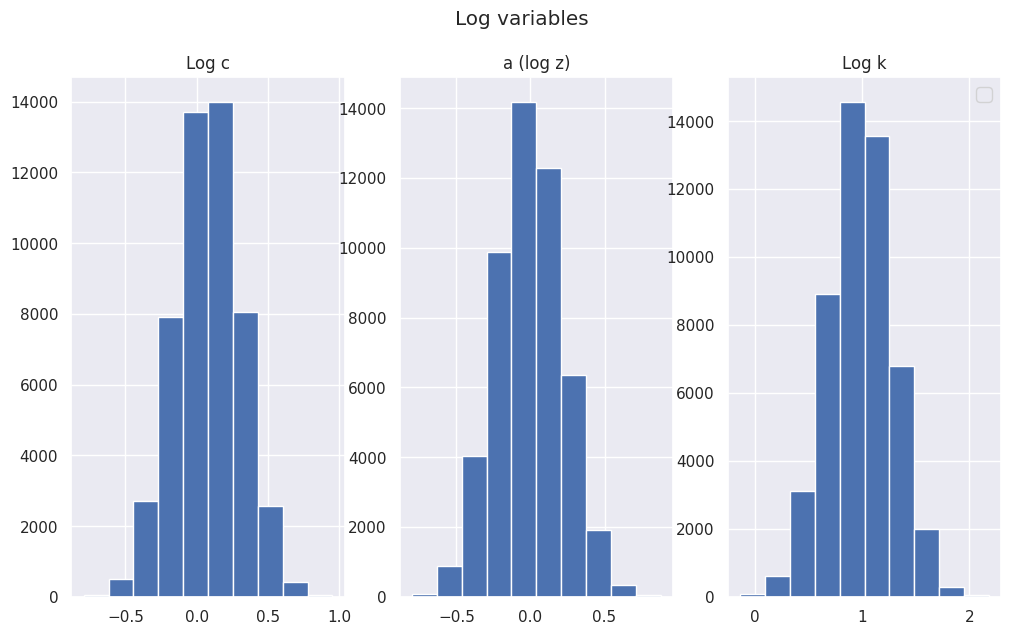

/tmp/ipython-input-2426967286.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


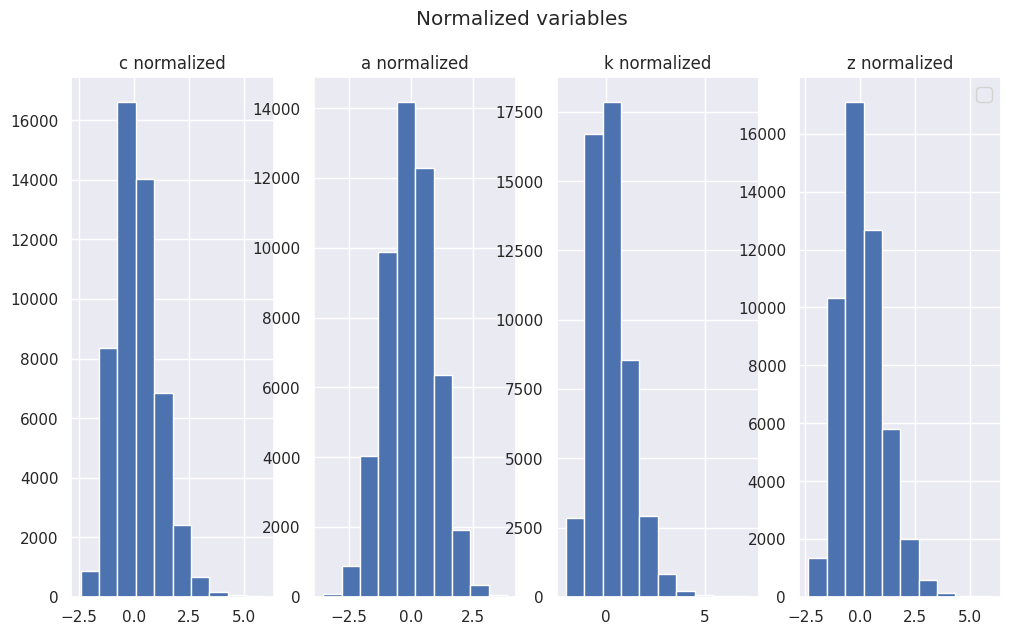

         k         z         a  k_demeaned  a_demeaned  z_demeaned  \
0  2.49443  0.843225 -0.170521   -0.131316   -0.170521   -0.156775   
1  2.49373  0.971857 -0.028547   -0.132016   -0.028547   -0.028143   
2  2.45133  0.921800 -0.081427   -0.174416   -0.081427   -0.078200   
3  2.48612  1.005670  0.005654   -0.139626    0.005654    0.005670   
4  2.58609  1.089010  0.085269   -0.039656    0.085269    0.089010   

   k_normalized  a_normalized  z_normalized  cond_exp  cond_exp_2  cond_exp_3  \
0     -0.152851     -0.756166     -0.671641  0.972367    0.963069    0.408245   
1     -0.153666     -0.126588     -0.120568  0.989717    1.049073    0.420777   
2     -0.203019     -0.361083     -0.335017  0.971439    0.982330    0.408129   
3     -0.162524      0.025072      0.024291  0.937091    1.005970    0.398713   
4     -0.046159      0.378120      0.381329  0.896667    1.051128    0.390324   

   cond_exp_4  cond_exp_5  cond_exp_6  cond_exp_7  
0    1.043672    2.413199    0.043672   

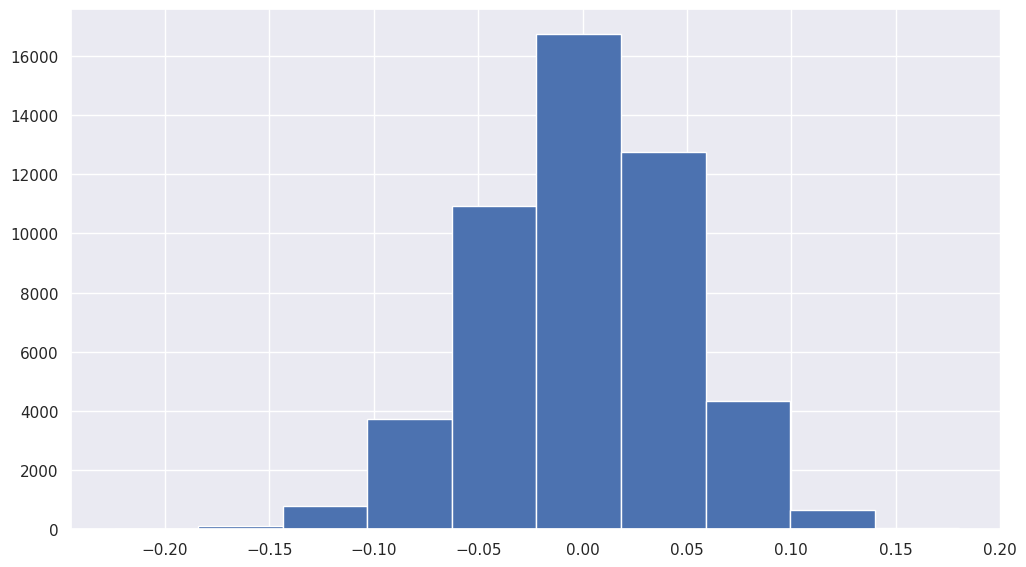

Intercept                                0.334417
np.log(k)                               -0.477687
a                                       -0.344563
np.log(k):a                              0.117191
I(np.log(k) ** 2 - 1)                   -0.150438
I(a ** 2 - 1)                            0.018025
I(4 * np.log(k) ** 3 - 3 * np.log(k))    0.012195
I(4 * a ** 3 - 3 * a)                    0.011829
I((np.log(k) ** 2 - 1) * a)             -0.027310
I(np.log(k) * (a ** 2 - 1))             -0.058041
dtype: float64
[ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]


In [9]:
#Load simulated data and fit linear model
SS_values = pd.read_csv(root_path + "output/Linearization/SS_values.csv")
print(SS_values)

Sim_series = pd.read_csv(root_path + "output/Linearization/Sim_series.csv")
print(Sim_series)

# Load the data
Sim_series = pd.read_csv(root_path + "output/Linearization/Sim_series.csv")

## Simulate realization conditional expectation
Sim_series['c_plus_1'] = Sim_series['c'].shift(-1)
Sim_series['z_plus_1'] = Sim_series['z'].shift(-1)
Sim_series['k_plus_1'] = Sim_series['k'].shift(-1)
Sim_series['cond_exp'] = params.beta  * (Sim_series['c_plus_1']**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )
# Production
Sim_series['cash'] = Sim_series['z'] * Sim_series['k']**params.alpha + (1 - params.delta)*Sim_series['k'] - Sim_series['c']
# Log tfp
Sim_series['a'] = np.log(Sim_series['z'])
params.std_z = np.std(Sim_series['z'])

# Centered vars
Sim_series['c_demeaned'] = Sim_series['c'] - params.css
Sim_series['a_demeaned'] = Sim_series['a'] # mean is 0
Sim_series['z_demeaned'] = Sim_series['z'] - params.zss
Sim_series['k_demeaned'] = Sim_series['k'] - params.kss

# Normalize vars:
params.std_c = np.std(Sim_series['c'])
params.std_a = np.std(Sim_series['a'])
params.std_z = np.std(Sim_series['z'])
params.std_k = np.std(Sim_series['k'])

Sim_series['c_normalized'] = Sim_series['c_demeaned']/params.std_c
Sim_series['a_normalized'] = Sim_series['a_demeaned']/params.std_a
Sim_series['z_normalized'] = Sim_series['z_demeaned']/params.std_z
Sim_series['k_normalized'] = Sim_series['k_demeaned']/params.std_k

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Log variables')
ax1.hist(np.log(Sim_series['c']))
ax1.set_title("Log c")
ax2.hist(Sim_series['a'])
ax2.set_title("a (log z)")
ax3.hist(np.log(Sim_series['k']))
ax3.set_title("Log k")
plt.legend()
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Normalized variables')
ax1.hist(Sim_series['c_normalized'])
ax1.set_title("c normalized")
ax2.hist(Sim_series['a_normalized'])
ax2.set_title("a normalized")
ax3.hist(Sim_series['k_normalized'])
ax3.set_title("k normalized")
ax4.hist(Sim_series['z_normalized'])
ax4.set_title("z normalized")
plt.legend()
plt.show()

# Transformed version of the conditional expectation
## Euler: 1 = E_t(...)
## c_t = E_t(c_t * (...))
Sim_series['cond_exp_2'] = Sim_series['c'] * params.beta  * ( (Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma) ) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

## c_t/cash_t = E_t(c_t/cash_ * (...))
Sim_series['cond_exp_3'] = (Sim_series['c']/Sim_series['cash']) * params.beta  * ((Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

## (c_t/c_ss)**(-sigma) = E_t()
Sim_series['cond_exp_4'] = params.beta  * ((Sim_series['c_plus_1']/params.css)**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

# kt+1
Sim_series['cond_exp_5'] = params.beta * Sim_series['k_plus_1'] * ((Sim_series['c_plus_1']/Sim_series['c'])**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta )

# Percentage diff from c_ss
Sim_series['cond_exp_6'] = params.beta  * ((Sim_series['c_plus_1']/params.css)**(-params.gamma)) * ( params.alpha * Sim_series['z_plus_1'] * Sim_series['k_plus_1']**(params.alpha - 1) + 1 - params.delta ) - 1

# rhs Euler, in logs
Sim_series['cond_exp_7'] = np.log(Sim_series['cond_exp'])

df_Dynare = pd.DataFrame({'k': Sim_series['k'], 'z': Sim_series['z'], 'a': Sim_series['a'],
                          'k_demeaned': Sim_series['k_demeaned'], 'a_demeaned': Sim_series['a_demeaned'], 'z_demeaned': Sim_series['z_demeaned'],
                          'k_normalized': Sim_series['k_normalized'], 'a_normalized': Sim_series['a_normalized'], 'z_normalized': Sim_series['z_normalized'],
                          'cond_exp':  Sim_series['cond_exp'],
                          'cond_exp_2':  Sim_series['cond_exp_2'],
                         'cond_exp_3':  Sim_series['cond_exp_3'],
                         'cond_exp_4':  Sim_series['cond_exp_4'],
                         'cond_exp_5':  Sim_series['cond_exp_5'],
                         'cond_exp_6':  Sim_series['cond_exp_6'],
                         'cond_exp_7':  Sim_series['cond_exp_7']
                         })

print(df_Dynare.head())

## Log-log model
model = smf.ols(formula='np.log(cond_exp) ~ np.log(k) + np.log(z) + I(np.log(k)**2) + I(np.log(z)**2) + np.log(k)*np.log(z)', data=df_Dynare).fit()
print(model.summary())

cond_exp_chosen = 7
if (params.center_dep_var == True) & (params.normalize_dep_var == True):
    x1_chosen = "k_normalized"
    x2_chosen = "a_normalized"
elif (params.center_dep_var == True) & (params.normalize_dep_var == False):
    x1_chosen = "k_demeaned"
    x2_chosen = "a_demeaned"
else:
    x1_chosen = "np.log(k)"
    x2_chosen = "a"



if params.nb_expl_vars == 4:
    # only main + interaction
    formula_OLS = (
        f"cond_exp_{cond_exp_chosen} ~ "
        f"{x1_chosen} + {x2_chosen} + {x1_chosen}*{x2_chosen}"
    )

elif params.nb_expl_vars == 6:
    if params.basis == 1:
        # monomial up to degree 2
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"{x1_chosen} + {x2_chosen} + {x1_chosen}*{x2_chosen} + "
            f"I({x1_chosen}**2) + I({x2_chosen}**2)"
        )
    else:
        # Chebyshev up to order 2
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"{x1_chosen} + {x2_chosen} + {x1_chosen}*{x2_chosen} + "
            f"I({x1_chosen}**2 - 1) + I({x2_chosen}**2 - 1)"
        )

elif params.nb_expl_vars == 10:
    if params.basis == 1:
        # monomial up to degree 3
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"{x1_chosen} + {x2_chosen} + {x1_chosen}*{x2_chosen} + "
            f"I({x1_chosen}**2) + I({x2_chosen}**2) + "
            f"I({x1_chosen}**3) + I({x1_chosen}**2*{x2_chosen}) + "
            f"I({x1_chosen}*{x2_chosen}**2) + I({x2_chosen}**3)"
        )
    else:
        # Chebyshev up to order 3
        formula_OLS = (
            f"cond_exp_{cond_exp_chosen} ~ "
            f"{x1_chosen} + {x2_chosen} + {x1_chosen}*{x2_chosen} + "
            f"I({x1_chosen}**2 - 1) + I({x2_chosen}**2 - 1) + "
            f"I(4*{x1_chosen}**3 - 3*{x1_chosen}) + "
            f"I(4*{x2_chosen}**3 - 3*{x2_chosen}) + "
            f"I(({x1_chosen}**2 - 1)*{x2_chosen}) + "
            f"I({x1_chosen}*({x2_chosen}**2 - 1))"
        )

else:
    raise ValueError(
        f"nb_expl_vars must be one of 4,6,10; got {params.nb_expl_vars}"
    )

model = smf.ols(formula=formula_OLS, data=df_Dynare).fit()


print(model.summary())
plt.hist(model.resid)
plt.show()

coeff_vector = model.params
print(coeff_vector)

coeff_array_0 = model.params.values
print(coeff_array_0)


#### II.B.2. Basline PEA

In [10]:
@njit
def fill_X_row(X, i, x1, x2, nb_expl_vars, basis):
    """
    Fill row i of the design matrix X in place, using either
      - basis=1 : monomial basis
      - basis=2 : Chebyshev basis
    up to nb_expl_vars terms (4, 6 or 10).

    After calling this, X[i,:] will be set.
    """
    if nb_expl_vars == 4:
        # simple cross basis
        X[i, :] = np.array([1, x1, x2, x1*x2])
        return

    if basis == 1:
        # —— Monomial basis ——
        if nb_expl_vars == 6:
            # total degree ≤2
            X[i, :] = np.array([
                1,
                x1,
                x2,
                x1 * x2,
                x1**2,
                x2**2
            ])
        elif nb_expl_vars == 10:
            # total degree ≤3
            X[i, :] = np.array([
                1,
                x1,
                x2,
                x1 * x2,
                x1**2,
                x2**2,
                x1**3,
                x1**2 * x2,
                x1 * x2**2,
                x2**3
            ])
        else:
            raise ValueError(
                f"Monomial basis with nb_expl_vars={nb_expl_vars} not supported"
            )

    elif basis == 2:
        # —— Chebyshev basis ——
        if nb_expl_vars == 6:
            # order ≤2 Chebyshev: T_i(x)T_j(y), i+j≤2
            X[i, :] = np.array([
                1,                   # T0(x)T0(y)
                x1,                  # T1(x)T0(y)
                x2,                  # T0(x)T1(y)
                x1 * x2,             # T1(x)T1(y)
                (x1**2 - 1),         # T2(x)T0(y)
                (x2**2 - 1)          # T0(x)T2(y)
            ])
        elif nb_expl_vars == 10:
            # order ≤3 Chebyshev: T_i(x)T_j(y), i+j≤3
            X[i, :] = np.array([
                1,                     # T0(x)T0(y)
                x1,                    # T1(x)T0(y)
                x2,                    # T0(x)T1(y)
                x1 * x2,               # T1(x)T1(y)
                (x1**2 - 1),           # T2(x)T0(y)
                (x2**2 - 1),           # T0(x)T2(y)
                (4*x1**3 - 3*x1),      # T3(x)T0(y)
                (4*x2**3 - 3*x2),      # T0(x)T3(y)
                (x1**2 - 1) * x2,      # T2(x)T1(y)
                x1 * (x2**2 - 1)       # T1(x)T2(y)
            ])
        else:
            raise ValueError(
                f"Chebyshev basis with nb_expl_vars={nb_expl_vars} not supported"
            )

    else:
        raise ValueError(f"Unknown basis={basis}; must be 1 or 2")

def build_design_matrix(x1, x2, nb_expl_vars, basis):
    """
    Build the full design matrix X for vectors x1, x2 of length n,
    using either a monomial basis (basis=1) or Chebyshev basis (basis=2),
    with either 4, 6 or 10 regressors (nb_expl_vars).

    Returns
    -------
    X : ndarray, shape (n, nb_expl_vars)
    """
    n = len(x1)
    X = np.empty((n, nb_expl_vars))
    for i in range(n):
        fill_X_row(X, i, x1[i], x2[i], nb_expl_vars, basis)
    return X


Intial b0: [ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]
Iteration: 1	Conv. crit.: 0.16404814953344515	 b: [ 0.24551775 -0.42965992 -0.50861084  0.12500407 -0.09205797 -0.09942829
  0.0053162  -0.00344118  0.0088734   0.01050856]
Iteration: 2	Conv. crit.: 0.038778238203838966	 b: [ 0.25293941 -0.43000939 -0.54738908  0.1208617  -0.06755257 -0.10106384
  0.00274729 -0.0020978   0.01330495  0.01692098]
Iteration: 3	Conv. crit.: 0.016184115106954944	 b: [ 0.2612348  -0.4331163  -0.56357319  0.11956302 -0.05764128 -0.09488561
  0.00187075 -0.00191659  0.01032363  0.01526082]
Iteration: 4	Conv. crit.: 0.00824593595405776	 b: [ 0.26409019 -0.43490822 -0.57181913  0.11983545 -0.05385406 -0.091815
  0.00163564 -0.00253079  0.00714067  0.01313787]
Iteration: 5	Conv. crit.: 0.004075883628942845	 b: [ 0.26427294 -0.43569433 -0.57589501  0.12051244 -0.05249686 -0.09088096
  0.00161795 -0.00315638  0.00511022  0.01168412]


Iteration: 23	Conv. crit.: 8.784879652612432e-07	 b: [ 0.26365436 -0.43622294 -0.57737255  0.12280652 -0.05140878 -0.0898879
  0.00173715 -0.0038369   0.00345076  0.01019748]


Percentage of time negative investment: 0.029660593211864237


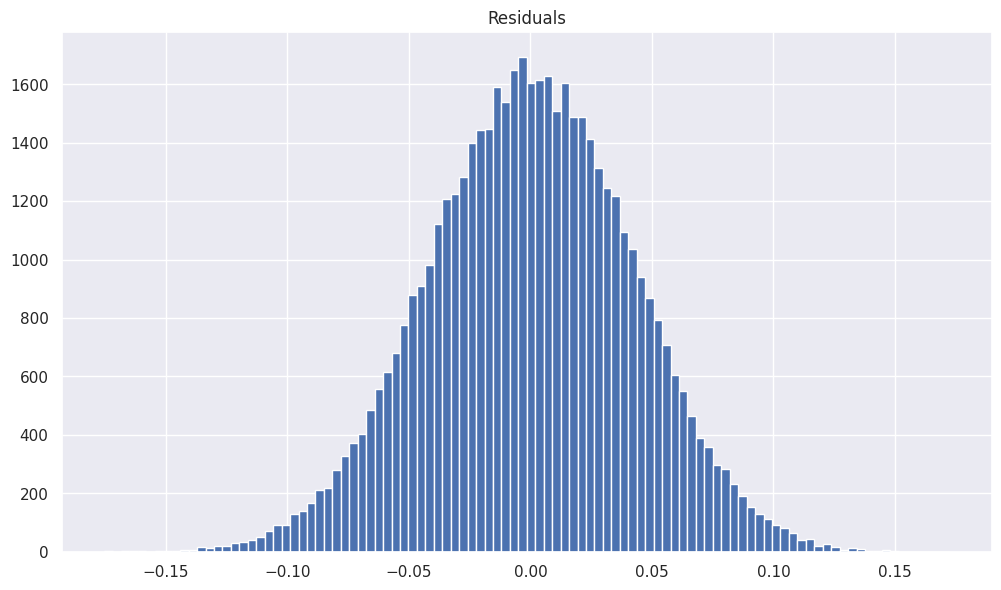

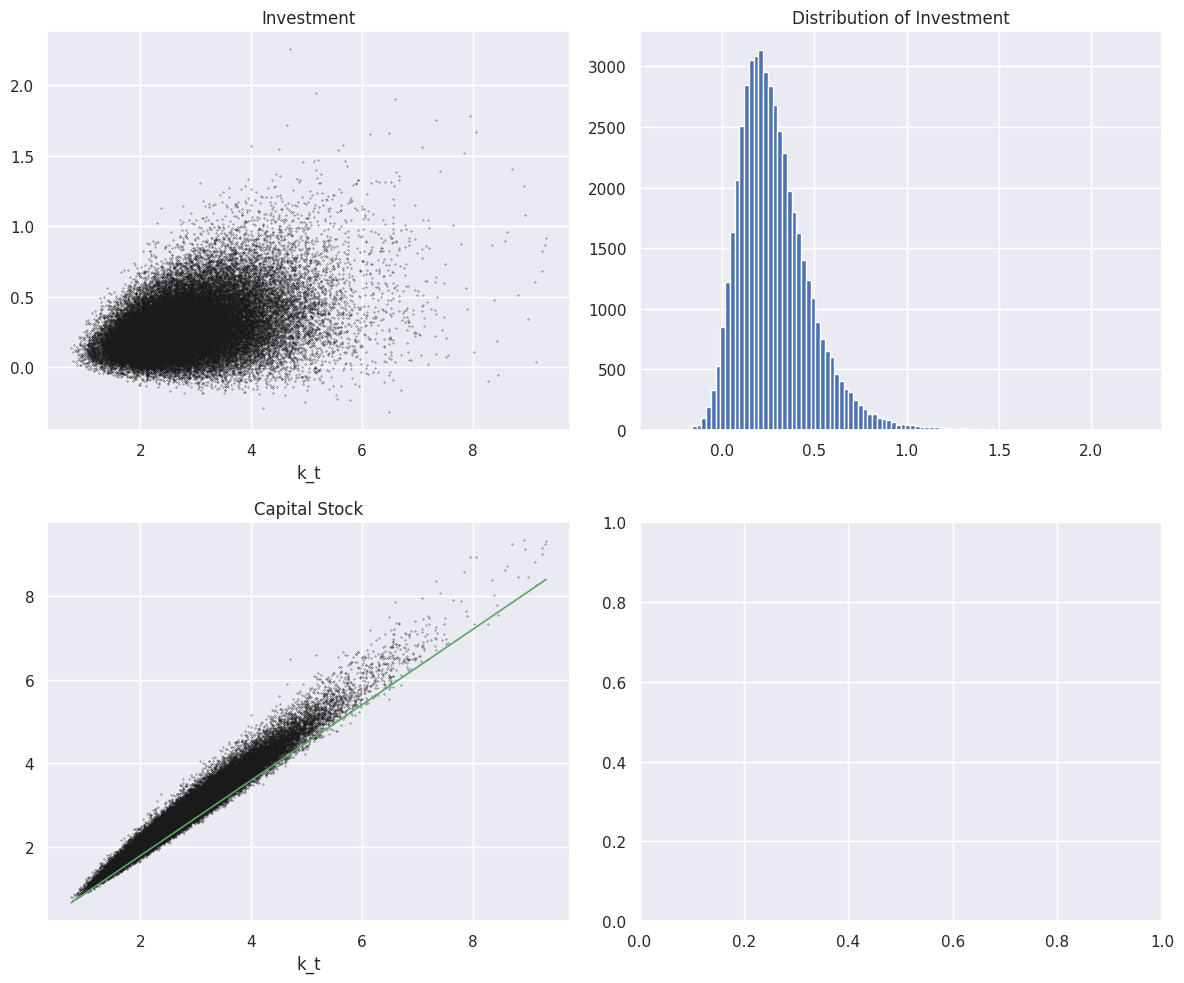

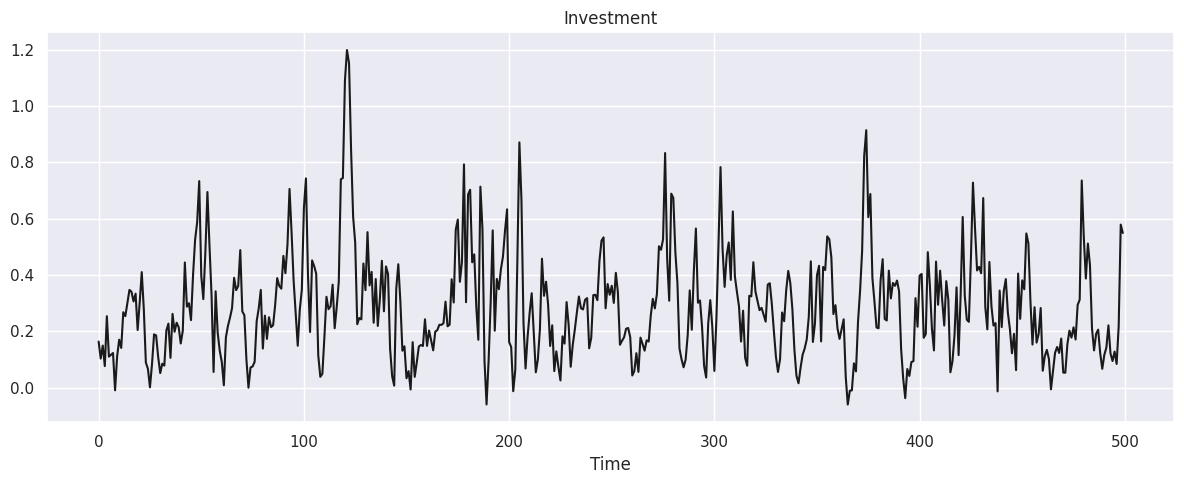

In [11]:
# Usual PEA
tol = 1e-6
gam = 1.0
init = 100 #burnin
long = 50000
slong = init + long

# SS value. Use mean values on the simulation
k_ss = SS_values[SS_values["Variable"] == "k"]["MeanValue"].item()
a_ss = 0
c_ss = SS_values[SS_values["Variable"] == "c"]["MeanValue"].item()

# Also, define the index arrays T and T1, for example:
T = np.arange(init, slong-1)      # Corresponds roughly to Matlab: init+1:slong-1 (adjusted for 0-indexing)
T1 = np.arange(init+1, slong)       # Corresponds roughly to Matlab: init+2:slong

# Compute initial conditions:
print(f"Intial b0: {coeff_array_0}")
b0 = coeff_array_0

# Generate shocks: e is a vector of size slong with normally distributed shocks scaled by se
e = params.std_tfp * np.random.randn(slong)

# Initialize a as a vector of zeros
a = np.zeros(slong)

# Set the first element of a
a[0] = a_ss

# Generate the AR(1) process for a
for i in range(1, slong):
    a[i] = params.rho_tfp * a[i-1] + e[i]

# Initialize iteration counter and convergence criterion
iteration = 1
crit = np.inf  # set to a large number initially

while crit > tol:
#while iteration < 10:
    k = np.zeros(slong + 1)
    c = np.zeros(slong)
    X = np.zeros((slong, len(b0)))
    cash = np.zeros(slong)

    # Set initial capital:
    k[0] = k_ss

    # Simulate the path:
    for i in range(slong):
        # Construct the regressors at time i.
        if (params.center_dep_var == True) & (params.normalize_dep_var == True):
            x1 = (k[i] - params.kss)/params.std_k
            x2 = a[i]/params.std_a
        elif (params.center_dep_var == True) & (params.normalize_dep_var == False):
            x1 = (k[i] - params.kss)
            x2 = a[i]
        else:
            x1 = np.log(k[i])
            x2 = a[i]

        """
        if params.nb_expl_vars == 4:
            X[i, :] = np.array([1, x1, x2, x1 * x2])
        else:
            if params.basis == 1:
                X[i, :] = np.array([1, x1, x2, x1 * x2, x1**2, x2**2])
            else:
                X[i, :] = np.array([1, x1, x2, x1 * x2, (x1**2 - 1), (x2**2 - 1)])
        """
        # Set values fo X:
        fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

        # Cash on hand
        cash[i] = np.exp(a[i]) * (k[i]**params.alpha) + (1 - params.delta) * k[i]

        # Update capital for the next period using the model's law of motion
        #k[i+1] = cash[i] - c[i]
        if cond_exp_chosen == 2:
            c[i] = params.css*np.maximum(params.tol_c, np.dot(X[i, :], b0))**(-1/params.gamma)
            c[i] = np.maximum(params.tol_c, c[i])
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        elif cond_exp_chosen == 5:
            k[i+1] = np.maximum(np.dot(X[i, :], b0), params.tol_c)
            c[i] = np.maximum(params.tol_c, cash[i] - k[i+1])
        elif cond_exp_chosen == 6:
            y = np.dot(X[i, :], b0)
            c[i] = params.css*(1 + y)**(-1/params.gamma)
            c[i] = np.maximum(params.tol_c, c[i])
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        elif cond_exp_chosen == 7:
            c[i] = np.exp(np.dot(X[i, :], b0))**(-1/params.gamma)
            k[i+1] = np.maximum(cash[i] - c[i], params.tol_c)
        else:
            print(f"cond_exp_chosen : {cond_exp_chosen} not implemented yet)")
    # Construct the vector y using the simulated paths (vectorized operation)
    if cond_exp_chosen == 2:
        y = params.beta * ( (c[T1]/params.css)**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta)
    elif cond_exp_chosen == 5:
        y = params.beta * (k[T1]) * ( (c[T1]/c[T])**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta)
    elif cond_exp_chosen == 6:
        y = params.beta * ( (c[T1]/params.css)**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta) - 1
    elif cond_exp_chosen == 7:
        y = np.log( params.beta * ( ( c[T1] ) ** ( -params.gamma ) ) * (params.alpha * np.exp(a[T1]) * k[T1]**(params.alpha - 1) + 1 - params.delta) )

    # Solve the regression: log(y) = X(T,:) * bt in a least-squares sense.
    # np.linalg.lstsq returns a tuple; the first element is the solution.
    y_reg = y
    X_reg = X[T, :]
    bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

    if params.regression_two_steps == True:
        print(f"Step 1 coef: {bt}")
        # Square root of weights, when using log model
        sqrt_w = np.exp(X_reg @ bt)
        # Pre-multiply and then regress again
        X_wls = X_reg * sqrt_w[:, None]
        y_wls = y_reg * sqrt_w
        bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
        print(f"Step 2 coef: {bt}")
    elif params.feasible_GLS == True:
        print(f"Step 1 coef: {bt}")
        ## residuals
        e0 = y_reg - X_reg @ bt
        # Estimate the variance‐function via a log‐linear model
        # use X_reg as Z, but you can build a richer Z = f(state)
        Z = X_reg
        # add tiny constant to avoid log(0)
        log_u = np.log(e0**2 + 1e-12)
        gamma, *_ = np.linalg.lstsq(Z, log_u, rcond=None)
        # fitted log‐variance and variance estimate
        log_var_hat = Z @ gamma          # E[log(e^2)|Z]
        var_hat     = np.exp(log_var_hat)  # ≈ Var(e_m) * N
        # Construct inverse‐variance weights and do WLS
        w       = 1.0 / var_hat
        sqrt_w  = np.sqrt(w)
        # Pre-multiply and then regress again
        X_wls = X_reg * sqrt_w[:, None]
        y_wls = y_reg * sqrt_w
        bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
        print(f"Step 2 coef FGLS: {bt}")

    # Update b using a smoothing parameter gam:
    b = gam * bt + (1 - gam) * b0

    # Compute convergence criterion (maximum absolute change in b)
    crit = np.max(np.abs(b - b0))

    # Update b0 for the next iteration
    b0 = b.copy()

    # Display current iteration and convergence criterion
    print(f"Iteration: {iteration}\tConv. crit.: {crit}\t b: {b}")

    iteration += 1

# residual
Res = y_reg - np.dot(X[T, :], b0)
MSE = np.mean(Res ** 2)

# =============================================================================
# Plotting results
# =============================================================================
# 1. Plot histogram of residuals
plt.figure()
plt.hist(Res, bins=100)
plt.title('Residuals', fontname='Times', fontsize=12)

# 2. Compute investment deviations: it = k[T1] - (1-delta)*k[T]
it = k[T1] - (1 - params.delta) * k[T]

# Create a 2x2 figure for several plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Investment scatter plot
axs[0, 0].plot(k[T], it, '.', markersize=0.5, color='k')
axs[0, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
axs[0, 0].set_title('Investment', fontname='Times', fontsize=12)

# Histogram of investment
axs[0, 1].hist(it, bins=100)
axs[0, 1].set_title('Distribution of Investment', fontname='Times', fontsize=12)

# Capital stock: plot k[T] vs. k[T1] and add 45° reference line (scaled by (1-delta))
axs[1, 0].plot(k[T], k[T1], '.', markersize=0.5, color='k')
x_line = np.linspace(np.min(k[T]), np.max(k[T]), 100)
axs[1, 0].plot(x_line, (1 - params.delta) * x_line, '-', linewidth=1.2, color='g')
axs[1, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
axs[1, 0].set_title('Capital Stock', fontname='Times', fontsize=12)

plt.tight_layout()


# 3. Time series plots for a subset (T0 = 500:1000)
T0 = np.arange(500, 1000)
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(it[T0], 'k')
ax.set_xlabel('Time', fontname='Times', fontsize=12)
ax.set_title('Investment', fontname='Times', fontsize=12)

plt.tight_layout()

percentage_negative_investment = len(it[it < 0])/len(it)
print(f"Percentage of time negative investment: {percentage_negative_investment}")

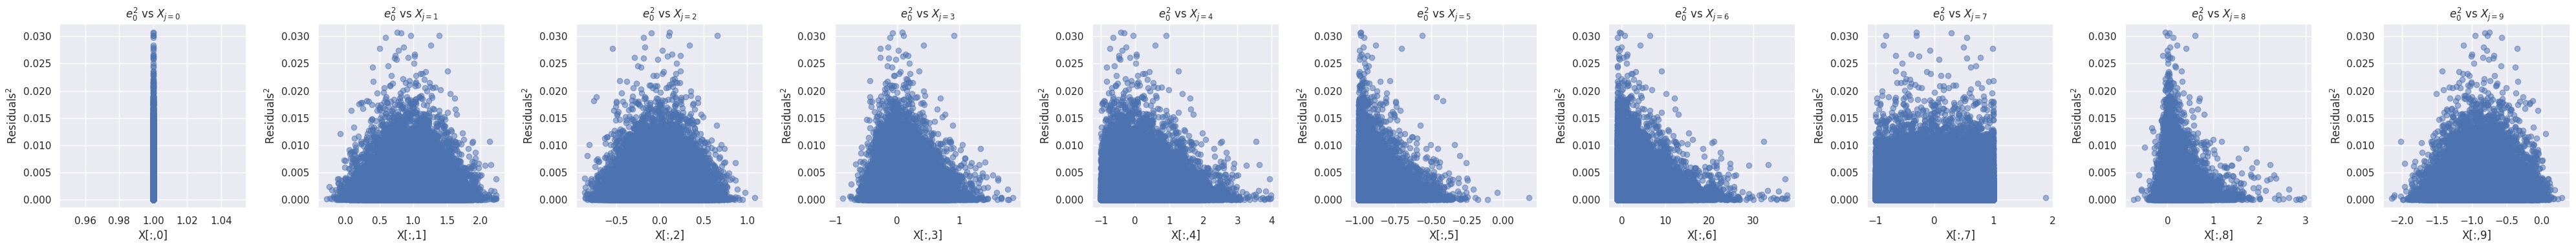

BP LM p-value: 3.3562826013374533e-22
BP F p-value: 3.1485429194163944e-22


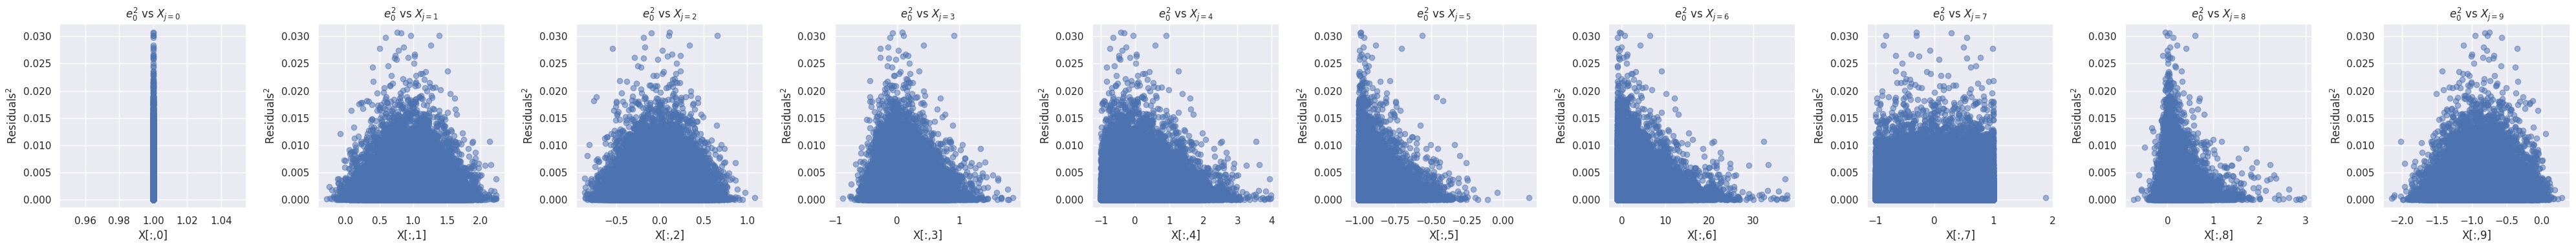

In [12]:
# e0 is your first‐step residuals, X_reg shape (M,k)
bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)
## residuals
e0 = y_reg - X_reg @ bt
u0 = e0**2

fig, axes = plt.subplots(ncols=X_reg.shape[1], figsize=(4*X_reg.shape[1], 4))
if X_reg.shape[1] == 1:
    axes = [axes]

for j, ax in enumerate(axes):
    ax.scatter(X_reg[:,j], u0, alpha=0.5)
    ax.set_xlabel(f"X[:,{j}]")
    ax.set_ylabel("Residuals$^2$")
    ax.set_title(f"$e_0^2$ vs $X_{{j={j}}}$")
plt.tight_layout()
plt.show()


# First step OLS
ols_mod = sm.OLS(y_reg, X_reg).fit()
bp_test = het_breuschpagan(ols_mod.resid, X_reg)
# bp_test returns (lm_stat, lm_pvalue, f_stat, f_pvalue)
print("BP LM p-value:", bp_test[1])
print("BP F p-value:", bp_test[3])

params.regression_two_steps = False
if params.regression_two_steps == True:
    sqrt_w = np.exp(X_reg @ bt)
    # Pre-multiply and then regress again
    X_wls = X_reg * sqrt_w[:, None]
    y_wls = y_reg * sqrt_w
    bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
else:
    # FGLS:
    ## log deviation from SS:
    x1 = np.log(params.kss)
    x2 = 0.0

    Z = X_reg
    # add tiny constant to avoid log(0)
    log_u = np.log(e0**2)
    gamma, *_ = np.linalg.lstsq(Z, log_u, rcond=None)

    # fitted log‐variance and variance estimate
    log_var_hat = Z @ gamma #Predicted log variance
    var_hat     = np.exp(log_var_hat)  # predicted variance
    # Construct inverse‐variance weights and do WLS
    w       = 1.0 / var_hat
    sqrt_w  = np.sqrt(w)

# Pre-multiply and then regress again
X_wls = X_reg * sqrt_w[:, None]
y_wls = y_reg * sqrt_w
bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
e_2nd_step = y_reg - X_reg @ bt

fig, axes = plt.subplots(ncols=X_reg.shape[1], figsize=(4*X_reg.shape[1], 4))
if X_reg.shape[1] == 1:
    axes = [axes]

for j, ax in enumerate(axes):
    ax.scatter(X_reg[:,j], u0, alpha=0.5)
    ax.set_xlabel(f"X[:,{j}]")
    ax.set_ylabel("Residuals$^2$")
    ax.set_title(f"$e_0^2$ vs $X_{{j={j}}}$")
plt.tight_layout()
plt.show()

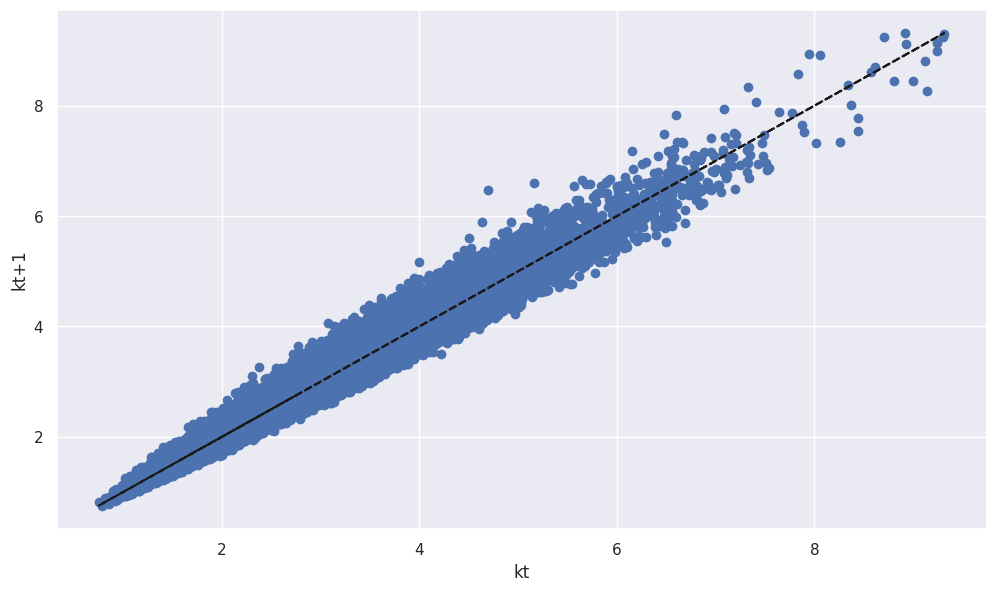

In [13]:
plt.scatter(k[:-1], k[1:])
plt.plot(k[1:], k[1:], linestyle="--", color = "k")
plt.ylabel("kt+1")
plt.xlabel("kt")
plt.savefig(output_folder + "kt_kt1.pdf", dpi=300)

  Variable      Mean    Median       Std       Min       Max
0        k  2.831338  2.687480  0.929146  0.752383  9.314231
1        a -0.001273  0.000073  0.236994 -0.866900  1.087119


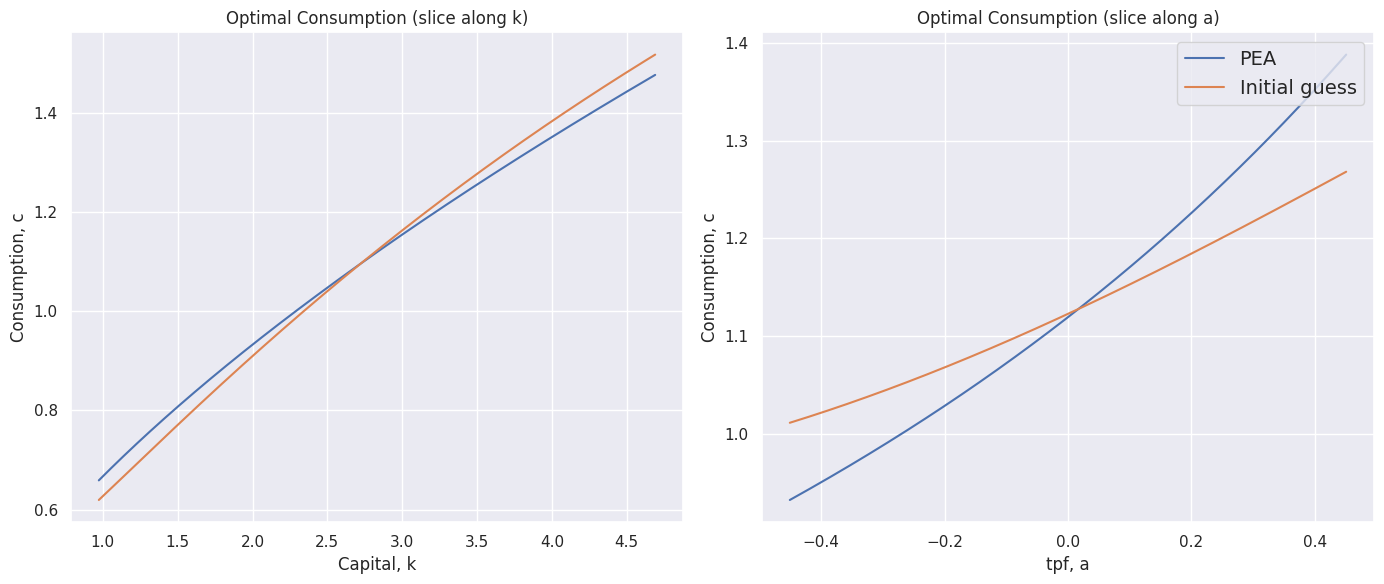

In [14]:
def summarize_k_a(k, a):
    """
    Compute basic summary statistics for two variables k and a.

    Parameters
    ----------
    k : array-like
        Numerical data for variable k.
    a : array-like
        Numerical data for variable a.

    Returns
    -------
    summary_df : pandas.DataFrame
        DataFrame with rows ['k','a'] and columns ['Mean','Median','Std','Min','Max'].
    """
    # ensure numpy arrays
    k = np.asarray(k)
    a = np.asarray(a)

    stats_dict = {
        'Variable': ['k', 'a'],
        'Mean'    : [k.mean(),      a.mean()],
        'Median'  : [np.median(k),  np.median(a)],
        'Std'     : [k.std(),       a.std()],
        'Min'     : [k.min(),       a.min()],
        'Max'     : [k.max(),       a.max()],
    }

    summary_df = pd.DataFrame(stats_dict)
    return summary_df

def plot_consumption_slices_non_binding(params,
                            mean_k, std_k,
                            a_ss, std_a,
                            b0, coeff_array_0,
                            cond_exp_chosen,
                            nb_stdev=2,
                            nb_points=500):
    """
    Plot optimal consumption slices along k and a. Model without constraint on investment.

    params: object with attributes
        - center_dep_var (bool)
        - normalize_dep_var (bool)
        - kss, std_k, std_a
        - alpha, delta, gamma, css, tol_c
        - nb_expl_vars (int), basis (int)
    mean_k, std_k: float
    a_ss, std_a: float
    b0, coeff_array_0: arrays of regression coefficients
    cond_exp_chosen: int (2, 5, 6, or 7)
    nb_stdev: number of standard deviations to plot around the mean
    nb_points: number of grid points per slice
    """
    # Create subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, var in enumerate(["k", "a"]):
        # build grids
        if var == "k":
            k_grid = np.linspace(mean_k - nb_stdev*std_k,
                                 mean_k + nb_stdev*std_k,
                                 nb_points)
            a_grid = a_ss * np.ones_like(k_grid)
        else:
            a_grid = np.linspace(a_ss - nb_stdev*std_a,
                                 a_ss + nb_stdev*std_a,
                                 nb_points)
            k_grid = mean_k * np.ones_like(a_grid)

        # transform explanatory variables
        if params.center_dep_var and params.normalize_dep_var:
            x1 = (k_grid - params.kss) / params.std_k
            x2 = a_grid / params.std_a
        elif params.center_dep_var and not params.normalize_dep_var:
            x1 = (k_grid - params.kss)
            x2 = a_grid
        else:
            x1 = np.log(k_grid)
            x2 = a_grid

        # construct design matrix X
        """
        if params.nb_expl_vars == 4:
            X = np.column_stack([np.ones_like(x1), x1, x2, x1*x2])
        else:
            if params.basis == 1:
                X = np.column_stack([
                    np.ones_like(x1), x1, x2, x1*x2, x1**2, x2**2
                ])
            else:
                X = np.column_stack([
                    np.ones_like(x1), x1, x2, x1*x2, (x1**2 - 1), (x2**2 - 1)
                ])
        """
        X = build_design_matrix(x1, x2, nb_expl_vars=params.nb_expl_vars, basis=params.basis)

        # cash-on-hand
        cash = np.exp(a_grid)*k_grid**params.alpha + (1 - params.delta)*k_grid

        # compute consumption and (if needed) k_next under different conditional expectations
        if cond_exp_chosen == 2:
            c_pea = params.css * np.maximum(1e-2, X.dot(b0))**(-1/params.gamma)
            c_pea = np.clip(c_pea, params.tol_c, cash - params.tol_c)
            c0 = params.css * np.maximum(1e-2, X.dot(coeff_array_0))**(-1/params.gamma)
            c0 = np.clip(c0, params.tol_c, cash - params.tol_c)

        elif cond_exp_chosen == 5:
            k_next = X.dot(b0)
            c_pea = np.maximum(cash - k_next, params.tol_c)
            c0 = np.maximum(cash - X.dot(coeff_array_0), params.tol_c)

        elif cond_exp_chosen == 6:
            c_pea = params.css * (1 + X.dot(b0))**(-1/params.gamma)
            c_pea = np.maximum(c_pea, params.tol_c)
            k_next = np.maximum(cash - c_pea, params.tol_c)

            c0 = params.css * (1 + X.dot(coeff_array_0))**(-1/params.gamma)
            c0 = np.maximum(c0, params.tol_c)

        elif cond_exp_chosen == 7:
            c_pea = np.exp(X.dot(b0))**(-1/params.gamma)
            c0 = np.exp(X.dot(coeff_array_0))**(-1/params.gamma)
            k_next = np.maximum(cash - c_pea, params.tol_c)

        else:
            raise NotImplementedError(f"cond_exp_chosen={cond_exp_chosen} not implemented")

        # plot
        grid = k_grid if var == "k" else a_grid
        xlabel = 'Capital, k' if var == "k" else 'tpf, a'
        axs[i].plot(grid, c_pea, label="PEA")
        axs[i].plot(grid, c0,   label="Initial guess")
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel('Consumption, c')
        axs[i].set_title(f'Optimal Consumption (slice along {var})')
        axs[i].grid(True)

    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

df_stats = summarize_k_a(k, a)
print(df_stats)

plot_consumption_slices_non_binding(
    params,
    mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
    std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
    a_ss=0.0,
    std_a=params.std_a,
    b0=b0,
    coeff_array_0=coeff_array_0,
    cond_exp_chosen=7,
    nb_stdev=2,
    nb_points=500
)

### II.C. Solving model with irreversible investment constraints

#### II.C.1. Usual PEA



In [15]:
def dhm_accuracy_test(params, b0, e_test, init = 1000):
    """
    Compute the DHM accuracy test for a given set of parameters and an initial coefficient vector b0.

    Parameters:
    params: Instance containing model parameters (beta, delta, alpha, gamma, rho_tfp, std_tfp)
    b0: Coefficient vector used for the approximation.

    Returns:
    dict: Dictionary containing DHM test results.
    """
    # Simulation setup
    slong = len(e_test) #init + long
    long = slong - init
    if long <= 0:
        raise Exception(f"long is :{long}. Increase length of e_test, or decrease init")

    T = np.arange(init, slong - 2)  # Select current period
    T1 = np.arange(init + 1, slong - 1) # Select period t+1. Drop last period, for which mu is not calculated

    # Generate shocks and AR(1) process for a
    a = np.zeros(slong)
    for i in range(1, slong):
        a[i] = params.rho_tfp * a[i - 1] + e_test[i]

    # Initialize variables
    k = np.zeros(slong + 1)
    mu =  np.zeros(slong + 1) #lagrange multiplier
    c = np.zeros(slong)
    production = np.zeros(slong)
    inv = np.zeros(slong) #investment
    cash = np.zeros(slong)
    X = np.zeros((slong, len(b0)))
    k[0] = params.kss  # Initial capital at steady state


    # Upper bound on E_t
    E_max = params.tol_c**(-params.gamma)            # ensures c >= tol_c

    # Simulate the economy
    for i in range(slong):
        if (params.center_dep_var == True) & (params.normalize_dep_var == True):
            x1 = (k[i] - params.kss)/params.std_k
            x2 = a[i]/params.std_a
        elif (params.center_dep_var == True) & (params.normalize_dep_var == False):
            x1 = (k[i] - params.kss)
            x2 = a[i]
        else:
            x1 = np.log(k[i])
            x2 = a[i]

        """
        if params.nb_expl_vars == 4:
            X[i, :] = np.column_stack([ 1, x1, x2, x1 * x2])
        else:
            if params.basis == 1:
                X[i, :] = np.column_stack([ 1, x1, x2, x1 * x2, x1**2, x2**2])
            else:
                X[i, :] = np.column_stack([ 1, x1, x2, x1 * x2, (x1**2 - 1), (x2**2 - 1)])
        """
        # Set values fo X:
        fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

        production[i] = np.exp(a[i]) * k[i]**params.alpha
        cash[i] = production[i] + (1 - params.delta) * k[i]

        # Consumption, assuming current constraint on investment does not bind
        #E_t_tilde = np.clip(np.exp(np.dot(X[i, :], b0)), production[i]**(-params.gamma), E_max)
        E_t_tilde = np.exp(np.dot(X[i, :], b0))
        c[i] = E_t_tilde ** (-1/params.gamma)

        # Update guess, after calculating investmen
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
        else:
            k[i+1] = (1 - params.delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - params.gamma ) - E_t_tilde

    # Compute the error term
    ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )

    # Compute DHM statistics
    mean_ut = np.mean(ut)
    mean_abs_ut = np.mean(np.abs(ut))
    mean_square_ut = np.mean(ut**2)
    var_ut = np.var(ut, ddof=1)
    std_ut = np.sqrt(var_ut)
    T_sample = len(ut)
    dhm_stat = T_sample * (mean_ut ** 2) / var_ut

    # Chi-square critical values
    lower5 = chi2.ppf(0.05, df=1)
    upper5 = chi2.ppf(0.95, df=1)

    # Compute consumption equivalent
    mean_k = np.mean(k)
    a_ss = 0

    if (params.center_dep_var == True) & (params.normalize_dep_var == True):
        x1 = (mean_k - params.kss)/params.std_k
        x2 = a_ss/params.std_a
    elif (params.center_dep_var == True) & (params.normalize_dep_var == False):
        x1 = (mean_k - params.kss)
        x2 = a_ss
    else:
        x1 = np.log(mean_k)
        x2 = a_ss

    """
    if params.nb_expl_vars == 4:
        X_ss = np.array([1, x1, x2, x1 * x2])
    else:
        if params.basis == 1:
            X_ss = np.array([1, x1, x2, x1 * x2, x1**2, x2**2])
        else:
            X_ss = np.array([1, x1, x2, x1 * x2, (x1**2 - 1), (x2**2 - 1)])
    """
    # Build X_ss
    X_ss = build_design_matrix(np.atleast_1d(x1), np.atleast_1d(x2), nb_expl_vars=params.nb_expl_vars, basis=params.basis)

    # Consumption at the non-stochastic ss:
    ## (assuming constraint does not bind):
    c_ss = np.exp(np.dot(X_ss, b0)) ** (-1/params.gamma)

    c_diff = (mean_ut + c_ss ** (-params.gamma)) ** (-1 / params.gamma)
    #c_diff = (mean_abs_ut + c_ss ** (-params.gamma)) ** (-1 / params.gamma)
    c_equivalent = 100 * (c_diff - c_ss) / c_ss

    return mean_abs_ut,  mean_square_ut, std_ut, dhm_stat, c_equivalent


def plot_consumption_slices(params,
                            mean_k, std_k,
                            a_ss, std_a,
                            b0, coeff_array_0,
                            cond_exp_chosen,
                            nb_stdev=2,
                            nb_points=500):
    """
    Plot optimal consumption slices along k and a. Model with constraint on investment.

    params: object with attributes
        - center_dep_var (bool)
        - normalize_dep_var (bool)
        - kss, std_k, std_a
        - alpha, delta, gamma, css, tol_c
        - nb_expl_vars (int), basis (int)
    mean_k, std_k: float
    a_ss, std_a: float
    b0, coeff_array_0: arrays of regression coefficients
    cond_exp_chosen: int (2, 5, 6, or 7)
    nb_stdev: number of standard deviations to plot around the mean
    nb_points: number of grid points per slice
    """
    if cond_exp_chosen != 7:
        raise NotImplementedError(f"cond_exp_chosen={cond_exp_chosen} not implemented")

    # Create subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, var in enumerate(["k", "a"]):
        # build grids
        if var == "k":
            k_grid = np.linspace(mean_k - nb_stdev*std_k,
                                 mean_k + nb_stdev*std_k,
                                 nb_points)
            a_grid = a_ss * np.ones_like(k_grid)
        else:
            a_grid = np.linspace(a_ss - nb_stdev*std_a,
                                 a_ss + nb_stdev*std_a,
                                 nb_points)
            k_grid = mean_k * np.ones_like(a_grid)

        # transform explanatory variables
        if params.center_dep_var and params.normalize_dep_var:
            x1 = (k_grid - params.kss) / params.std_k
            x2 = a_grid / params.std_a
        elif params.center_dep_var and not params.normalize_dep_var:
            x1 = (k_grid - params.kss)
            x2 = a_grid
        else:
            x1 = np.log(k_grid)
            x2 = a_grid

        # construct design matrix X
        """
        if params.nb_expl_vars == 4:
            X = np.column_stack([np.ones_like(x1), x1, x2, x1*x2])
        else:
            if params.basis == 1:
                X = np.column_stack([
                    np.ones_like(x1), x1, x2, x1*x2,
                    x1**2, x2**2
                ])
            else:
                X = np.column_stack([
                    np.ones_like(x1), x1, x2, x1*x2,
                    (x1**2 - 1), (x2**2 - 1)
                ])
        """
        X = build_design_matrix(x1, x2, nb_expl_vars=params.nb_expl_vars, basis=params.basis)

        # producton
        production = np.exp(a_grid)*k_grid**params.alpha
        # cash-on-hand
        cash = production + (1 - params.delta)*k_grid

        # Consumption, assuming current constraint on investment does not bind:
        ## With b0
        E_pea = np.exp(X.dot(b0))
        c_pea = E_pea**(-1/params.gamma)

        # Update guess, after calculating investment
        inv = production - c_pea

        k_next = np.where(inv > 0, cash - c_pea, (1 - params.delta) * k_grid)
        c_pea = np.where(inv > 0, c_pea,  production)
        mu = np.where(inv > 0, 0.0,  c_pea ** ( - params.gamma ) - E_pea)

        ## With
        E_0 = np.exp(X.dot(coeff_array_0))
        c_0 = E_0**(-1/params.gamma)

        inv_0 = production - c_0
        k_next_0 = np.where(inv_0 > 0, cash - c_0, (1 - params.delta) * k_grid)
        c_0 = np.where(inv_0 > 0, c_0,  production)
        mu_0 = np.where(inv_0 > 0, 0.0,  c_0 ** ( - params.gamma ) - E_0)


        # plot
        grid = k_grid if var == "k" else a_grid
        xlabel = 'Capital, k' if var == "k" else 'tpf, a'
        axs[i].plot(grid, c_pea, label="PEA")
        axs[i].plot(grid, c_0,   label="Initial guess")
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel('Consumption, c')
        axs[i].set_title(f'Optimal Consumption (slice along {var})')
        axs[i].grid(True)

    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()




State vector draws: 1000
Intial b0: [ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]
Iteration: 10	Conv. crit.: 0.000995155870524683	 b: [ 0.01120628 -0.11275692 -1.14537971  0.64919277 -0.08164472 -0.2999428
  0.00902073 -0.0130046  -0.31848098  0.3041261 ]
Iteration: 20	Conv. crit.: 3.699781327326512e-05	 b: [ 0.01347272 -0.11433357 -1.14222349  0.64583448 -0.07998745 -0.29934594
  0.00890968 -0.01324826 -0.31718384  0.30447895]


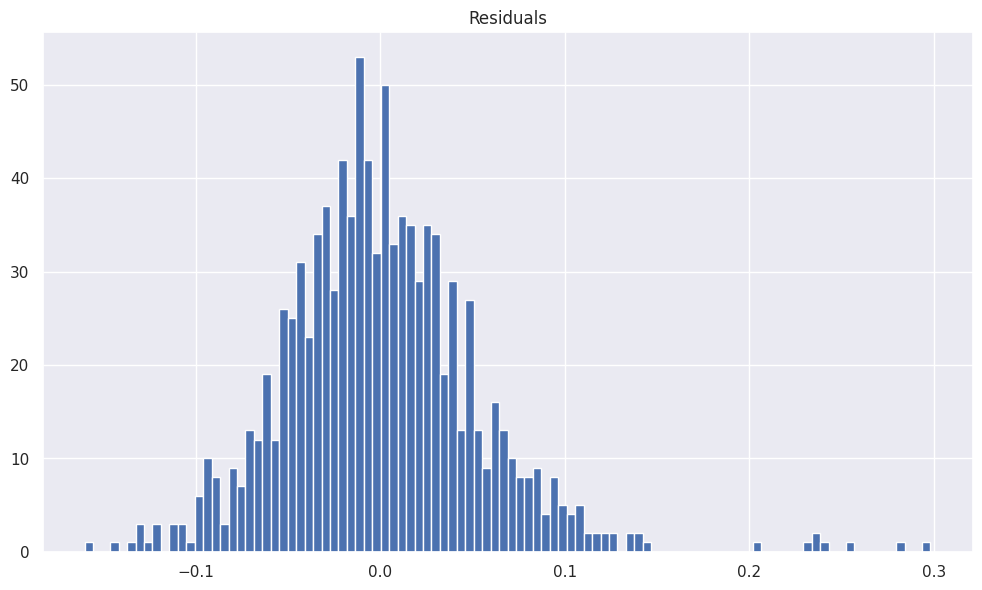

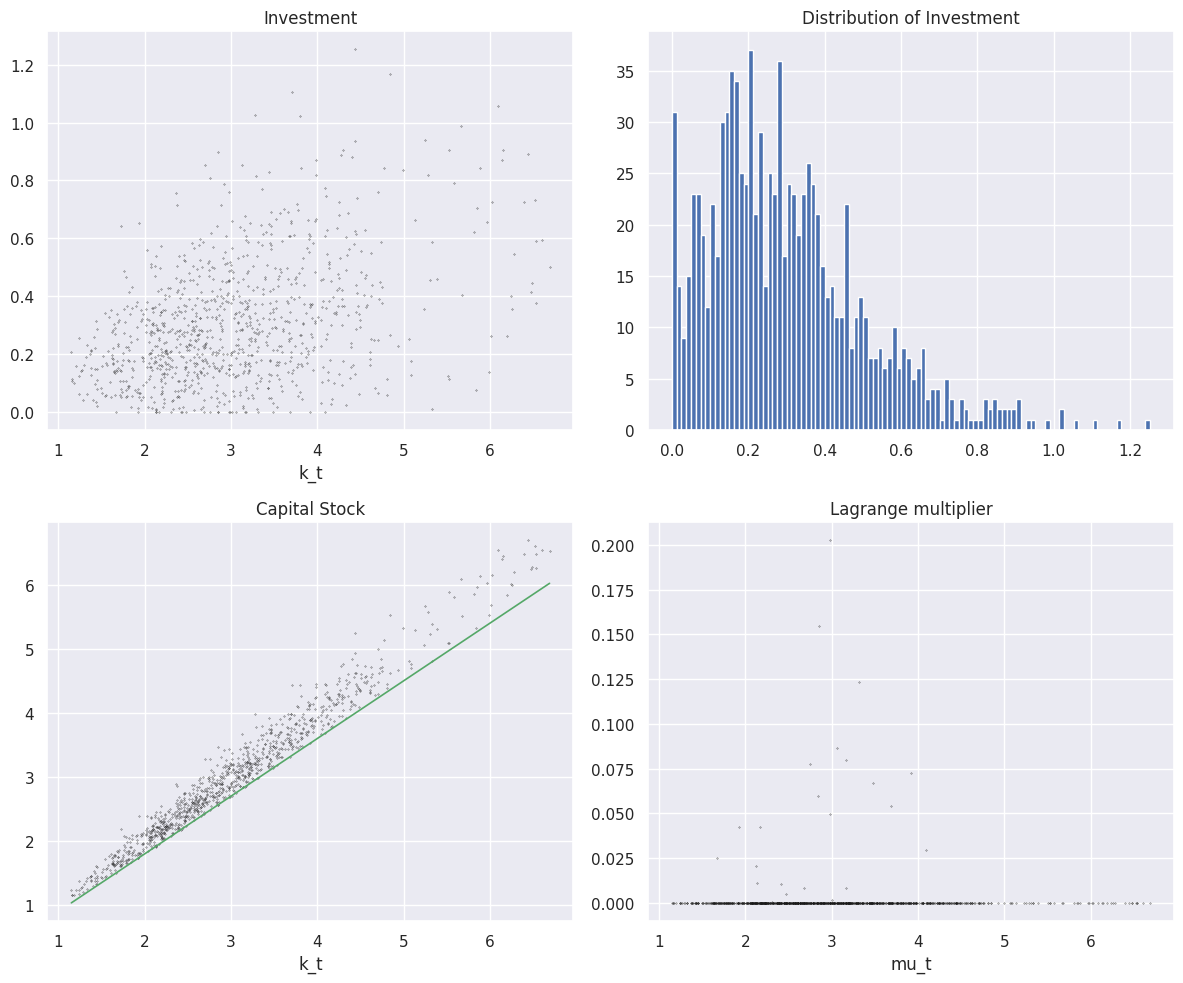

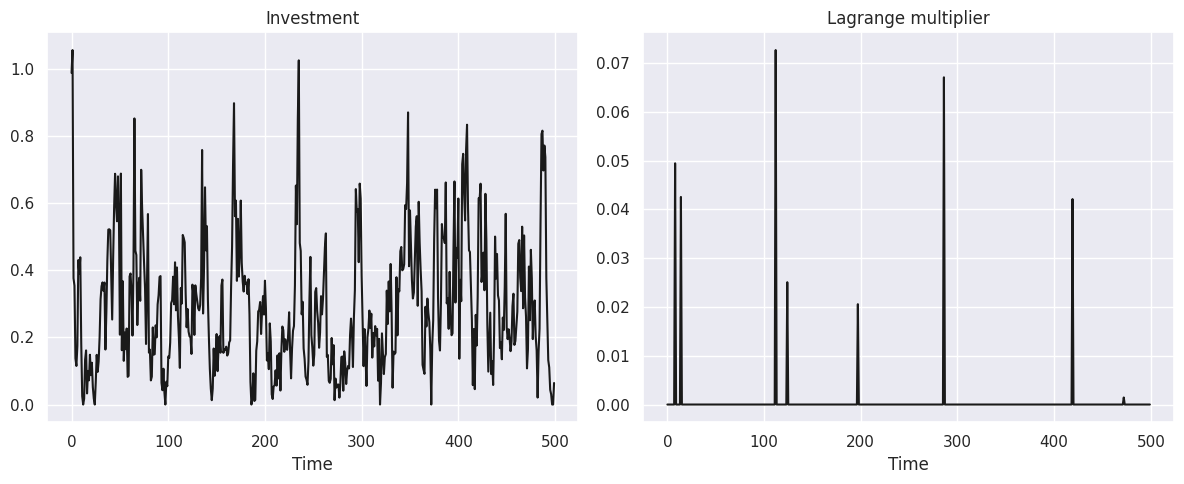

Percentage of time negative investment: 0.0
Percentage mu binds: 0.021798365122615803
Mean abs ut: 0.03657134829426643, Mean square ut: 0.002728628958987758. DHM stats: 542.149726891906. C equivalent: [0.30746212]
  Variable      Mean    Median       Std       Min       Max
0        k  2.998548  2.874871  0.998681  1.151439  6.687243
1        a  0.022588  0.021335  0.243271 -0.683502  0.701940


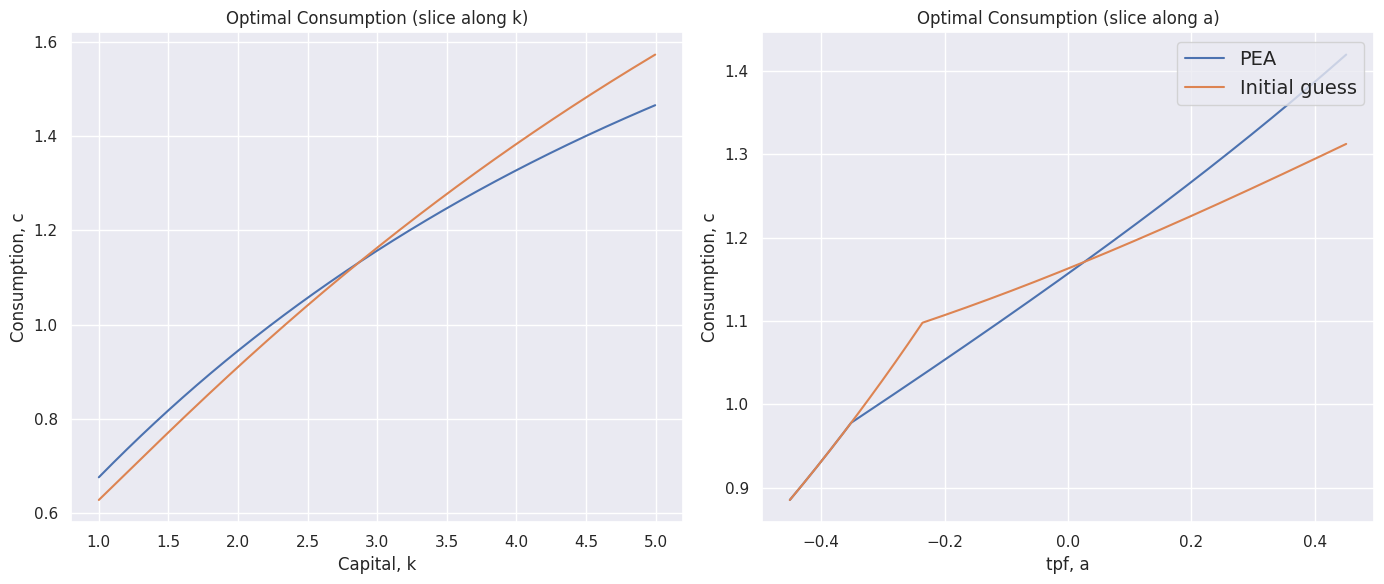

State vector draws: 10000
Intial b0: [ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]
Iteration: 10	Conv. crit.: 0.0006792047687813191	 b: [-0.11611155  0.02289789 -0.95750088  0.39787369 -0.16425792 -0.33887875
  0.01373631 -0.03898144 -0.18160326  0.34843317]
Iteration: 20	Conv. crit.: 6.744716214979185e-06	 b: [-0.11511064  0.02236133 -0.95831818  0.39872117 -0.16337977 -0.3387543
  0.01367693 -0.03916637 -0.18210558  0.348789  ]


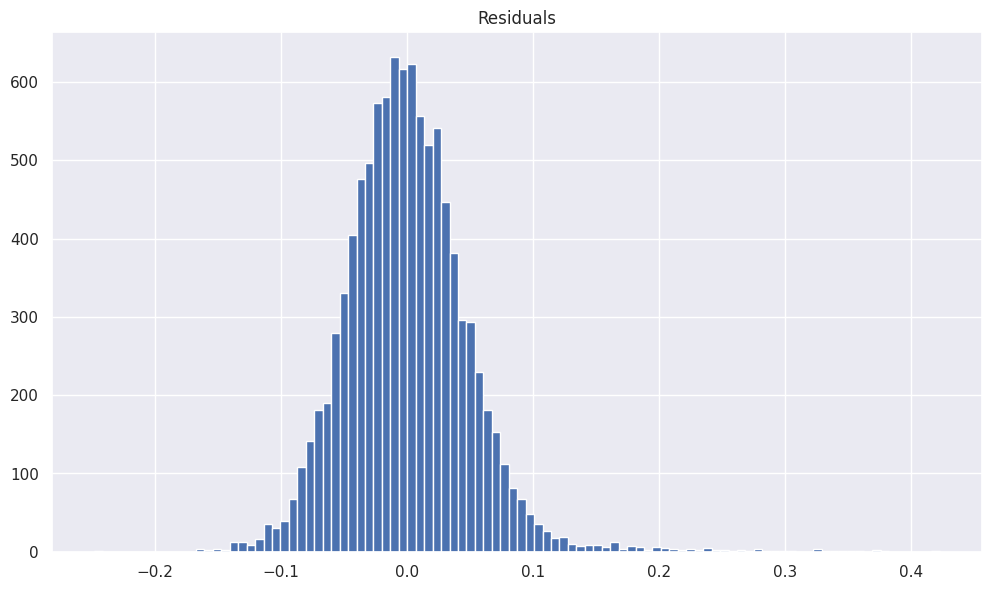

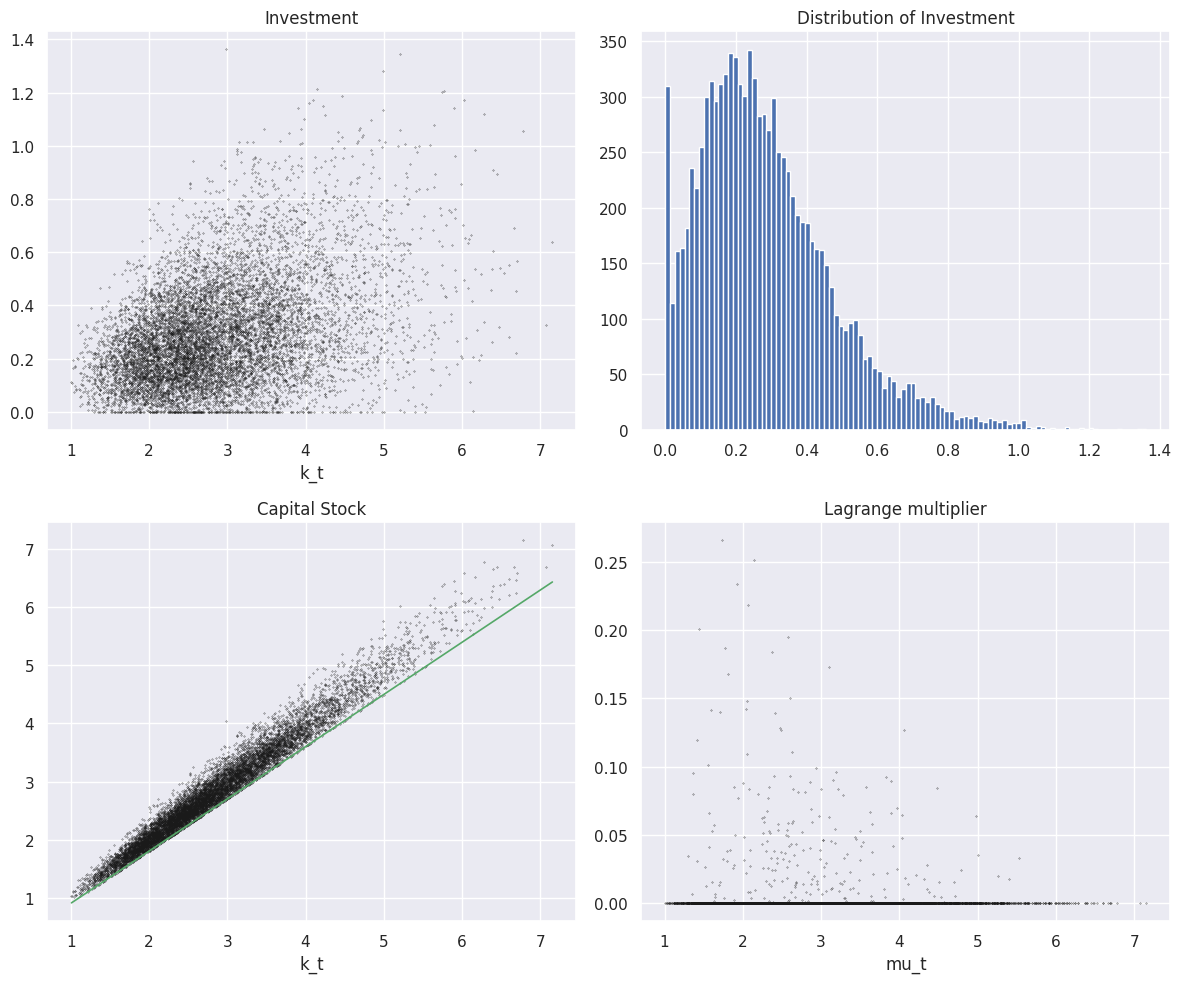

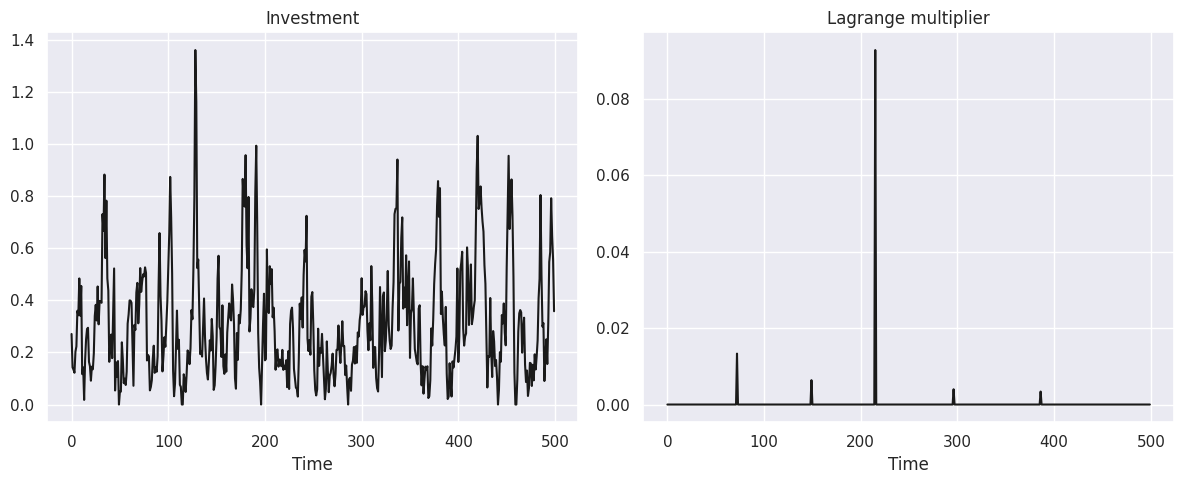

Percentage of time negative investment: 0.0
Percentage mu binds: 0.022572022572022572
Mean abs ut: 0.034521229917116716, Mean square ut: 0.002423105462338287. DHM stats: 43.67038099330441. C equivalent: [0.08235388]
  Variable      Mean    Median       Std       Min       Max
0        k  2.862453  2.718591  0.908058  1.010989  7.153271
1        a -0.003242 -0.001138  0.234101 -0.874843  0.797567


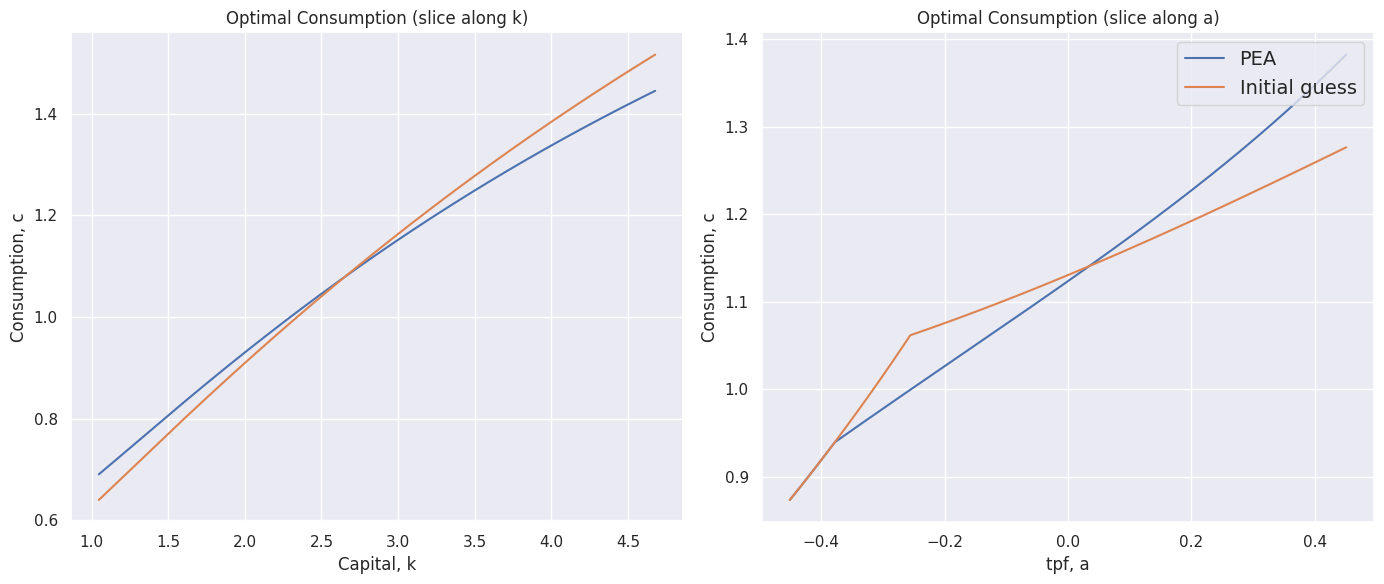

State vector draws: 50000
Intial b0: [ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]
Iteration: 10	Conv. crit.: 0.0008335983960361254	 b: [-0.07916207 -0.03929783 -1.01964778  0.42813366 -0.10933583 -0.36795864
  0.00905972 -0.0529332  -0.18815761  0.34913886]
Iteration: 20	Conv. crit.: 9.264948418311048e-06	 b: [-0.07776103 -0.04008685 -1.01915265  0.42777548 -0.10840941 -0.36737101
  0.00899916 -0.05307242 -0.18816439  0.34928864]


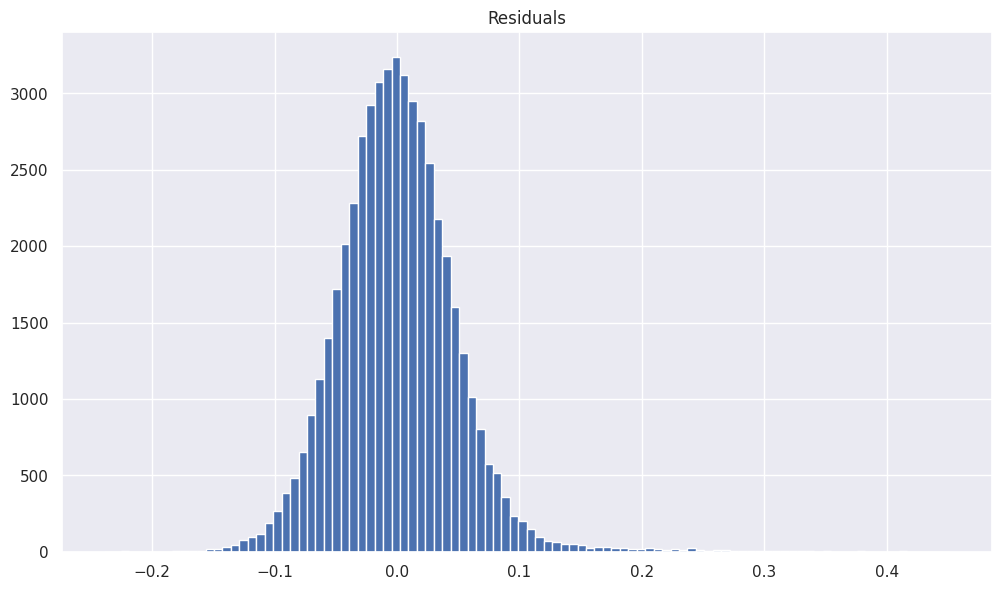

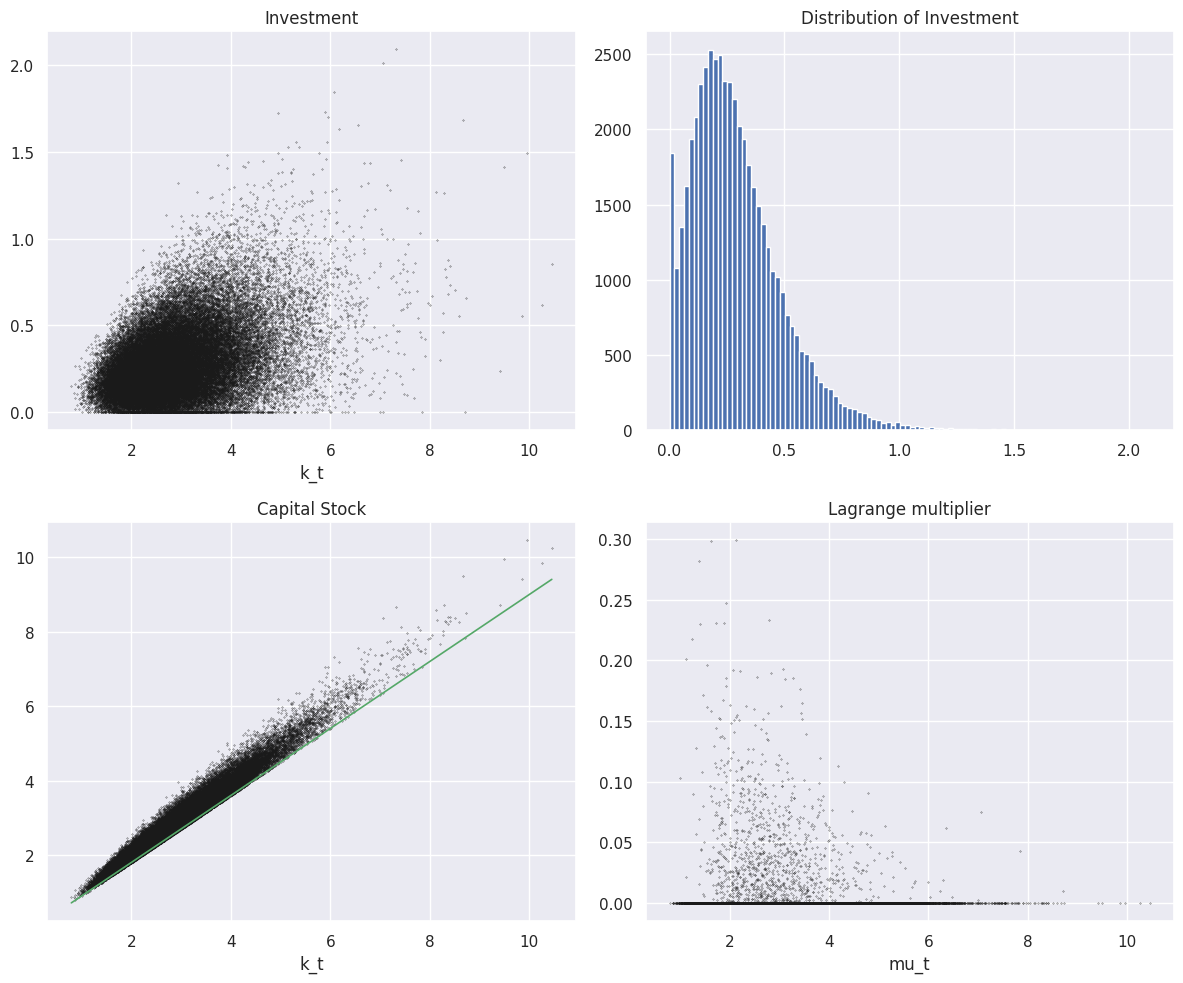

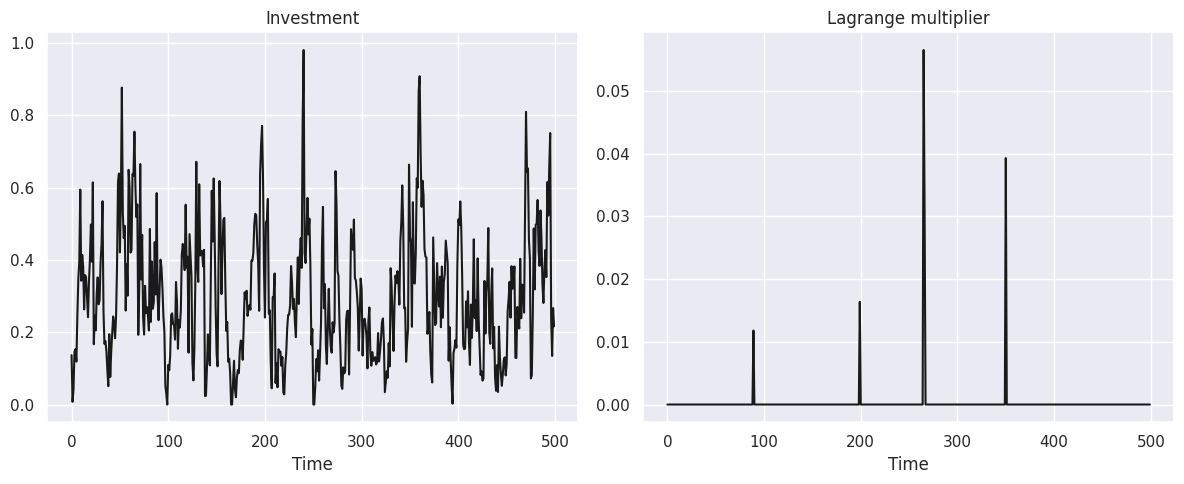

Percentage of time negative investment: 0.0
Percentage mu binds: 0.02177601245484122
Mean abs ut: 0.034361458870132276, Mean square ut: 0.0024263941966132787. DHM stats: 181.66633272711414. C equivalent: [0.16778348]
  Variable      Mean    Median       Std       Min        Max
0        k  2.901196  2.753123  0.939894  0.792924  10.454227
1        a  0.006383  0.005690  0.233256 -0.960403   0.983401


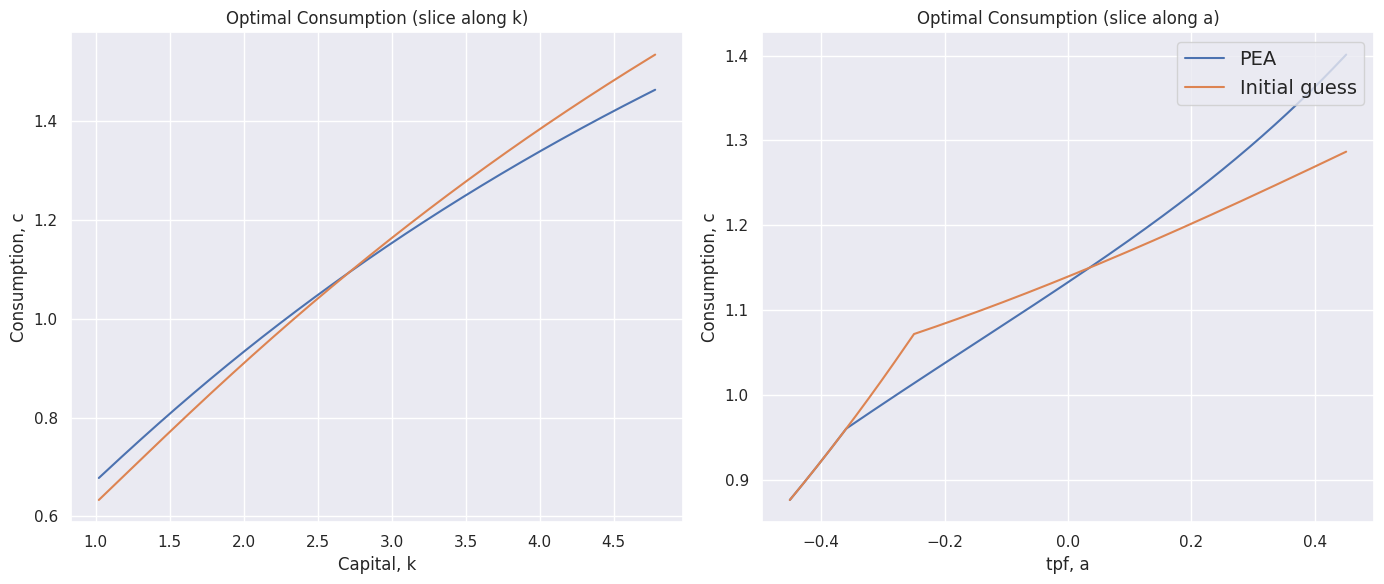

State vector draws: 100000
Intial b0: [ 0.3344173  -0.47768687 -0.34456269  0.11719071 -0.15043791  0.01802458
  0.01219452  0.01182905 -0.02730956 -0.05804076]
Iteration: 10	Conv. crit.: 0.0006089215334997289	 b: [-0.06342257 -0.05034697 -0.96832276  0.39614698 -0.1279384  -0.32857071
  0.01050961 -0.0446477  -0.17681821  0.31479064]
Iteration: 20	Conv. crit.: 6.081055094822596e-06	 b: [-0.06242321 -0.05087097 -0.96837447  0.39623313 -0.1271377  -0.32828633
  0.01045813 -0.04480791 -0.17700574  0.31507983]


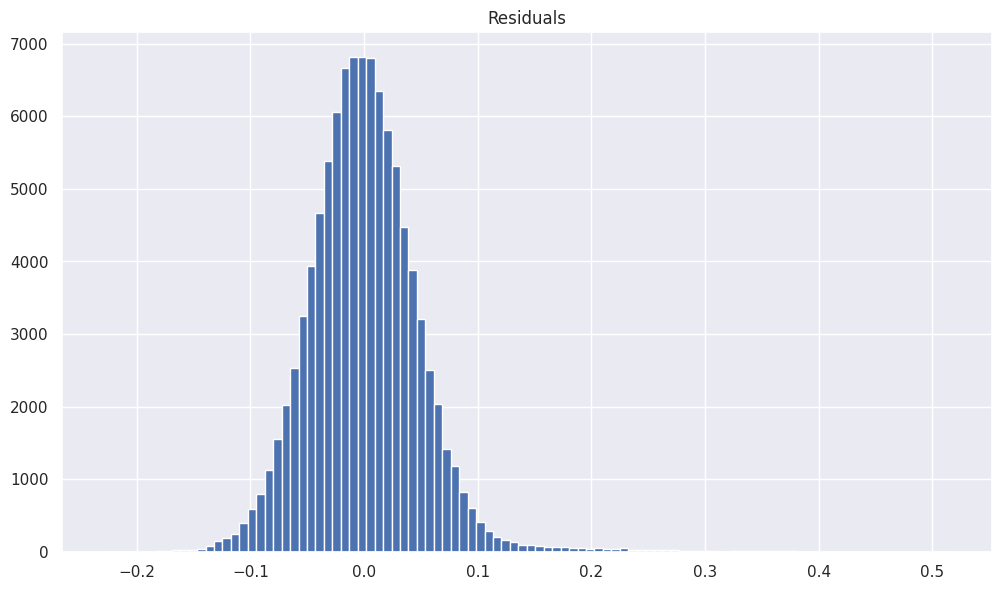

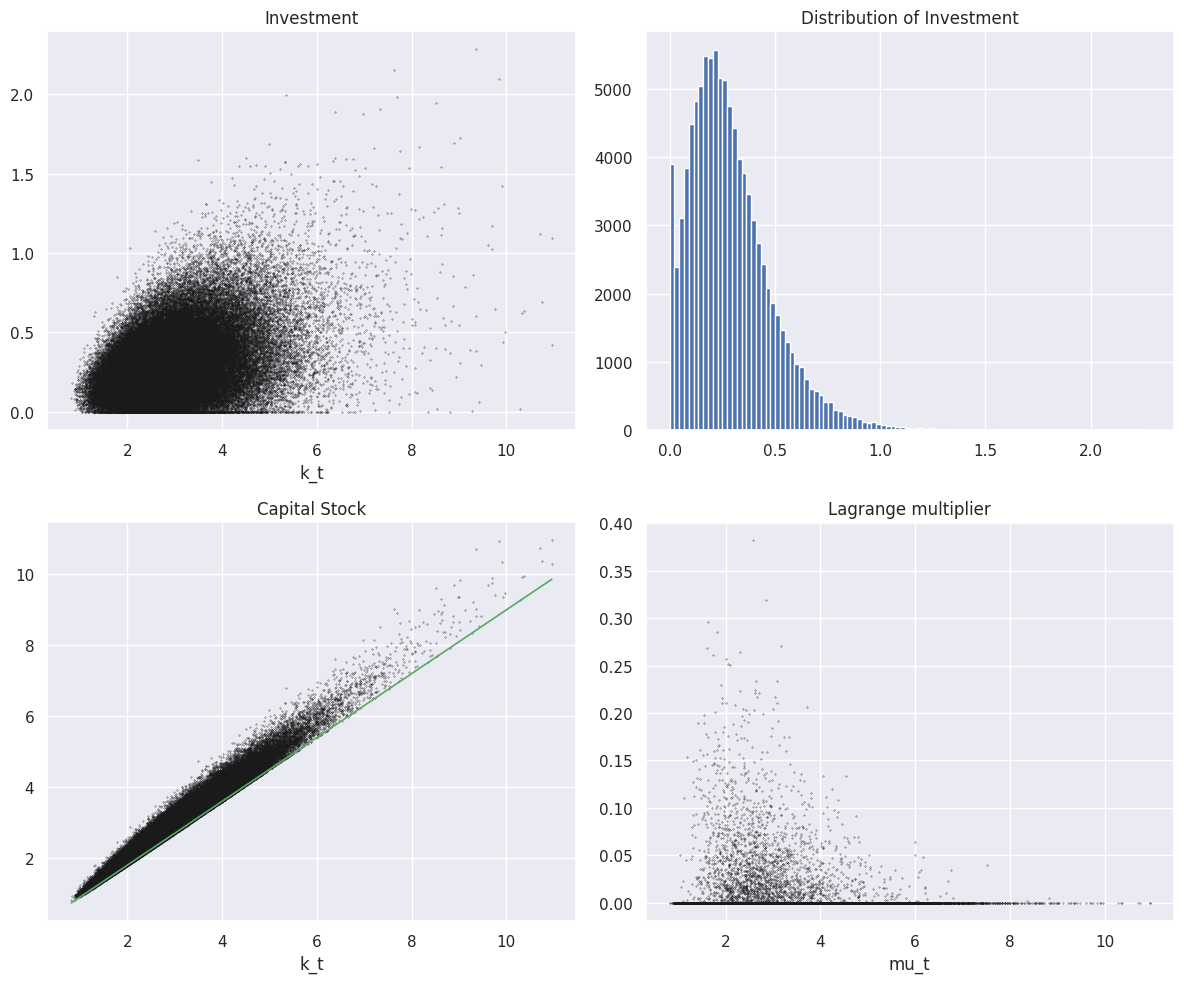

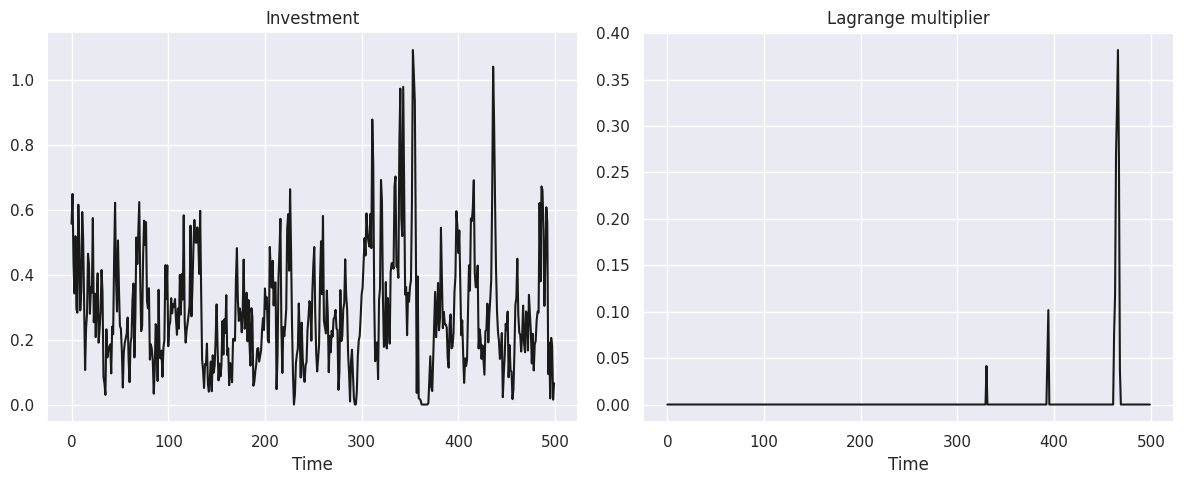

Percentage of time negative investment: 0.0
Percentage mu binds: 0.022387388737375252
Mean abs ut: 0.03458793438040961, Mean square ut: 0.002441504915012014. DHM stats: 123.6628510027235. C equivalent: [0.1388265]
  Variable      Mean    Median       Std       Min        Max
0        k  2.887204  2.741476  0.946245  0.817270  10.958357
1        a  0.002416  0.002465  0.234602 -1.068501   1.009532


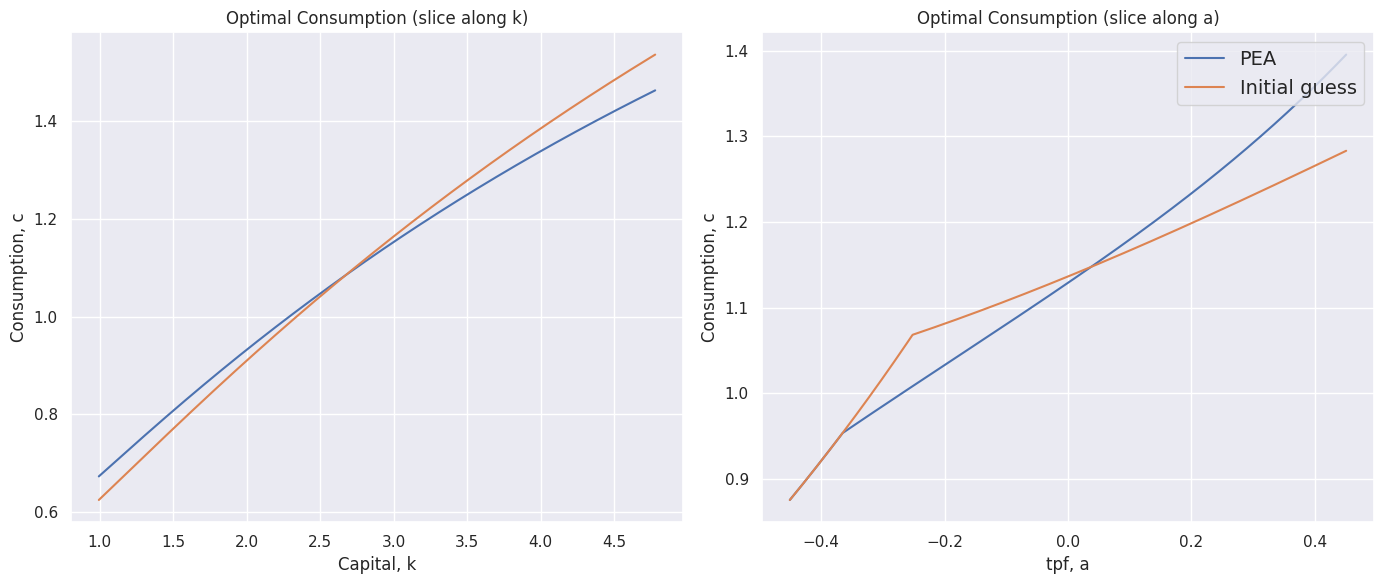

    k       M  N    DHM_stat           C_equivalent       MSE
0  10    1000  1  542.149727   [0.3074621205781231]  0.002776
1  10   10000  1   43.670381  [0.08235387593504145]  0.002437
2  10   50000  1  181.666333   [0.1677834758068589]  0.002337
3  10  100000  1  123.662851  [0.13882650134385133]  0.002372


In [16]:
# Usual PEA
tol = 1e-6
gam = 1.0
init = 100 #burnin

results_standard_PEA = []
slong_test = 200000
e_test = params.std_tfp * np.random.randn(slong_test)

max_iter = 30

# Try for different number of state draws:
for long in [1000, 10000, 50000, 100000]:
    slong = init + long
    print(f"State vector draws: {long}")

    # SS value. Use mean values on the simulation
    k_ss = SS_values[SS_values["Variable"] == "k"]["MeanValue"].item()
    a_ss = 0
    c_ss = SS_values[SS_values["Variable"] == "c"]["MeanValue"].item()

    # To ensure consumption is a least tol_c
    E_max = params.tol_c**(-params.gamma)

    # Also, define the index arrays T and T1
    T = np.arange(init, slong-2) # current period
    T1 = np.arange(init+1, slong-1) # forward by one period. Drop last period, for which mu is not calculated

    # Compute initial conditions:
    print(f"Intial b0: {coeff_array_0}")
    b0 = coeff_array_0

    # Generate shocks: e is a vector of size slong with normally distributed shocks scaled by se
    e = params.std_tfp * np.random.randn(slong)

    # Initialize a as a vector of zeros
    a = np.zeros(slong)

    # Set the first element of a
    a[0] = a_ss

    # Generate the AR(1) process for a
    for i in range(1, slong):
        a[i] = params.rho_tfp * a[i-1] + e[i]

    # Initialize iteration counter and convergence criterion
    iteration = 1
    crit = np.inf  # set to a large number initially

    #while crit > tol:
    while iteration < max_iter :
        k = np.zeros(slong + 1)
        c = np.zeros(slong)
        inv = np.zeros(slong)
        production = np.zeros(slong)
        X = np.zeros((slong, len(b0)))
        cash = np.zeros(slong)
        mu = np.zeros(slong + 1) #Lagrange multiplier

        # Set initial capital:
        k[0] = k_ss

        # Simulate the path:
        for i in range(slong):
            # Construct the regressors at time i.
            if (params.center_dep_var == True) & (params.normalize_dep_var == True):
                x1 = (k[i] - params.kss)/params.std_k
                x2 = a[i]/params.std_a
            elif (params.center_dep_var == True) & (params.normalize_dep_var == False):
                x1 = (k[i] - params.kss)
                x2 = a[i]
            else:
                x1 = np.log(k[i])
                x2 = a[i]

            """
            if params.nb_expl_vars == 4:
                X[i, :] = np.array([1, x1, x2, x1 * x2])
            else:
                if params.basis == 1:
                    X[i, :] = np.array([1, x1, x2, x1 * x2, x1**2, x2**2])
                else:
                    X[i, :] = np.array([1, x1, x2, x1 * x2, (x1**2 - 1), (x2**2 - 1)])
            """
            fill_X_row(X, i, x1, x2, params.nb_expl_vars, params.basis)

            # Ouptut
            production[i] = np.exp(a[i]) * (k[i]**params.alpha)
            # Cash on hand: production + capital from last period
            cash[i] =  production[i] + (1 - params.delta) * k[i]

            # Update capital for the next period using the model's law of motion
            # Consumption, assuming current constraint on investment does not bind
            if cond_exp_chosen == 7:
                #E_t_tilde = np.clip(np.exp(np.dot(X[i, :], b0)), production[i]**(-params.gamma), E_max)
                E_t_tilde = np.exp(np.dot(X[i, :], b0))
                c[i] = E_t_tilde ** (-1/params.gamma)
            else:
                print(f"cond_exp_chosen : {cond_exp_chosen} not implemented yet)")

            # Update guess, after calculating investmen
            inv[i] = production[i] - c[i]
            if inv[i] > 0:
                k[i+1] = cash[i] - c[i]
            else:
                k[i+1] = (1 - params.delta) * k[i]
                c[i] = production[i]
                mu[i] = c[i]**( - params.gamma ) - E_t_tilde

        # Construct the vector y using the simulated paths (vectorized operation)
        if cond_exp_chosen == 7:
            y = np.log(params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) ) )

        # Solve the regression: log(y) = X(T,:) * bt in a least-squares sense.
        # np.linalg.lstsq returns a tuple; the first element is the solution.
        y_reg = y
        X_reg = X[T, :]
        bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

        if params.regression_two_steps == True:
            #print(f"Step 1 coef: {bt}")
            # Square root of weights, when using log model
            sqrt_w = np.exp(X_reg @ bt)
            # Pre-multiply and then regress again
            X_wls = X_reg * sqrt_w[:, None]
            y_wls = y_reg * sqrt_w
            bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
            #print(f"Step 2 coef: {bt}")
        elif params.feasible_GLS == True:
            print(f"Step 1 coef: {bt}")
            ## residuals
            e0 = y_reg - X_reg @ bt
            # Estimate the variance‐function via a log‐linear model
            # use X_reg as Z, but you can build a richer Z = f(state)
            Z = X_reg
            # add tiny constant to avoid log(0)
            log_u = np.log(e0**2 + 1e-12)
            gamma, *_ = np.linalg.lstsq(Z, log_u, rcond=None)
            # fitted log‐variance and variance estimate
            log_var_hat = Z @ gamma
            var_hat     = np.exp(log_var_hat)
            # Construct inverse‐variance weights and do WLS
            w       = 1.0 / var_hat
            sqrt_w  = np.sqrt(w)
            # Pre-multiply and then regress again
            X_wls = X_reg * sqrt_w[:, None]
            y_wls = y_reg * sqrt_w
            bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)
            print(f"Step 2 coef FGLS: {bt}")

        # Update b using a smoothing parameter gam:
        b = gam * bt + (1 - gam) * b0

        # Compute convergence criterion (maximum absolute change in b)
        crit = np.max(np.abs(b - b0))

        # Update b0 for the next iteration
        b0 = b.copy()

        # Display current iteration and convergence criterion
        if (iteration % 10 == 0):
            print(f"Iteration: {iteration}\tConv. crit.: {crit}\t b: {b}")

        iteration += 1

    # residual
    Res = y_reg - np.dot(X[T, :], b0)
    MSE = np.mean(Res ** 2)

    # =============================================================================
    # Plotting results
    # =============================================================================
    # 1. Plot histogram of residuals
    plt.figure()
    plt.hist(Res, bins=100)
    plt.title('Residuals', fontname='Times', fontsize=12)

    # 2. Compute investment deviations: it = k[T1] - (1-delta)*k[T]
    it = k[T1] - (1 - params.delta) * k[T]

    # Create a 2x2 figure for several plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Investment scatter plot
    axs[0, 0].plot(k[T], it, '.', markersize=0.5, color='k')
    axs[0, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
    axs[0, 0].set_title('Investment', fontname='Times', fontsize=12)

    # Histogram of investment
    axs[0, 1].hist(it, bins=100)
    axs[0, 1].set_title('Distribution of Investment', fontname='Times', fontsize=12)

    # Capital stock: plot k[T] vs. k[T1] and add 45° reference line (scaled by (1-delta))
    axs[1, 0].plot(k[T], k[T1], '.', markersize=0.5, color='k')
    x_line = np.linspace(np.min(k[T]), np.max(k[T]), 100)
    axs[1, 0].plot(x_line, (1 - params.delta) * x_line, '-', linewidth=1.2, color='g')
    axs[1, 0].set_xlabel('k_t', fontname='Times', fontsize=12)
    axs[1, 0].set_title('Capital Stock', fontname='Times', fontsize=12)

    # Lagrange multiplier
    axs[1, 1].plot(k[T], mu[T], '.', markersize=0.5, color='k')
    axs[1, 1].set_xlabel('mu_t', fontname='Times', fontsize=12)
    axs[1, 1].set_title('Lagrange multiplier', fontname='Times', fontsize=12)

    plt.tight_layout()


    # 3. Time series plots for a subset
    T0 = np.arange(100, 600)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(it[T0], 'k')
    axs[0].set_xlabel('Time', fontname='Times', fontsize=12)
    axs[0].set_title('Investment', fontname='Times', fontsize=12)

    axs[1].plot(mu[T0], 'k')
    axs[1].set_xlabel('Time', fontname='Times', fontsize=12)
    axs[1].set_title('Lagrange multiplier', fontname='Times', fontsize=12)

    plt.tight_layout()
    plt.show()

    percentage_negative_investment = len(it[it < 0])/len(it)
    print(f"Percentage of time negative investment: {percentage_negative_investment}")

    percentage_mu_binds = len(mu[mu > 0])/len(mu)
    print(f"Percentage mu binds: {percentage_mu_binds}")

    mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0, e_test)
    print(f"Mean abs ut: {mean_abs_ut}, Mean square ut: {mean_square_ut}. DHM stats: {dhm_stat}. C equivalent: {c_equivalent}")

    # Store the results in a dictionary
    results_standard_PEA.append({
        "k": params.nb_expl_vars,
        "M": long,
        "N": 1,
        "DHM_stat": dhm_stat,
        "C_equivalent": c_equivalent,
        "MSE": MSE})

    # Summary stats on k_t
    df_stats = summarize_k_a(k, a)
    print(df_stats)

    # Slices around ss
    plot_consumption_slices(
                params,
                mean_k=df_stats[df_stats["Variable"] == "k"]["Mean"].item(),
                std_k=df_stats[df_stats["Variable"] == "k"]["Std"].item(),
                a_ss=0.0,
                std_a=params.std_a,
                b0=b0,
                coeff_array_0=coeff_array_0,
                cond_exp_chosen=7,
                nb_stdev=2,
                nb_points=1000)

# Create a Pandas DataFrame from the results
df_results_standard_PEA_M = pd.DataFrame(results_standard_PEA)
df_results_standard_PEA_M.to_csv(output_folder + "df_results_standard_PEA_M.csv")
print(df_results_standard_PEA_M.head())


In [17]:
np.sum(mu)

np.float64(97.35548691811535)

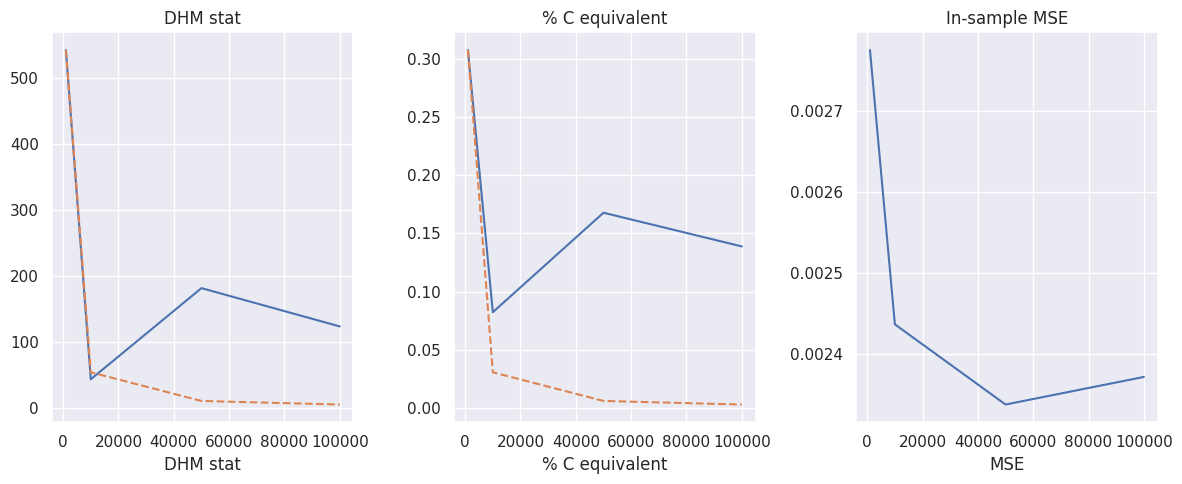

In [18]:
list_M = df_results_standard_PEA_M["M"]
ref_index_plot = 0

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].plot(list_M, df_results_standard_PEA_M["DHM_stat"])
axs[0].plot(list_M, df_results_standard_PEA_M["DHM_stat"][ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[0].set_xlabel('DHM stat', fontname='Times', fontsize=12)
axs[0].set_title('DHM stat', fontname='Times', fontsize=12)

axs[1].plot(list_M, np.abs(df_results_standard_PEA_M["C_equivalent"]))
axs[1].plot(list_M, np.abs(df_results_standard_PEA_M["C_equivalent"])[ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[1].set_xlabel('% C equivalent', fontname='Times', fontsize=12)
axs[1].set_title('% C equivalent', fontname='Times', fontsize=12)

axs[2].plot(df_results_standard_PEA_M["M"], np.abs(df_results_standard_PEA_M["MSE"]))
#axs[2].plot(list_M, np.abs(df_results_standard_PEA_M["MSE"])[ref_index_plot]*(list_M[ref_index_plot]/list_M), linestyle='--', label='1/N decay')
axs[2].set_xlabel('MSE', fontname='Times', fontsize=12)
axs[2].set_title('In-sample MSE', fontname='Times', fontsize=12)


plt.tight_layout()
plt.show()

#### II.C.2 bc-MC-PEA

Use several innovation draws per state vector

In [19]:
@njit
def generate_random_innovations(slong, N, std):
    """
    Generate 1d innovatio N(0, std^2)
    """
    e = np.empty(slong)
    for i in range(slong):
        e[i] = std * np.random.randn()
    return e

@njit
def generate_random_arrays(slong, N, std):
    """
    Generate 1d innovation N(0, std^2) and random array, where each row is N(0, std^2).
    """
    e = np.empty(slong)
    E = np.empty((slong, N))
    for i in range(slong):
        e[i] = std * np.random.randn()
        for j in range(N):
            E[i, j] = std * np.random.randn()
    return e, E


def create_plots(list_N, MSE_N, Time_N, mean_square_ut_N, dhm_stat_N, c_equivalent_N, label = "N", ref_index_plot=0):
    """
    Creates two sets of plots:

    1. A figure with two subplots:
       - Left: MSE vs. N, along with 1/N and 1/sqrt(N) decay lines.
       - Right: Elapsed Time vs. N, along with 1*N and 1*sqrt(N) increase lines.

    2. A second figure with four subplots (2x2 grid):
       - Top-left: Mean (ut)^2 vs. N with a 1/sqrt(N) decay line.
       - Top-right: DHM Stats vs. N with a 1/sqrt(N) decay line.
       - Bottom-left: % C equivalent vs. N with a 1/sqrt(N) decay line.
       - Bottom-right: In sample MSE vs. N with a 1/N decay line.

    Parameters:
        list_N         : array-like, values of N (Number of Innovation Draws)
        MSE_N          : array-like, Mean Squared Error for each N
        Time_N         : array-like, elapsed time (seconds) for each N
        mean_square_ut_N: array-like, mean (ut)^2 for each N
        dhm_stat_N     : array-like, DHM statistic for each N
        c_equivalent_N : array-like, % C equivalent for each N
        ref_index_plot : int, reference index for plotting the decay/increase lines (default 0)
    """
    list_N = np.array(list_N)  # ensure numpy array for elementwise operations

    # -----------------------
    # Figure 1: Two subplots side-by-side.
    fig1, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Left panel: MSE vs. N.
    axs[0].plot(list_N, MSE_N, marker='o', linestyle='-', label='MSE')
    axs[0].plot(list_N, MSE_N[ref_index_plot] * (list_N[ref_index_plot] / list_N),
                marker='o', linestyle='--', label='1/N decay')
    axs[0].plot(list_N, MSE_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
                marker='o', linestyle='--', label='1/sqrt(N) decay')
    axs[0].set_xlabel(label)
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].set_title(f'MSE vs. {label}')
    axs[0].grid(True)
    axs[0].legend()

    # Right panel: Elapsed Time vs. N.
    axs[1].plot(list_N, Time_N, marker='o', linestyle='-', color='orange', label='Elapsed Time (s)')
    #axs[1].plot(list_N, Time_N[ref_index_plot] * (list_N / list_N[ref_index_plot]),
    #            marker='o', linestyle='--', label='1*N increase')
    #axs[1].plot(list_N, Time_N[ref_index_plot] * np.sqrt(list_N / list_N[ref_index_plot]),
    #            marker='o', linestyle='--', label='1*sqrt(N) increase')
    axs[1].set_xlabel('label')
    axs[1].set_ylabel('Elapsed Time (seconds)')
    axs[1].set_title(f'Elapsed Time vs. {label}')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    # -----------------------
    # Figure 2: Four subplots in a 2x2 grid.
    fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 5))

    # Top-left: Mean (ut)^2 vs. N.
    ax1.plot(list_N, mean_square_ut_N, marker='o', linestyle='-')
    ax1.plot(list_N, mean_square_ut_N[ref_index_plot] * np.power(list_N[ref_index_plot] / list_N, 0.5),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax1.set_xlabel(label)
    ax1.set_ylabel('Mean (ut)^2')
    ax1.set_title('Mean (ut)^2')
    ax1.grid(True)
    ax1.legend()

    # Top-right: DHM Stats vs. N.
    ax2.plot(list_N, dhm_stat_N, marker='o', linestyle='-', color='orange')
    ax2.plot(list_N, dhm_stat_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax2.set_xlabel(label)
    ax2.set_ylabel('DHM Stats')
    ax2.set_title('DHM Stats')
    ax2.grid(True)
    ax2.legend()

    # Bottom-left: % C equivalent vs. N.
    ax3.plot(list_N, c_equivalent_N, marker='o', linestyle='-', color='orange')
    ax3.plot(list_N, c_equivalent_N[ref_index_plot] * np.sqrt(list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/sqrt(N) decay')
    ax3.set_xlabel(label)
    ax3.set_ylabel('% C equivalent')
    ax3.set_title('% C equivalent')
    ax3.grid(True)
    ax3.legend()

    # Bottom-right: In sample MSE vs. N.
    ax4.plot(list_N, MSE_N, marker='o', linestyle='-', label='In sample MSE')
    ax4.plot(list_N, MSE_N[ref_index_plot] * (list_N[ref_index_plot] / list_N),
             marker='o', linestyle='--', label='1/N decay')
    ax4.set_xlabel(label)
    ax4.set_ylabel('% In sample MSE')
    ax4.set_title('% In sample MSE')
    ax4.grid(True)
    ax4.legend()

    plt.tight_layout()
    plt.show()

In [20]:
@njit
def clamp(arr, low, high):
    """
    Element-wise clamp of `arr` between `low` and `high`.
    Equivalent to np.clip(arr, low, high). np.clip has trouble with jit compilation.
    """
    return np.minimum(np.maximum(arr, low), high)


@njit
def fill_X_next(Xv, x1, x2, nb_expl_vars, basis):
    """
    In‐place fill of Xv (shape = (nb_expl_vars,)) for a single point (x1,x2),
    using monomial basis (basis=1) or Chebyshev basis (basis=2),
    with nb_expl_vars in {4,6,10}.
    """
    # 4‐term cross basis
    if nb_expl_vars == 4:
        Xv[0] = 1.0
        Xv[1] = x1
        Xv[2] = x2
        Xv[3] = x1 * x2
        return

    if basis == 1:
        # —— Monomial ——
        if nb_expl_vars == 6:
            # [1, x1, x2, x1*x2, x1^2, x2^2]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1
            Xv[5] = x2 * x2
            return
        else:
            # nb_expl_vars == 10
            # [1, x1, x2, x1*x2, x1^2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1
            Xv[5] = x2 * x2
            Xv[6] = x1 * x1 * x1
            Xv[7] = x1 * x1 * x2
            Xv[8] = x1 * x2 * x2
            Xv[9] = x2 * x2 * x2
            return

    else:
        # —— Chebyshev ——
        if nb_expl_vars == 6:
            # [1, x1, x2, x1*x2, x1^2-1, x2^2-1]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1 - 1.0
            Xv[5] = x2 * x2 - 1.0
            return
        else:
            # nb_expl_vars == 10
            # [1, x1, x2, x1*x2, x1^2-1, x2^2-1,
            #  4x1^3-3x1, 4x2^3-3x2, (x1^2-1)*x2, x1*(x2^2-1)]
            Xv[0] = 1.0
            Xv[1] = x1
            Xv[2] = x2
            Xv[3] = x1 * x2
            Xv[4] = x1 * x1 - 1.0
            Xv[5] = x2 * x2 - 1.0
            Xv[6] = 4.0*x1*x1*x1 - 3.0*x1
            Xv[7] = 4.0*x2*x2*x2 - 3.0*x2
            Xv[8] = (x1*x1 - 1.0) * x2
            Xv[9] = x1 * (x2*x2 - 1.0)
            return


@njit
def simulate_path_N(slong, kss, e, E, b0, beta, gamma, alpha, delta, rho_tfp, N, nb_expl_vars, tol_c, center_dep_var, normalize_dep_var, basis):
    """
    Simulates the model path period by period.

    Parameters:
        slong   : total number of simulation periods (integer)
        kss     : steady state capital (float)
        e       : array of nnovations of shape (slong)
        E       : array of extra innovations of shape (slong, N)
        b0      : coefficient vector (array of length 6)
        beta    : discount factor (float)
        gamma   : CRRA coefficient (float)
        alpha   : production elasticity (float)
        delta   : depreciation rate (float)
        rho_tfp : AR(1) coefficient for TFP (float)
        N       : number of innovations per period (integer)
    """
    # Preallocate arrays
    a = np.zeros(slong)
    k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
    mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
    y      = np.zeros(slong)        # simulated y
    production = np.zeros(slong)    # production
    inv = np.zeros(slong)           # investment
    cash     = np.zeros(slong)      # cash in hand
    c = np.zeros(slong)             # consumption
    X      = np.zeros((slong, nb_expl_vars))   # regressor matrix (6 variables)
    X_next = np.zeros(nb_expl_vars) # regressor, next period
    y_temp = np.zeros(N)            # temporary array for innovations

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Initialize state.
    k[0] = kss
    a[0] = 0.0
    for i in range(1, slong):
        a[i] = rho_tfp * a[i-1] + e[i]

    for i in range(slong):
        # Build regressor vector for current period i: [1, log(k[i]), a[i], log(k[i])^2, a[i]^2, log(k[i])*a[i]]
        x1 = np.log(k[i])
        x2 = a[i]

        """
        if nb_expl_vars == 4:
            X[i, :] = np.array([1, x1, x2, x1 * x2])
        else:
            if basis == 1:
                X[i, :] = np.array([1, x1, x2, x1 * x2, x1**2, x2**2])
            else:
                X[i, :] = np.array([1, x1, x2, x1 * x2, (x1**2 - 1), (x2**2-1)])
        """
        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        # Consumption, if current constraint on investment does not bind:
        E_t_tilde = np.exp(np.dot(X[i, :], b0))
        # E_t_tilde = clamp(np.exp(np.dot(X[i, :], b0)), production[i]**(-gamma), E_max)
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Move to next period
        ## precalculate too avoid repeated calculations
        term1 = alpha * (k[i+1]**(alpha - 1))
        term2 = k[i+1] ** alpha
        a_tilde = rho_tfp * a[i]

        x1_next = np.log(k[i+1])

        ## Start building regressor next period
        """
        if nb_expl_vars == 4:
            X_next = np.array([1, x1_next, 0.0, 0.0])
        else:
            if basis == 1:
                X_next = np.array([1, x1_next, 0.0, 0.0, x1_next**2, 0.0])
            else:
                X_next = np.array([1, x1_next, 0.0, 0.0, (x1_next**2 - 1), 0.0])
        """

        # For each of the N innovations compute a simulated realization for y
        for j in range(N):
            # Next period's TFP shock
            a_next = a_tilde + E[i, j]

            # production next period:
            production_next = np.exp(a_next) * term2

            ## Without repeated calculations
            # Build regressor for next period using k[i+1] and a_next
            x2_next = a_next

            """
            if nb_expl_vars == 4:
                X_next[2] = x2_next
                X_next[3] = x1_next * x2_next
            else:
                if basis == 1:
                    X_next[2] = x2_next
                    X_next[3] = x1_next * x2_next
                    X_next[5] = x2_next**2
                else:
                    X_next[2] = x2_next
                    X_next[3] = x1_next * x2_next
                    X_next[5] = (x2_next**2 - 1)
            """
            fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)

            #c_next = np.maximum(tol_c, css*(1 + np.dot(X_next, b0))**(-1/gamma))
            E_next_tilde = np.exp(np.dot(X_next, b0))
            #E_next_tilde = clamp(np.dot(X_next, b0), production_next**(-gamma), E_max)
            c_next = E_next_tilde ** (-1 / gamma)

            # Update guess, after calculating investment
            inv_next = production_next - c_next
            if inv_next > 0:
                # non-binding
                mu_next = 0
            else:
                # binding
                c_next = production_next
                mu_next = c_next**( - gamma ) - E_next_tilde

            ## g2(s,e)
            y_temp[j] =  ( c_next**(-gamma) ) * (np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta)

        # Average the N innovations to form the simulated y for period i
        s = 0.0
        for j in range(N):
            s += y_temp[j]

        # Sample average to proxy an expectation:
        y[i] = np.log( beta * (s / N) )

    return X, y


@njit
def simulate_path_N_inplace(
    M: int,
    init: int,
    kss: float,
    e: np.ndarray,
    E: np.ndarray,
    b0: np.ndarray,
    beta: float,
    gamma: float,
    alpha: float,
    delta: float,
    rho_tfp: float,
    N: int,
    nb_expl_vars: int,
    tol_c: float,
    center_dep_var: bool,
    normalize_dep_var: bool,
    basis: int,
    a: np.ndarray,
    k: np.ndarray,
    mu: np.ndarray,
    y: np.ndarray,
    production: np.ndarray,
    inv: np.ndarray,
    cash: np.ndarray,
    c: np.ndarray,
    X: np.ndarray,
    X_next: np.ndarray,
    y_temp: np.ndarray
) -> None:
    """
    Simulates one path of the neoclassical growth model using a Parameterized Expectations Algorithm (PEA)
    with in-place mutation of pre-allocated arrays. JIT-compiled with numba for maximum performance.

    All outputs are written directly into the provided arrays; no value is returned.
    """
    slong = M + init

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Set value for constant vector
    X[:, 0] = 1.0

    # Unpack coefficients for inlined dot-products
    """
    b0_0 = b0[0]; b0_1 = b0[1]; b0_2 = b0[2]; b0_3 = b0[3]
    if nb_expl_vars > 4:
        b0_4 = b0[4]; b0_5 = b0[5]
    """

    # Initialize state
    k[0] = kss
    a[0] = 0.0
    for i in range(1, slong):
        a[i] = rho_tfp * a[i-1] + e[i]

    for i in range(0, slong):
        # Compute regressors x1, x2
        x1 = np.log(k[i])
        x2 = a[i]

        # Fill in X[i] for OLS regression y = X*b
        """
        if nb_expl_vars == 4:
            X[i, 1] = x1; X[i, 2] = x2; X[i, 3] = x1 * x2
        else:
            if basis == 1:
                X[i, 1] = x1; X[i, 2] = x2; X[i, 3] = x1 * x2; X[i, 4] = x1**2; X[i, 5] = x2**2
            else:
                X[i, 1] = x1; X[i, 2] = x2; X[i, 3] = x1 * x2; X[i, 4] = x1**2 - 1.0; X[i, 5] = x2**2 - 1.0
        """
        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        # Cash-in-hand and consumption decision
        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        # Consumption, if current constraint on investment does not bind:
        ## Dot product
        """
        if nb_expl_vars == 4:
            scalar = b0_0 + b0_1 * x1 + b0_2 * x2 + b0_3 * (x1 * x2)
        else:
            if basis == 1:
                scalar = (b0_0 + b0_1 * x1 + b0_2 * x2 + b0_3 * (x1 * x2)
                          + b0_4 * (x1**2) + b0_5 * (x2**2))
            else:
                scalar = (b0_0 + b0_1 * x1 + b0_2 * x2 + b0_3 * (x1 * x2)
                          + b0_4 * (x1**2 - 1.0) + b0_5 * (x2**2 - 1.0))
        """
        scalar = np.dot(X[i, :], b0)

        #E_t_tilde = clamp(np.exp(scalar), production[i]**(-gamma), E_max)
        E_t_tilde = np.exp(scalar)
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
            mu[i] = 0.0
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Only do MC expectation for i >= init. No need for burnin phase
        if i >= init:
            # Prepare next-period terms (precalculation of terms that do not depend on j)
            term1 = alpha * k[i+1]**(alpha - 1.0)
            term2 = k[i+1] ** alpha
            a_tilde = rho_tfp * a[i]

            x1_next = np.log(k[i+1])

            # Monte Carlo expectation
            for j in range(N):
                a_next = a_tilde + E[i, j]
                # production next period:
                production_next = np.exp(a_next) * term2

                x2_next = a_next

                """
                if nb_expl_vars == 4:
                    scalar_next = (b0_0 + b0_1 * x1_next + b0_2 * x2_next
                                   + b0_3 * (x1_next * x2_next))
                else:
                    if basis == 1:
                        scalar_next = (b0_0 + b0_1 * x1_next + b0_2 * x2_next
                                       + b0_3 * (x1_next * x2_next)
                                       + b0_4 * (x1_next**2) + b0_5 * (x2_next**2))
                    else:
                        scalar_next = (b0_0 + b0_1 * x1_next + b0_2 * x2_next
                                       + b0_3 * (x1_next * x2_next)
                                       + b0_4 * (x1_next**2 - 1.0)
                                       + b0_5 * (x2_next**2 - 1.0))
                """
                fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)
                scalar_next = np.dot(X_next, b0)

                # Consumption next period, assuming constraint does not bind:
                #E_next_tilde = clamp(np.exp(scalar_next), production_next ** (-gamma), E_max)
                E_next_tilde = np.exp(scalar_next)
                c_next = E_next_tilde ** (-1 / gamma)

                # Update guess, after calculating investment
                inv_next = production_next - c_next
                if inv_next > 0:
                    # non-binding
                    mu_next = 0
                else:
                    # binding
                    c_next = production_next
                    mu_next = c_next**( - gamma ) - E_next_tilde

                ## g2(s,e)
                y_temp[j] =  ( c_next**( -gamma ) ) * ( np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta)

            # Final aggregation
            s = 0.0
            for j in range(N):
                s += y_temp[j]

            y[i] = np.log( beta * (s / N) )


In [21]:
@njit
def evaluate_IE_and_EEE_Gauss_path_inplace(
    slong: int,
    kss: float,
    e: np.ndarray,
    b0: np.ndarray,
    beta: float,
    gamma: float,
    alpha: float,
    delta: float,
    rho_tfp: float,
    number_nodes: int,
    quadrature_nodes: np.ndarray,
    quadrature_weights: np.ndarray,
    nb_expl_vars: int,
    tol_c: float,
    center_dep_var: bool,
    normalize_dep_var: bool,
    basis: int,
    # Preallocated arrays for in-place mutation:
    a: np.ndarray,            # shape (slong,)
    k: np.ndarray,            # shape (slong+1,)
    mu: np.ndarray,           # shape (slong+1,)
    production: np.ndarray,   # shape (slong,)
    inv: np.ndarray,          # shape (slong,)
    IE: np.ndarray,           # shape (slong,)
    EEE: np.ndarray,          # shape (slong,)
    cash: np.ndarray,         # shape (slong,)
    c: np.ndarray,            # shape (slong,)
    X: np.ndarray,            # shape (slong, nb_expl_vars)
    X_next: np.ndarray,       # shape (nb_expl_vars,)
    linear_model: np.ndarray, # shape (slong,)
    y_temp1: np.ndarray,      # shape (number_nodes,)
) -> None:

    """
    In-place computation of MSIE (IE) and Euler equation errors (EEE)
    along a single simulated path using Gauss–Hermite quadrature.

    All output arrays (a, k, IE, EEE, cash, c, X, X_next, linear_model,
    y_temp1, y_temp2) must be pre-allocated to the correct shape.
    """
    # Clear values
    a[:] = 0.0
    k[:] = 0.0
    mu[:] = 0.0
    production[:] = 0.0
    inv[:] = 0.0
    IE[:] = 0.0
    EEE[:] = 0.0
    cash[:] = 0.0
    c[:] = 0.0
    X[:,:] = 0.0
    X_next[:] = 0.0
    linear_model[:] = 0.0
    y_temp1[:] = 0.0

    # To ensure consumption is a least tol_c
    E_max = tol_c**(-gamma)

    # Set initial state
    k[0] = kss
    a[0] = 0.0

    # AR(1) TFP path
    for i in range(1, slong):
        a[i] = rho_tfp * a[i - 1] + e[i]

    # Unpack b0 for inlined dot-products
    """
    b0_0 = b0[0]; b0_1 = b0[1]; b0_2 = b0[2]; b0_3 = b0[3]
    if nb_expl_vars > 4:
        b0_4 = b0[4]; b0_5 = b0[5]
    """

    # Main loop
    for i in range(slong):
        # 1) build current regressors x1,x2
        x1 = np.log(k[i])
        x2 = a[i]

        # 2) fill X[i]
        """
        X[i, 0] = 1.0
        X[i, 1] = x1
        X[i, 2] = x2
        X[i, 3] = x1 * x2
        if nb_expl_vars > 4:
            if basis == 1:
                X[i, 4] = x1 * x1
                X[i, 5] = x2 * x2
            else:
                X[i, 4] = x1 * x1 - 1.0
                X[i, 5] = x2 * x2 - 1.0
        """
        fill_X_row(X, i, x1, x2, nb_expl_vars, basis)

        # 3) cash, linear prediction, consumption, and k forward
        production[i] = np.exp(a[i]) * k[i] ** alpha
        cash[i] = production[i] + (1 - delta) * k[i]

        # inline dot(X[i], b0)
        """
        if nb_expl_vars == 4:
            scalar = b0_0 + b0_1*x1 + b0_2*x2 + b0_3*(x1*x2)
        else:
            if basis == 1:
                scalar = (b0_0 + b0_1*x1 + b0_2*x2 + b0_3*(x1*x2)
                          + b0_4*(x1*x1) + b0_5*(x2*x2))
            else:
                scalar = (b0_0 + b0_1*x1 + b0_2*x2 + b0_3*(x1*x2)
                          + b0_4*(x1*x1 - 1.0) + b0_5*(x2*x2 - 1.0))
        """
        scalar = np.dot(X[i, :], b0)

        linear_model[i] = scalar
        #E_t_tilde = clamp(np.exp(linear_model[i]), production[i]**(-gamma), E_max)
        E_t_tilde = np.exp(linear_model[i])
        c[i] = E_t_tilde ** (-1 / gamma)

        # Update guess, after calculating investment
        inv[i] = production[i] - c[i]
        if inv[i] > 0:
            k[i+1] = cash[i] - c[i]
            mu[i] = 0.0
        else:
            k[i+1] = (1 - delta) * k[i]
            c[i] = production[i]
            mu[i] = c[i]**( - gamma ) - E_t_tilde

        # Precompute next‐period quantities
        x1_next = np.log(k[i+1])

        term1 = alpha * (k[i+1] ** (alpha - 1.0))
        term2 = k[i+1] ** alpha
        a_tilde = rho_tfp * a[i]

        # 4) Quadrature loop
        for j in range(number_nodes):
            a_next = a_tilde + quadrature_nodes[j]

            # production next period:
            production_next = np.exp(a_next) * term2

            x2_next = a_next

            # inline dot(X_next, b0)
            """
            if nb_expl_vars == 4:
                scalar_next = (b0_0 + b0_1*x1_next + b0_2*x2_next
                               + b0_3*(x1_next*x2_next))
            else:
                if basis == 1:
                    scalar_next = (b0_0 + b0_1*x1_next + b0_2*x2_next
                                   + b0_3*(x1_next*x2_next)
                                   + b0_4*(x1_next*x1_next)
                                   + b0_5*(x2_next*x2_next))
                else:
                    scalar_next = (b0_0 + b0_1*x1_next + b0_2*x2_next
                                   + b0_3*(x1_next*x2_next)
                                   + b0_4*(x1_next*x1_next - 1.0)
                                   + b0_5*(x2_next*x2_next - 1.0))
            """

            # Consumption next period, assuming constraint does not bind:
            fill_X_next(X_next, x1_next, x2_next, nb_expl_vars, basis)
            scalar_next = np.dot(X_next, b0)

            E_next_tilde = np.exp(scalar_next)
            c_next = E_next_tilde ** (-1 / gamma)

            # Update guess, after calculating investment
            inv_next = production_next - c_next
            if inv_next > 0:
                # non-binding
                mu_next = 0
            else:
                # binding
                c_next = production_next
                mu_next = c_next**( - gamma ) - E_next_tilde

            # Monte-Carlo expectation terms:
            ## RHS of Euler equation
            y_temp1[j] = beta * ( ( c_next ** ( - gamma ) ) * ( np.exp(a_next) * term1 + 1.0 - delta ) + mu_next * (1.0 - delta) )

        # 5) Weighted averages & fill IE, EEE
        s1 = 0.0
        for j in range(number_nodes):
            s1 += quadrature_weights[j] * y_temp1[j]

        #Integration error: log(E_t) - x' beta. E_t calculated using Gaussian intergration.
        IE[i]  = np.log(s1) - linear_model[i]
        #Euler equation error: 1 - (1/c_t)*(E_t()^{-1/gamma})
        EEE[i] = 1.0 - (1.0 / c[i]) * ( ( s1  + mu[i] ) **(-1.0 / gamma))



Run for several choices of $N$.

In [22]:
%%time
# --------------------------------------------------------------------------
# Main code (outside numba) to run the PEA iterations.
# --------------------------------------------------------------------------
list_N = [1, 2, 5, 10, 100, 200, 500, 1000]
MSE_N = np.zeros(len(list_N)) #In-sample
MSIE_N = np.zeros(len(list_N)) #Mean square integration error, out-sample
A_EEE_N = np.zeros(len(list_N)) #Average absolute value of Euler equation error, out-sample
Time_N = np.zeros(len(list_N))

nb_tot_reps = 5
M = 250
init = 100
slong = init + M

tol = 1e-8
gam = 1.0  # smoothing parameter
max_iter = 50 # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

# Innovations for the out-sample test
slong_test = 100000
init_test = 1000
e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))
#y_temp2_test      = np.zeros(len(params.nodes_flat))

results = []
np.random.seed(1)
#for N in range(1, max_N+1):
for (index_N, N) in enumerate(list_N):
    print("Running simulation with N =", N)
    # repeat several times
    for nb_rep in range(nb_tot_reps):
        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations


        # Warmup (compilation) first go
        ## Without preallocations
        #X_data, y_out = simulate_path_N(slong, params.kss, e, E, b0_current, params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N, params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis)
        ## With preallocations
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

        start_time = time.perf_counter()
        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Call the numba-compiled simulation to get regression data.
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                            params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                            params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                            a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)


            #X_data, y_out = simulate_path_N(slong, params.kss, e, E, b0_current, params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N, params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]
            # OLS
            bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

            if params.regression_two_steps == True:
                #print(f"Step 1 coef: {bt}")
                # Square root of weights, when using log model
                sqrt_w = np.exp(X_reg @ bt)
                # Pre-multiply and then regress again
                X_wls = X_reg * sqrt_w[:, None]
                y_wls = y_reg * sqrt_w
                bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)

            # Parameter update
            b_new = gam * bt + (1 - gam) * b0_current
            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()
            if (iter_num % 10 == 0):
                print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1

        end_time = time.perf_counter()
        elapsed = end_time - start_time
        print("Elapsed time for N =", N, ":", elapsed, "seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)
        MSE_N[index_N] = MSE
        # Alternative measure of accuracy
        mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)

        # Mean square integration error and EEE
        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                             e_test, b0_current, params.beta, params.gamma, params.alpha,
                                             params.delta, params.rho_tfp, len(params.nodes_flat),
                                             params.nodes_flat, params.weights, params.nb_expl_vars,
                                             params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                             a_test, k_test, mu_test, production_test, inv_test,
                                             IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                             y_temp1_test)


        MSIE_N[index_N] = np.mean(IE[init_test:-1]**2)
        A_EEE_N[index_N] = np.mean(np.abs(EEE[init_test:-1]))

        Time_N[index_N] = elapsed
        print("Final iteration N:", N, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE_N[index_N], "Average EEE:", A_EEE_N[index_N])
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE_N[index_N],
            "A_EEE": A_EEE_N[index_N],
            "Mean_abs_u": mean_abs_ut,
            "mean_square_ut": mean_square_ut,
            "std_ut": std_ut,
            "dhm_stat": dhm_stat,
            "c_equivalent": c_equivalent
            })


# Create a Pandas DataFrame from the results
df_results_N = pd.DataFrame(results)
df_results_N.to_csv(output_folder + "df_results_N.csv")
print(df_results_N.head())

# Create average df, averaging over repetitions
df_results_N["M_init"]    = df_results_N["M"] + init #add burnin
df_results_N["log_N"]    = np.log(df_results_N["N"])
df_results_N["log_M"]    = np.log(df_results_N["M"])
df_results_N["log_MN"]   = np.log(df_results_N["M"] * df_results_N["N"])
df_results_N["MN_label"] = df_results_N["M"].astype("str") + "-" + df_results_N["N"].astype("str")

# Remove outliers (non-convergence)
#df_results_N = df_results_N[df_results_N["MSIE"] < 1.0]

df_results_average_N = df_results_N.groupby("MN_label").mean().reset_index()
df_results_average_N.sort_values("N", inplace=True)
df_results_average_N.to_csv(output_folder + "df_results_average_N.csv")
print(df_results_average_N.head())

Running simulation with N = 1
Iteration: 10 Conv. crit.: 0.005118617523405922
Iteration: 20 Conv. crit.: 0.0001800068583832637
Iteration: 30 Conv. crit.: 1.138258364918876e-05
Iteration: 40 Conv. crit.: 6.404390315850605e-07
Elapsed time for N = 1 : 0.008564840000076401 seconds


/tmp/ipython-input-1424357549.py:70: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:70: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:82: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1424357549.py:87: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration N: 1 Iterations: 50 OLS MSE: 0.0020098396828061383 MISE: inf Average EEE: 0.9995190592446168
Final b0: [-1.23153222  1.05846201 -0.54052948 -0.0882976  -0.99126486 -0.29959038
  0.071696   -0.07495307  0.08770236  0.28797888]
Iteration: 10 Conv. crit.: 0.2081604685632248
Iteration: 20 Conv. crit.: 0.011983097634242768
Iteration: 30 Conv. crit.: 0.0006509731346064918
Iteration: 40 Conv. crit.: 3.968122296571508e-05
Elapsed time for N = 1 : 0.008308349000003545 seconds
Final iteration N: 1 Iterations: 50 OLS MSE: 0.00466854510505544 MISE: 0.0013307865173132094 Average EEE: 0.018644363868341087
Final b0: [ 2.49778256 -2.77819996 -2.18631584  1.83151906  0.64829101  1.40604143
 -0.07455441  0.01792154 -1.12857666 -1.67411571]
Iteration: 10 Conv. crit.: 0.01572249194713471
Iteration: 20 Conv. crit.: 0.0006473603453643895
Iteration: 30 Conv. crit.: 2.6891666265349556e-05
Iteration: 40 Conv. crit.: 9.491273085249219e-07
Elapsed time for N = 1 : 0.008700418999978865 seconds


/tmp/ipython-input-1424357549.py:70: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:70: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:82: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1424357549.py:87: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration N: 1 Iterations: 50 OLS MSE: 0.0018509712881048686 MISE: inf Average EEE: 0.9843562026460158
Final b0: [-0.95724533  0.87061741 -1.46437135  0.74711979 -0.52064767 -0.74615654
  0.04727335 -0.10623383 -0.35779606  0.78836525]
Iteration: 10 Conv. crit.: 0.012371679225131493
Iteration: 20 Conv. crit.: 6.437341782905559e-05
Iteration: 30 Conv. crit.: 3.741285792946414e-06
Iteration: 40 Conv. crit.: 1.809371288352679e-07
Elapsed time for N = 1 : 0.009127557999931923 seconds
Final iteration N: 1 Iterations: 50 OLS MSE: 0.0019387177200659242 MISE: 0.00029339011532415537 Average EEE: 0.009414416768255622
Final b0: [-0.63141441  0.62762321 -1.73548168  1.2129779  -0.36806125 -0.65924735
  0.04253256 -0.03166815 -0.64808535  0.80945028]
Iteration: 10 Conv. crit.: 0.01098835211354321
Iteration: 20 Conv. crit.: 0.0005791785764461821
Iteration: 30 Conv. crit.: 0.00010241264694066388
Iteration: 40 Conv. crit.: 1.4385172545372527e-05
Elapsed time for N = 1 : 0.008416609000050812 seco

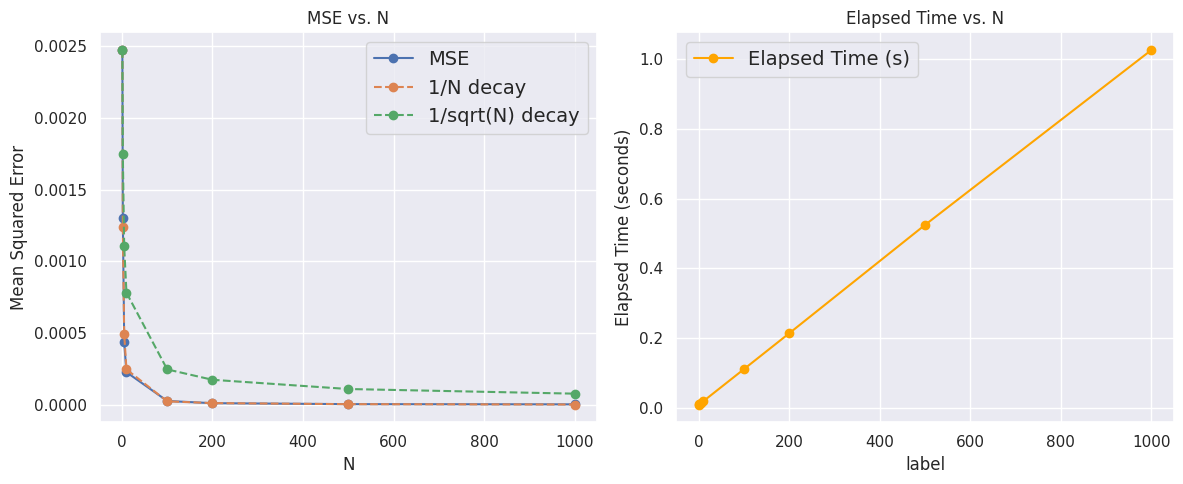

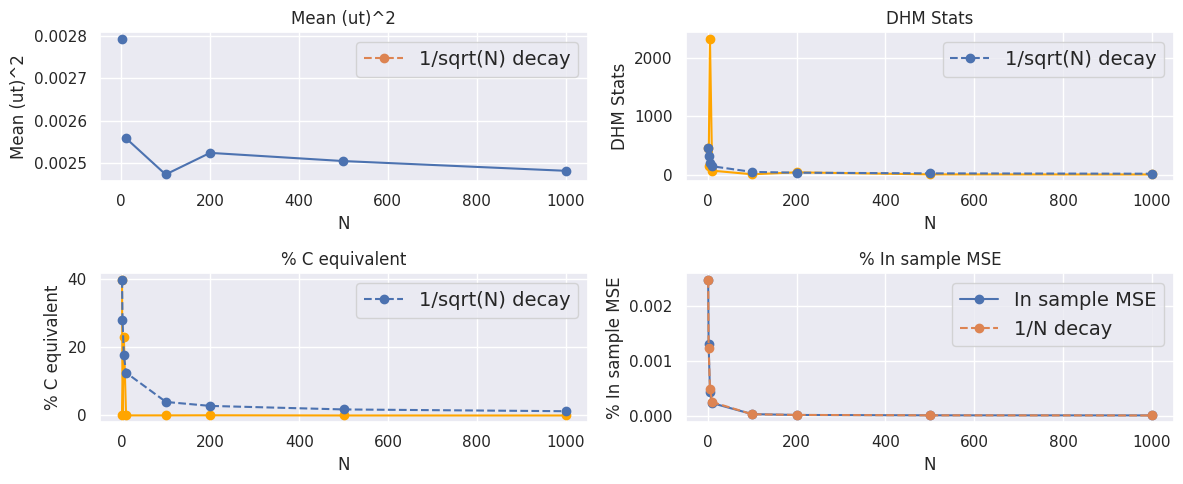

In [23]:

create_plots(df_results_average_N["N"].values, df_results_average_N["MSE"].values, df_results_average_N["Time"].values, df_results_average_N["mean_square_ut"].values, df_results_average_N["dhm_stat"].values, np.abs(df_results_average_N["c_equivalent"]).values, ref_index_plot=0)

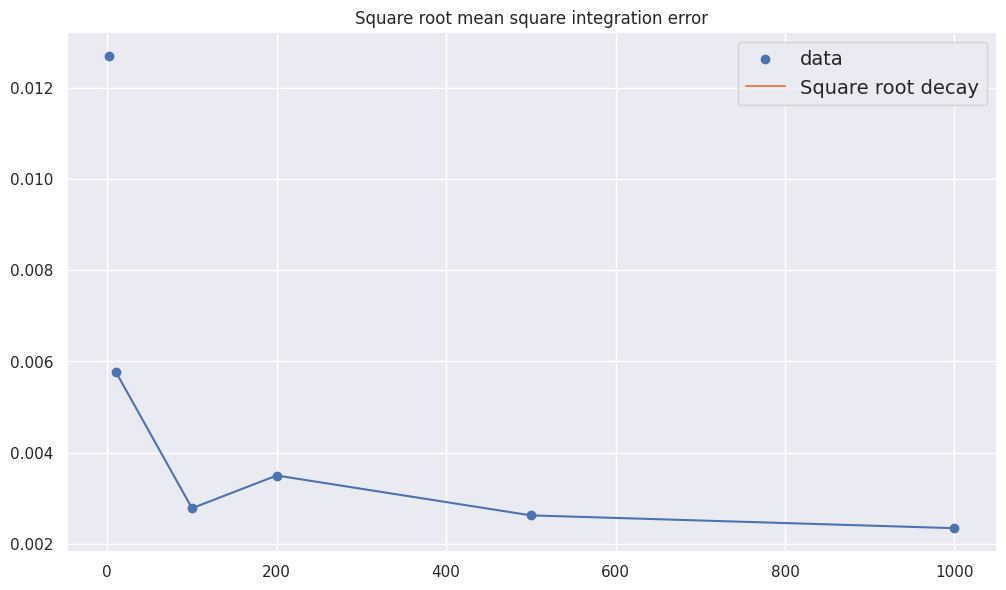

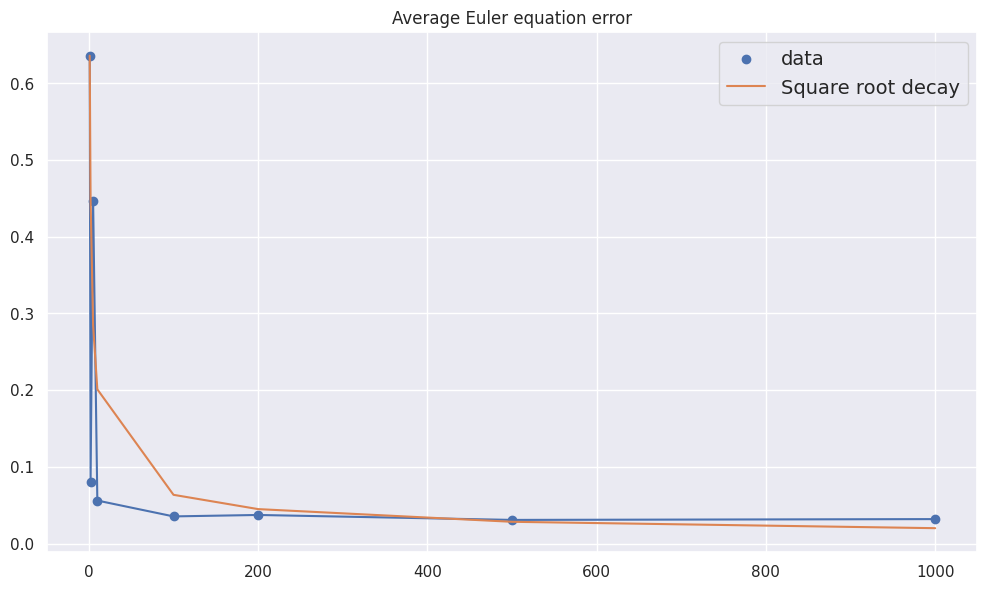

In [24]:
plt.scatter(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"]), label="data")
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"]))
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["MSIE"].values[0] * (df_results_average_N["N"].values[0]/df_results_average_N["N"]) ), label="Square root decay")
plt.title("Square root mean square integration error")
plt.legend()
plt.savefig(output_folder + "MSIE_N.pdf", dpi=300)
plt.show()

plt.scatter(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"]), label="data")
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"]))
plt.plot(df_results_average_N["N"], np.sqrt(df_results_average_N["A_EEE"].values[0] * (df_results_average_N["N"].values[0]/df_results_average_N["N"]) ), label="Square root decay")

plt.title("Average Euler equation error")
plt.savefig(output_folder + "A_EEE_N.pdf", dpi=300)
plt.legend()
plt.show()


several choices of $M$.

In [25]:
# --------------------------------------------------------------------------
# Main code (outside numba) to run the PEA iterations.
# --------------------------------------------------------------------------
list_M = [200, 500, 1000, 5000, 10000, 20000]
MSE_M = np.zeros(len(list_M)) #In-sample
MSIE_M = np.zeros(len(list_M)) #Mean square integration error, out-sample
A_EEE_M = np.zeros(len(list_M)) #Average absolute value of Euler equation error, out-sample
Time_M = np.zeros(len(list_M))

# Number innovation draws
N = 2 #10 #1
init = 100 #burnin

tol = 1e-8
gam = 1.0  # smoothing parameter
max_iter = 50 # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

# Innovations for the out-sample test
slong_test = 100000
init_test = 1000
e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []

np.random.seed(1)
#for N in range(1, max_N+1):
for (index_M, M) in enumerate(list_M):
    slong = init + M
    print("Running simulation with M =", M)
    # repeat several times
    for nb_rep in range(nb_tot_reps):

        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations

        # Warmup (compilation) first go
        ## Without preallocations
        #X_data, y_out = simulate_path_N(slong, params.kss, e, E, b0_current, params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N, params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis)
        ## With preallocations
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

        start_time = time.perf_counter()
        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Call the numba-compiled simulation to get regression data.
            #X_data, y_out = simulate_path_N(slong, params.kss, params.css, params.std_k, params.std_c, e, E, b0_current, params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N, params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis)
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]
            # OLS
            bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)

            if params.regression_two_steps == True:
                #print(f"Step 1 coef: {bt}")
                # Square root of weights, when using log model
                sqrt_w = np.exp(X_reg @ bt)
                # Pre-multiply and then regress again
                X_wls = X_reg * sqrt_w[:, None]
                y_wls = y_reg * sqrt_w
                bt, _, _, _ = np.linalg.lstsq(X_wls, y_wls, rcond=None)


            # Parameter update
            b_new = gam * bt + (1 - gam) * b0_current
            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()
            if (iter_num % 10 == 0):
                print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        print("Elapsed time for M =", M, ":", elapsed, "seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)
        MSE_M[index_M] = MSE
        # Alternative measure of accuracy
        mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)


        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                         e_test, b0_current, params.beta, params.gamma, params.alpha,
                                         params.delta, params.rho_tfp, len(params.nodes_flat),
                                         params.nodes_flat, params.weights, params.nb_expl_vars,
                                         params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                         a_test, k_test, mu_test, production_test, inv_test,
                                         IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                         y_temp1_test)

        MSIE_M[index_M] = np.mean(IE[init_test:-1]**2)
        A_EEE_M[index_M] = np.mean(np.abs(EEE[init_test:-1]))

        Time_M[index_M] = elapsed
        print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE_M[index_M], "Average EEE:", A_EEE_M[index_M])
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE_M[index_M],
            "A_EEE": A_EEE_M[index_M],
            "Mean_abs_u": mean_abs_ut,
            "mean_square_ut": mean_square_ut,
            "std_ut": std_ut,
            "dhm_stat": dhm_stat,
            "c_equivalent": c_equivalent
            })

# Create a Pandas DataFrame from the results
df_results_M = pd.DataFrame(results)
df_results_M.to_csv(output_folder + "df_results_M.csv")
print(df_results_M.head())

# Create average df, averaging over repetitions
df_results_M["M_init"]    = df_results_M["M"] + init #add burnin
df_results_M["log_N"]    = np.log(df_results_M["N"])
df_results_M["log_M"]    = np.log(df_results_M["M"])
df_results_M["log_MN"]   = np.log(df_results_M["M"] * df_results_M["N"])
df_results_M["MN_label"] = df_results_M["M"].astype("str") + "-" + df_results_M["N"].astype("str")

# Remove outliers (non-convergence)
#df_results_M = df_results_M[df_results_M["MSIE"] < 1.0]

df_results_average_M = df_results_M.groupby("MN_label").mean().reset_index()
df_results_average_M.sort_values("M", inplace=True)
df_results_average_M.to_csv(output_folder + "df_results_average_M.csv")
print(df_results_average_M.head())


Running simulation with M = 200
Iteration: 10 Conv. crit.: 0.08359995306629986
Iteration: 20 Conv. crit.: 0.018270527261700906
Iteration: 30 Conv. crit.: 0.0029196055760810635
Iteration: 40 Conv. crit.: 0.0003574686391292492
Elapsed time for M = 200 : 0.007887059000040608 seconds


/tmp/ipython-input-1424357549.py:70: RuntimeWarning: overflow encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:70: RuntimeWarning: divide by zero encountered in scalar power
  c[i] = E_t_tilde ** (-1/params.gamma)
/tmp/ipython-input-1424357549.py:82: RuntimeWarning: overflow encountered in multiply
  ut = c[T]**(-params.gamma) - mu[T] - params.beta * ( ( c[T1]**(-params.gamma) ) * (params.alpha * np.exp(a[T1]) * k[T1] ** (params.alpha - 1) + 1 - params.delta) + mu[T1] * ( 1 - params.delta) )
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1424357549.py:87: RuntimeWarning: overflow encountered in square
  mean_square_ut = np.mean(ut**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, k

Final iteration M: 200 Iterations: 50 OLS MSE: 0.0011878838654875942 MISE: inf Average EEE: 1.0
Final b0: [-0.5495038   0.41985925 -0.4530447   0.08379017 -1.0085127   0.2882668
  0.08792707  0.04084084  0.00310589 -0.24262885]
Iteration: 10 Conv. crit.: 0.004511021188305264
Iteration: 20 Conv. crit.: 0.0010176061453708307
Iteration: 30 Conv. crit.: 0.00017041335200751462
Iteration: 40 Conv. crit.: 2.7519733347691755e-05
Elapsed time for M = 200 : 0.00817873900007271 seconds
Final iteration M: 200 Iterations: 50 OLS MSE: 0.001543178202057137 MISE: 0.0004015144298854121 Average EEE: 0.010897012738700551
Final b0: [-0.20972057  0.10688166 -3.44403165  2.67959252  0.06439052 -0.63895932
 -0.0114774  -0.13416433 -1.44627037  0.6004208 ]
Iteration: 10 Conv. crit.: 0.021076166358779957
Iteration: 20 Conv. crit.: 0.0019768609943371374
Iteration: 30 Conv. crit.: 0.00022199956101520701
Iteration: 40 Conv. crit.: 2.6577362285395978e-05
Elapsed time for M = 200 : 0.008218768999995518 seconds
Fina

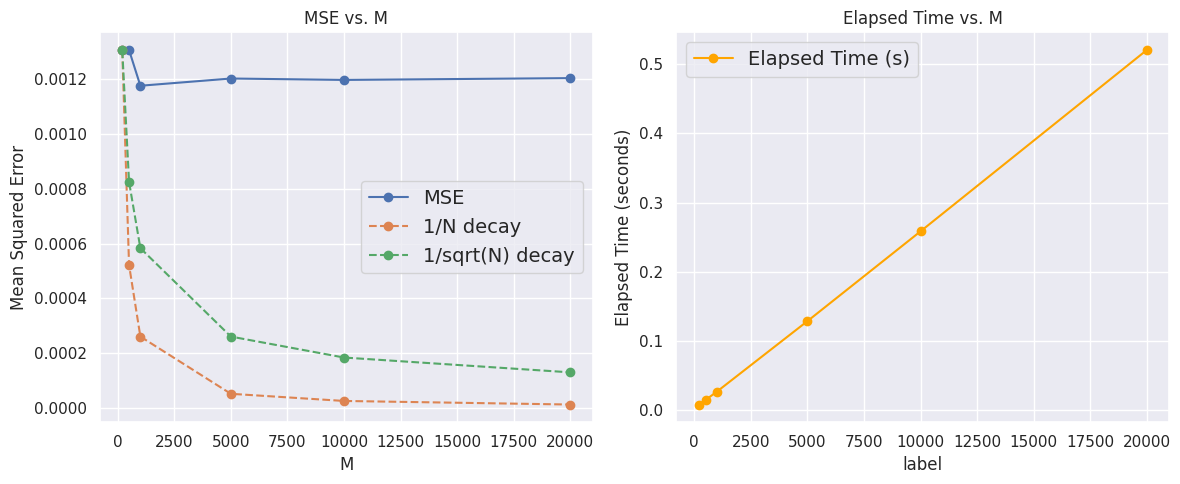

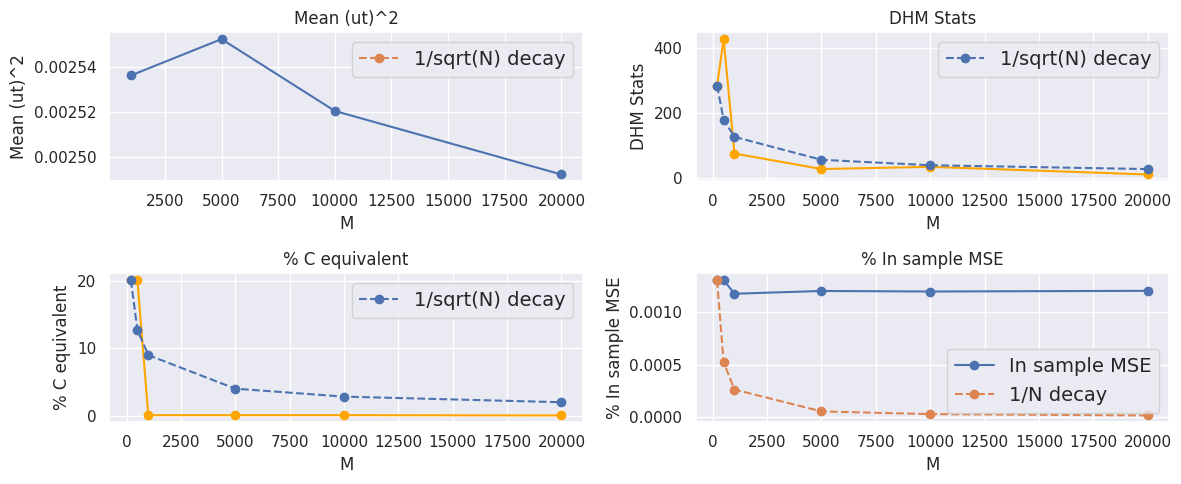

In [26]:
create_plots(df_results_average_M["M"].values, df_results_average_M["MSE"].values, df_results_average_M["Time"].values, df_results_average_M["mean_square_ut"].values, df_results_average_M["dhm_stat"].values, np.abs(df_results_average_M["c_equivalent"]).values, ref_index_plot=0, label="M")

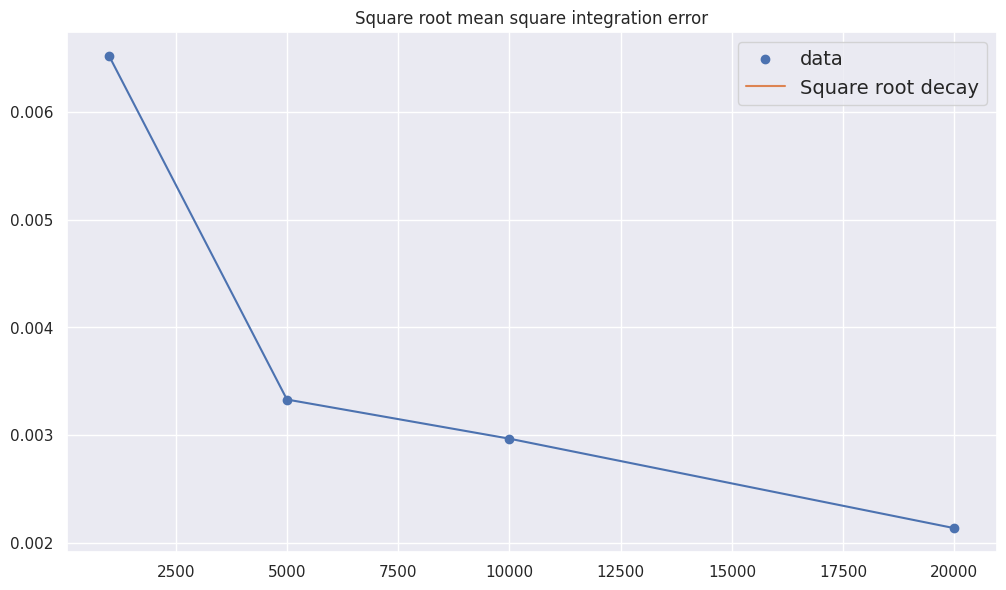

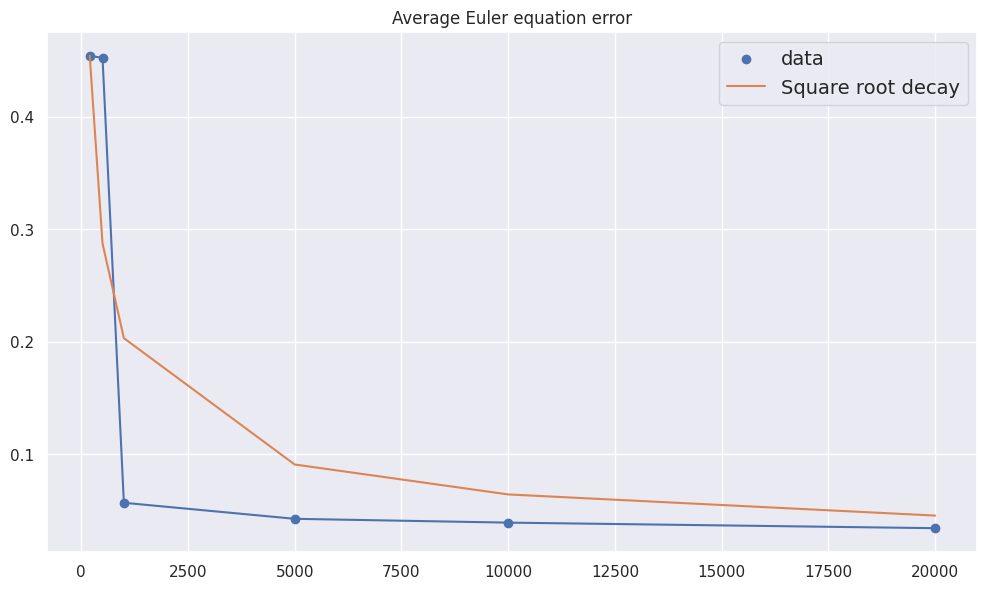

In [27]:
plt.scatter(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"]), label="data")
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"]))
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["MSIE"].values[0] * (df_results_average_M["M"].values[0]/df_results_average_M["M"]) ), label="Square root decay")
plt.title("Square root mean square integration error")
plt.legend()
plt.savefig(output_folder + "MSIE_M.pdf", dpi=300)
plt.show()

plt.scatter(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"]), label="data")
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"]))
plt.plot(df_results_average_M["M"], np.sqrt(df_results_average_M["A_EEE"].values[0] * (df_results_average_M["M"].values[0]/df_results_average_M["M"]) ), label="Square root decay")

plt.title("Average Euler equation error")
plt.savefig(output_folder + "A_EEE_M.pdf", dpi=300)
plt.legend()
plt.show()


### Varying M and N

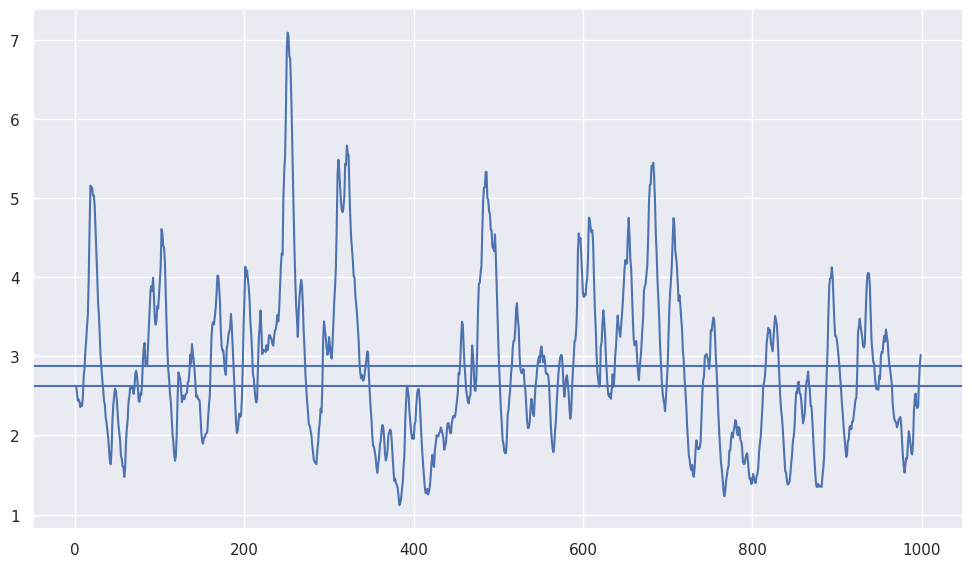

In [28]:
plt.plot(k[:1000])
plt.axhline(y = params.kss, label="k SS")
plt.axhline(y = np.mean(k), label="k mean")

In [29]:
# IF want to measure aroung target MN
list_MN_target = [2000, 10000, 20000, 50000, 100000, 1000000] #Number for MN
list_N_target = [1, 5, 10, 25, 50, 100, 200, 300, 500] #number of innovation draws, per state vector

min_M = 100
# Inplied values for M
list_M = []
list_N = []
for MN in list_MN_target:
    list_M += [round(int(np.maximum(random.uniform(0.8, 1.2)*(MN/N), min_M))/10)*10 for N in list_N_target] #number of state vector draws
    list_N += list_N_target

pd.DataFrame({'M': list_M, 'N': list_N}).head(10)

M    N
0   1930    1
1    350    5
2    160   10
3    100   25
4    100   50
5    100  100
6    100  200
7    100  300
8    100  500
9  10570    1

In [30]:
%%time

list_N = [1, 5, 10, 25, 50, 100, 200, 300] #number of innovation draws, per state vector
list_M = [300, 1000, 5000, 10000, 20000, 50000] #number of state vector draws

init = 100 #100 #burnin, train data

tol = 1e-8 # tolerance on parameter vector
gam = 1.0  # smoothing parameter between two iterations
max_iter = 50 # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

slong_test = 100000
init_test = 1000 #burnin, test data
nb_tot_reps = 5 #nb of repetitions, to smooth out randomness and potential issues with measuring timing

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []
np.random.seed(42)

for (index_N, N) in enumerate(list_N):
    for (index_M, M) in enumerate(list_M):
    #for (N, M) in zip(list_N, list_M):
        for nb_rep in range(nb_tot_reps):
            # Innovations for the out-sample test
            #np.random.seed(nb_rep)
            e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

            slong = init + M

            b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

            # innovation for state vector (not used directly in simulation here
            # for M large, no need to redraw many times.
            e = params.std_tfp * np.random.randn(slong)
            # extra draws for each state: shape (slong, N)
            E = params.std_tfp * np.random.randn(slong, N)

            # Preallocate arrays
            a = np.zeros(slong)
            k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
            mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
            y_out      = np.zeros(slong)    # simulated y
            production = np.zeros(slong)    # production
            inv = np.zeros(slong)           # investment
            cash     = np.zeros(slong)      # cash in hand
            c = np.zeros(slong)             # consumption
            X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
            X_next = np.zeros(params.nb_expl_vars) # regressor, next period
            y_temp = np.zeros(N)            # temporary array for innovations

            # Warmup (compilation) first go
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            iter_num = 1
            crit = 1.0
            # Run a fixed number of iterations (or use while crit > tol)
            start_time = time.perf_counter()
            while iter_num < max_iter:
                if iter_num % redraw_shocks_every == 0:
                    e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

                # Simulation:
                simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

                # Remove burnin and last period
                X_reg = X_data[init:-1, :]
                y_reg = y_out[init:-1]
                # OLS
                bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)
                # Parameter update
                b_new = gam * bt + (1 - gam) * b0_current
                crit = np.max(np.abs(b_new - b0_current))
                b0_current = b_new.copy()
                #print("Iteration:", iter_num, "Conv. crit.:", crit)
                iter_num += 1

            end_time = time.perf_counter()
            elapsed = end_time - start_time

            print(f"Iter {nb_rep}. M = {M}, N = {N}, elapsed time: {elapsed} seconds")
            # Compute residuals and In-sample MSE.
            Res = y_reg - np.dot(X_reg, b0_current)
            MSE = np.mean(Res ** 2)

            # Alternative measure of accuracy
            #mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)

            # Mean squared integration error and EEE
            #IE, EEE = evaluate_IE_and_EEE_Gauss_path(slong_test, params.kss, params.css, params.std_k, params.std_c, e_test, b0_current, params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, len(params.nodes_flat), params.nodes_flat, params.weights, params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis)
            evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                         e_test, b0_current, params.beta, params.gamma, params.alpha,
                                         params.delta, params.rho_tfp, len(params.nodes_flat),
                                         params.nodes_flat, params.weights, params.nb_expl_vars,
                                         params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                         a_test, k_test, mu_test, production_test, inv_test,
                                         IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                         y_temp1_test)


            MSIE = np.mean(IE[init_test:-1]**2)
            A_EEE = np.mean(np.abs(EEE[init_test:-1]))

            print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE, "Average EEE:", A_EEE)
            print("Final b0:", b0_current)

            # Store the results in a dictionary
            results.append({
                "repetition": nb_rep,
                "k": params.nb_expl_vars,
                "M": M,
                "N": N,
                "Time": elapsed,
                "MSE": MSE,
                "MSIE": MSIE,
                "A_EEE": A_EEE
                })

# Create a Pandas DataFrame from the results
df_results = pd.DataFrame(results)
df_results.to_csv(output_folder + "df_results.csv")
print(df_results.head())

Iter 0. M = 300, N = 1, elapsed time: 0.0091065689999823 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.002702638562582707 MISE: 0.00026749801015009015 Average EEE: 0.01027826017493979
Final b0: [-0.29003466  0.08299548 -1.27259639  1.04284862 -0.50330133  0.012839
  0.03497707  0.09846498 -0.37835152 -0.09078903]
Iter 1. M = 300, N = 1, elapsed time: 0.008957039000051736 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.002744352164810143 MISE: 0.002725451773594892 Average EEE: 0.00999891429735408
Final b0: [ 5.78827866e-01 -7.94735250e-01  6.48995688e-01 -1.10412653e+00
 -6.58549517e-02  2.71995912e-01 -1.07645974e-03  1.76809976e-02
  5.55784904e-01 -4.14532845e-01]
Iter 2. M = 300, N = 1, elapsed time: 0.008767718999934004 seconds
Final iteration M: 300 Iterations: 50 OLS MSE: 0.0020136991716136416 MISE: inf Average EEE: 0.5221802983953879
Final b0: [-0.89156587  0.72996238 -1.35622208  0.74654932 -0.59631002 -0.64512891
  0.0504999  -0.06694488 -0.3346857   0.6199

In [31]:
df_results["M_init"]    = df_results["M"] + init #add burnin
df_results["log_N"]    = np.log(df_results["N"])
df_results["log_M"]    = np.log(df_results["M"])
df_results["log_MN"]   = np.log(df_results["M"] * df_results["N"])

df_results["MN_label"] = df_results["M"].astype("str") + "-" + df_results["N"].astype("str")

# Remove outliers (non-convergence)
df_results = df_results[df_results["MSIE"] < 1.0]

df_results_average = df_results.groupby("MN_label").mean().reset_index()
print(df_results_average.head())

# sigma_e**2 * k / (N**alpha * (M - k - 1))
m = smf.ols("np.log(MSIE) ~ np.log(N) + np.log(M - k - 1)", data=df_results_average).fit()
coef_alpha = -m.params["np.log(N)"]
print(coef_alpha)
print(m.summary())


## Simulation + OLS time
# 1. Time moddel
m = smf.ols("Time ~ I(M*N) + M ", data=df_results_average).fit()
print(m.summary())

# 2. Extract point estimates
c_st = m.params["Intercept"]
alpha_MN = m.params["I(M * N)"]      # coeff on M*N
alpha_M  = m.params["M"]             # coeff on M

# 3. Extract standard errors
se_c_st = m.bse["Intercept"]
se_alpha_MN = m.bse["I(M * N)"]      # SE of alpha_MN
se_alpha_M  = m.bse["M"]             # SE of alpha_M

# 4. Extract covariance between the two slopes
cov_M_MN = m.cov_params().loc["M", "I(M * N)"]  # covariance between alpha_M and alpha_MN

# 5. Extra full covariance matrix
print(m.cov_params()) # full var-cov matrix
# Reorder
cov_mat = m.cov_params().loc[['Intercept','M','I(M * N)'], ['Intercept','M','I(M * N)']].values

print("alpha_MN =", alpha_MN, "±", se_alpha_MN)
print("alpha_M  =", alpha_M,  "±", se_alpha_M)
print("Cov(alpha_M, alpha_MN) =", cov_M_MN)

## Simulation + OLS time
## Checking the burnin does not change timing model
## Should only change constant
m = smf.ols("Time ~ I(M_init*N) + M_init ", data=df_results_average).fit()
print(m.summary())

   MN_label  repetition     k       M      N      Time       MSE      MSIE  \
0    1000-1         2.0  10.0  1000.0    1.0  0.023315  0.002047  0.109533   
1   1000-10         2.0  10.0  1000.0   10.0  0.065392  0.000243  0.000007   
2  1000-100         2.0  10.0  1000.0  100.0  0.436863  0.000027  0.000004   
3  1000-200         2.0  10.0  1000.0  200.0  0.830669  0.000014  0.000003   
4   1000-25         2.0  10.0  1000.0   25.0  0.123053  0.000097  0.000004   

      A_EEE  M_init     log_N     log_M     log_MN  
0  0.096877  1100.0  0.000000  6.907755   6.907755  
1  0.001368  1100.0  2.302585  6.907755   9.210340  
2  0.001012  1100.0  4.605170  6.907755  11.512925  
3  0.000959  1100.0  5.298317  6.907755  12.206073  
4  0.001192  1100.0  3.218876  6.907755  10.126631  
0.49728836976058477
                            OLS Regression Results                            
Dep. Variable:           np.log(MSIE)   R-squared:                       0.475
Model:                            O

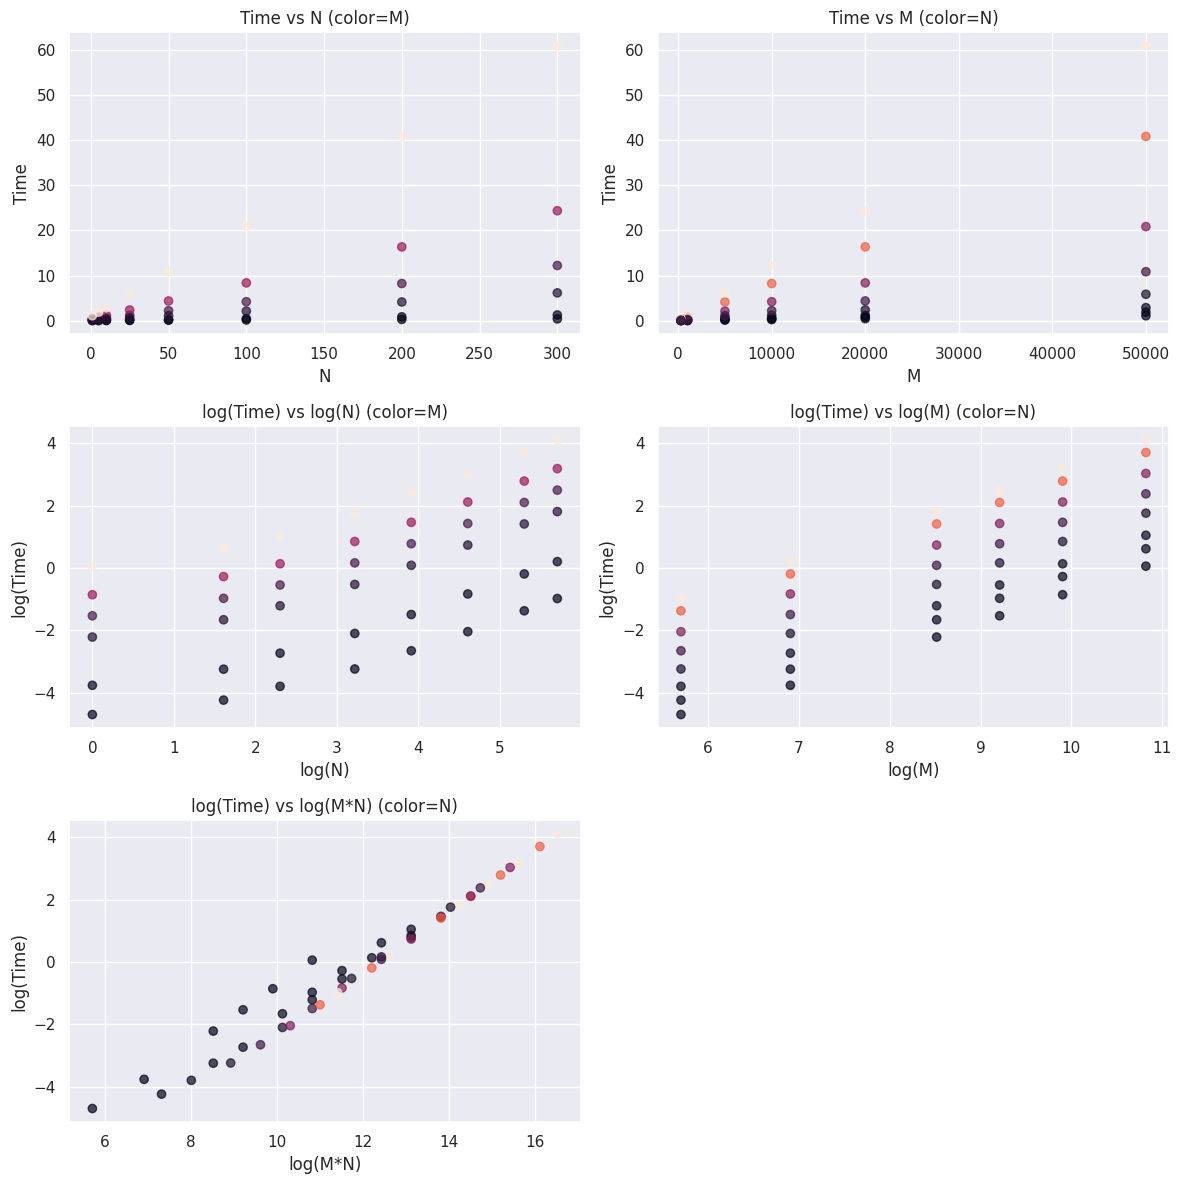

In [32]:
df_results_average["log_Time"] = np.log(df_results_average["Time"])

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 1) Time vs N, colored by M
axs[0, 0].scatter(df_results_average["N"], df_results_average["Time"], c=df_results_average["M"], alpha=0.7)
axs[0, 0].set_xlabel("N")
axs[0, 0].set_ylabel("Time")
axs[0, 0].set_title("Time vs N (color=M)")

# 2) Time vs M, colored by N
axs[0, 1].scatter(df_results_average["M"], df_results_average["Time"], c=df_results_average["N"], alpha=0.7)
axs[0, 1].set_xlabel("M")
axs[0, 1].set_ylabel("Time")
axs[0, 1].set_title("Time vs M (color=N)")

# 3) log_Time vs log_N, colored by M
axs[1, 0].scatter(df_results_average["log_N"], df_results_average["log_Time"], c=df_results_average["M"], alpha=0.7)
axs[1, 0].set_xlabel("log(N)")
axs[1, 0].set_ylabel("log(Time)")
axs[1, 0].set_title("log(Time) vs log(N) (color=M)")

# 4) log_Time vs log_M, colored by N
axs[1, 1].scatter(df_results_average["log_M"], df_results_average["log_Time"], c=df_results_average["N"], alpha=0.7)
axs[1, 1].set_xlabel("log(M)")
axs[1, 1].set_ylabel("log(Time)")
axs[1, 1].set_title("log(Time) vs log(M) (color=N)")

# 5) log_Time vs log_MN, colored by N
axs[2, 0].scatter(df_results_average["log_MN"], df_results_average["log_Time"], c=df_results_average["N"], alpha=0.7)
axs[2, 0].set_xlabel("log(M*N)")
axs[2, 0].set_ylabel("log(Time)")
axs[2, 0].set_title("log(Time) vs log(M*N) (color=N)")

# Remove the unused subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig(output_folder + "plot_Time_MN.pdf", dpi=300)
plt.show()


#### Pareto frontier

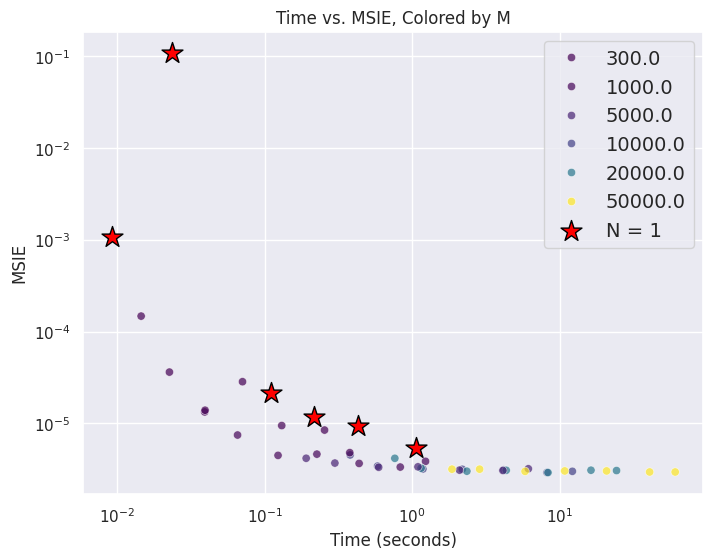

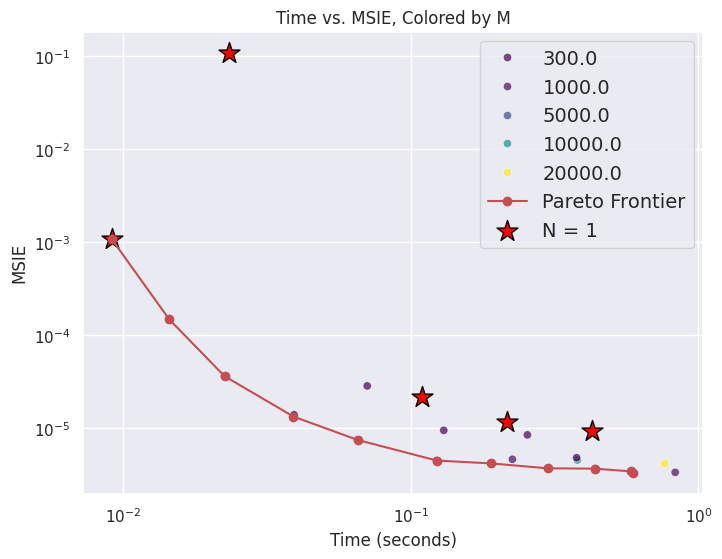

In [33]:
def compute_pareto_front(df, time_col='Time', mse_col='MSIE'):
    # Sort by Time ascending
    df_sorted = df.sort_values(by=time_col, ascending=True)

    # List to store the Pareto front
    pareto_points = []

    # Keep track of the lowest MSE encountered so far
    best_mse_so_far = float('inf')

    for idx, row in df_sorted.iterrows():
        mse_val = row[mse_col]
        if mse_val < best_mse_so_far:
            pareto_points.append(row)
            best_mse_so_far = mse_val

    return pd.DataFrame(pareto_points)

pareto_df = compute_pareto_front(df_results_average)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average, x='Time', y='MSIE', hue='M', palette='viridis', alpha=0.7)
#plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_average[df_results_average['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. MSIE, Colored by M')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_1.pdf", dpi=300)
plt.show()

df_results_sel = df_results_average[df_results_average["Time"] < 1.0]
pareto_df = compute_pareto_front(df_results_sel)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_sel, x='Time', y='MSIE', hue='M', palette='viridis', alpha=0.7)
plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_sel[df_results_sel['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. MSIE, Colored by M')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_2.pdf", dpi=300)
plt.show()


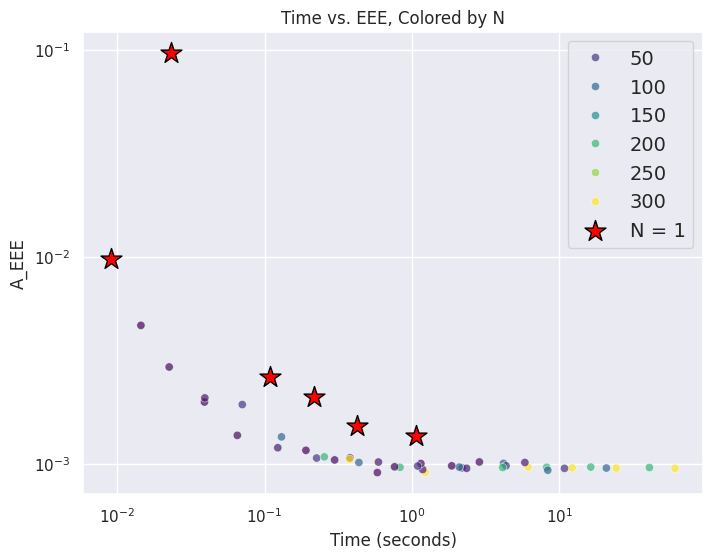

In [34]:
pareto_df = compute_pareto_front(df_results_average, time_col='Time', mse_col='A_EEE')

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average, x='Time', y='A_EEE', hue='N', palette='viridis', alpha=0.7)
#plt.plot(pareto_df['Time'], pareto_df['A_EEE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
optimal_df = df_results_average[df_results_average['N'] == 1]
plt.scatter(optimal_df['Time'], optimal_df['A_EEE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')

plt.xlabel('Time (seconds)')
plt.ylabel('A_EEE')
plt.yscale('log')
plt.xscale('log')
plt.title('Time vs. EEE, Colored by N')
plt.legend()
plt.grid(True)
plt.savefig(output_folder + "Time_vs_EEE_1.pdf", dpi=300)
plt.show()

In [35]:
def optimal_M_N_old(T, k, alpha, alpha0, alpha1, alpha2, eps=1e-12, round_nearest = True):
    """
    Compute the pair (M*, N*) that minimizes MSIE
      E[(…)^2] ∼ σ^2 k / [N^α (M−k−1)]
    subject to the time budget
      T = α0 + α1⋅M⋅N + α2⋅M.

    Parameters
    ----------
    T : float
        Total time budget (must exceed α0).
    k : int
        Number of regressors, including constant
    alpha : float
        Exponent in the integration error ( >1 for well‑posed optimum).
    alpha0 : float
        Intercept term (c_st).
    alpha1 : float
        Coefficient on M⋅N.
    alpha2 : float
        Coefficient on M.
    eps : float, optional
        Threshold below which we treat alpha2 as zero.
    round_nearest : boolean, optional
        If true, round to nearest 10

    Returns
    -------
    M_star, N_star : tuple of floats
        Optimal M and N.
    """
    C0 = T - alpha0
    if C0 <= 0:
        raise ValueError("T must exceed alpha0")
    # α2 → 0 limit
    if abs(alpha2) < eps:
        M_star = alpha * (k + 1) / (alpha - 1)
    else:
        A = (alpha - 1) * C0
        B = alpha * C0 * (k + 1)
        # positive root of α2 M^2 + (α-1)C0 M - α C0 (k+1) = 0
        M_star = (-A + np.sqrt(A**2 + 4 * alpha2 * B)) / (2 * alpha2)

    # back out N from the time constraint
    N_star = (C0 - alpha2 * M_star) / (alpha1 * M_star)

    # round to nearest 10
    if round_nearest == True:
         M_star = int(np.round(M_star/10) * 10)
         N_star = int(np.round(N_star/10) * 10)

    return M_star, N_star


def optimal_M_N(T, k, alpha, alpha0, alpha1, alpha2,
                rho=0.0,
                eps=1e-12,
                round_nearest=True,
                effective_sample_size=True):
    """
    Compute the pair (M*, N*) that minimizes MSIE
      E[(…)^2] ∼ σ^2 k / [N^α (M−k−1)]
    subject to the time budget
      T = α0 + α1⋅M⋅N + α2⋅M.

    If effective_sample_size=True, applies AR(1) correction.
    M** = M* (1+rho^2)/(1-rho^2).
    See Appendix of the paper.
    Then, recompute N using the time budget.

    Parameters
    ----------
    T : float
    k : int
    alpha : float (>1)
    alpha0 : float
    alpha1 : float
    alpha2 : float
    rho : float
      AR(1) coefficient for effective sample-size adjustment.
    eps : float
    round_nearest : bool
    effective_sample_size : bool

    Returns
    -------
    M_star, N_star
    """
    C0 = T - alpha0
    if C0 <= 0:
        raise ValueError("T must exceed alpha0")

    # 1) find the M* ignoring serial correlation
    if abs(alpha2) < eps:
        M_star = alpha * (k + 1) / (alpha - 1)
    else:
        A = (alpha - 1) * C0
        B = alpha * C0 * (k + 1)
        # solve α2 M^2 + (α-1)C0 M - α C0 (k+1) = 0
        M_star = (-A + np.sqrt(A**2 + 4 * alpha2 * B)) / (2 * alpha2)

    # 2) back out N* from the time constraint
    N_star = (C0 - alpha2 * M_star) / (alpha1 * M_star)

    # 3) optionally apply AR(1) effective-M correction
    if effective_sample_size:
        if not (-1 < rho < 1):
            raise ValueError("rho must lie in (-1,1) for effective-M")
        # Increase the value of M* by a factor of (1 + rho) / (1 - rho).
        # Because of serial correaltion, each observation of the state is less "valuable"
        M_eff = M_star * (1 + rho**2) / (1 - rho**2)
        # recompute N under same time budget
        N_eff = (C0 - alpha2 * M_eff) / (alpha1 * M_eff)
        M_star, N_star = M_eff, N_eff

    # 4) optionally round
    if round_nearest:
        M_star = int(np.round(M_star / 10) * 10)
        N_star = int(np.round(N_star / 10) * 10)

    return M_star, N_star

# Delta method to calculate uncertainty aroud M *and N*
def se_MN_star_full(
    M_star, N_star, T, k, alpha,
    alpha_0, alpha_M, alpha_MN,
    se_alpha_0, se_alpha_M, se_alpha_MN,
    cov_mat          # 3×3 numpy array from m.cov_params().values
):
    # Precompute
    C0 = T - alpha_0
    b  = (alpha - 1)*C0
    D  = np.sqrt(b*b + 4*alpha_M*alpha*C0*(k+1))

    # 1) partials for M*
    dM_d0 = -1/(2*alpha_M)*((alpha-1)
             - ((alpha-1)**2 *C0 + 2*alpha*alpha_M*(k+1))/D)
    dM_dM = (alpha*C0*(k+1)/D - M_star)/alpha_M
    dM_dMN= 0.0

    grad_M = np.array([dM_d0, dM_dM, dM_dMN])
    var_M  = grad_M @ cov_mat @ grad_M
    se_M   = np.sqrt(var_M)

    # 2) partials for N*
    dN_d0 = (1/(alpha_MN*M_star)
             - (C0 - alpha_M*M_star)/(alpha_MN*(M_star**2))*dM_d0)
    dN_dM = (-1/alpha_MN
             - (C0 - alpha_M*M_star)/(alpha_MN*(M_star**2))*dM_dM)
    dN_dMN= -N_star/alpha_MN

    grad_N = np.array([dN_d0, dN_dM, dN_dMN])
    var_N  = grad_N @ cov_mat @ grad_N
    se_N   = np.sqrt(var_N)

    return se_M, se_N

target_time = 1
for eff_M in [True, False]:
    for alpha_selected in [coef_alpha, 1.0]:
        M_opt, N_opt = optimal_M_N(target_time, params.nb_expl_vars, alpha_selected, c_st, alpha_MN, alpha_M, rho = params.rho_tfp, effective_sample_size = eff_M)

        se_M_opt, se_N_opt = se_MN_star_full(M_opt, N_opt, target_time, params.nb_expl_vars, alpha_selected,
                                            c_st, alpha_M, alpha_MN,
                                            se_c_st, se_alpha_M, se_alpha_MN, cov_mat)
        print(f"alpha: {alpha_selected}. Effective sample size M: {eff_M}")
        print(f"M*: {M_opt} +/- 2 * {se_M_opt}")
        print(f"N*: {N_opt} +/- 2 * {se_N_opt}")


alpha: 0.49728836976058477. Effective sample size M: True
M*: 134850 +/- 2 * 1087.1553226811504
N*: 0 +/- 2 * 0.05411522147092751
alpha: 1.0. Effective sample size M: True
M*: 3670 +/- 2 * 25.89701401284237
N*: 60 +/- 2 * 0.35370434632660797
alpha: 0.49728836976058477. Effective sample size M: False
M*: 29600 +/- 2 * 276.024362344546
N*: 0 +/- 2 * 0.010604089962379864
alpha: 1.0. Effective sample size M: False
M*: 800 +/- 2 * 3.717872068878434
N*: 300 +/- 2 * 1.0266954281993446


In [36]:
(1 + params.rho_tfp) / (1 - params.rho_tfp)

9.000000000000002

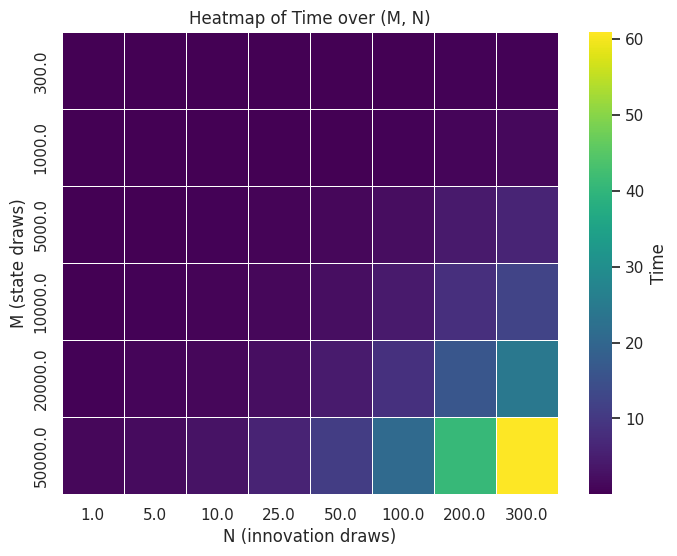

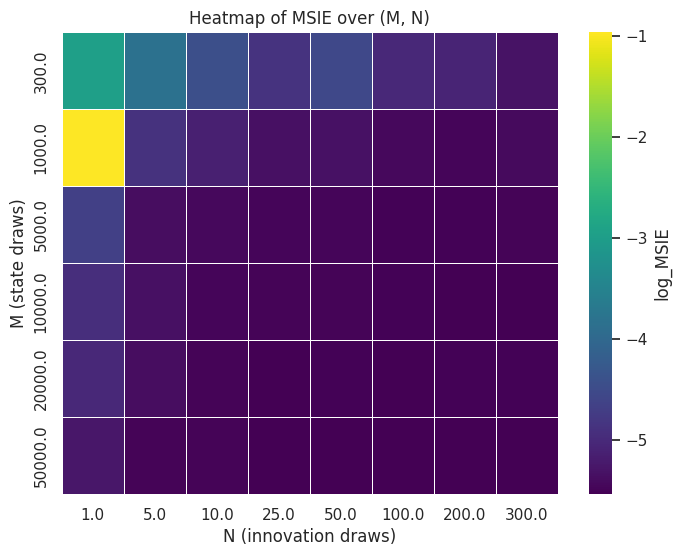

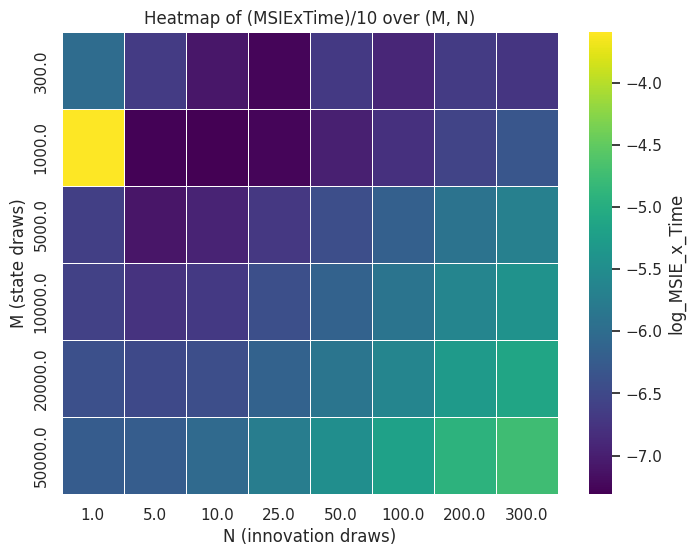

In [37]:
# 1) Pivot MSIE into a matrix with rows=M and columns=N
df_sel = df_results_average[df_results_average["MSIE"] < 1.0].copy()

df_sel["log_MSIE"] = np.log10(df_sel["MSIE"])
df_sel["log_MSIE_Time"] = np.log10(df_sel["MSIE"]/df_sel["Time"])
df_sel["log_MSIE_x_Time"] = np.log10(df_sel["MSIE"]*df_sel["Time"]/10)


# TIME
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='Time',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'Time'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of Time over (M, N)')
plt.show()

# Accuracy
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='log_MSIE',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'log_MSIE'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of MSIE over (M, N)')
plt.show()


# Accuracy-Time
pivot = df_sel.pivot_table(
    index='M',
    columns='N',
    values='log_MSIE_x_Time',
    aggfunc='mean'        # ensures proper aggregation if duplicates exist
).sort_index().sort_index(axis=1)

# 2) Create a mask of the NaN cells
mask = pivot.isnull()

# 3) Plot with seaborn, masking NaNs
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    mask=mask,           # hide cells where pivot is NaN
    cmap='viridis',
    cbar_kws={'label': 'log_MSIE_x_Time'},
    linewidths=0.5,
    linecolor='white'
)

plt.xlabel('N (innovation draws)')
plt.ylabel('M (state draws)')
plt.title('Heatmap of (MSIExTime)/10 over (M, N)')
plt.show()


### Variation around a target time


In [38]:
# Redo regression, but with data close to target times
df_selected = df_results_average[df_results_average["Time"] < 10]

# Accuracy model
m = smf.ols("np.log(MSIE) ~ np.log(N) + np.log(M - k - 1)", data=df_selected).fit()
#coef_alpha = -m.params["np.log(N)"] #Use estimated value
coef_alpha = 1.0 #Use theoretical value
print(coef_alpha)
print(m.summary())

## Simulation + OLS time
# 1. Time moddel
m = smf.ols("Time ~ I(M*N) + M ", data=df_results_average).fit()
print(m.summary())

# 2. Extract point estimates
c_st = m.params["Intercept"]
alpha_MN = m.params["I(M * N)"]      # coeff on M*N
alpha_M  = m.params["M"]             # coeff on M

# 3. Extract standard errors
se_c_st = m.bse["Intercept"]
se_alpha_MN = m.bse["I(M * N)"]      # SE of alpha_MN
se_alpha_M  = m.bse["M"]             # SE of alpha_M

# 4. Extract covariance between the two slopes
cov_M_MN = m.cov_params().loc["M", "I(M * N)"]  # covariance between alpha_M and alpha_MN

# 5. Extra full covariance matrix
print(m.cov_params()) # full var-cov matrix
# Reorder
cov_mat = m.cov_params().loc[['Intercept','M','I(M * N)'], ['Intercept','M','I(M * N)']].values

print("alpha_MN =", alpha_MN, "±", se_alpha_MN)
print("alpha_M  =", alpha_M,  "±", se_alpha_M)
print("Cov(alpha_M, alpha_MN) =", cov_M_MN)


list_N        = []
list_M        = []
list_optimal  = []
list_Time     = []
list_se_N = []
list_se_M = []

list_target_times = [0.1, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
min_M = 50 #Otherwise blows up

for target_time in list_target_times:
    # 1) build candidate grid
    list_N_temp = [1, 10, 100, 1000, 10000]
    N_array     = np.array(list_N_temp)

    # recover M from your linear timing law (without burn-in)
    vals = (target_time - c_st) / (alpha_M + alpha_MN * N_array)

    # 2) correct rounding: apply *10 before comprehension
    M_vals = np.round(vals/10) * 10
    list_M_temp = [int(max(m, min_M)) for m in M_vals]  # ensure M ≥ min_M

    # 3) append the non‐optimal candidates
    list_N       += list_N_temp
    list_M       += list_M_temp
    list_optimal += [0] * len(list_N_temp)
    list_Time    += [target_time] * len(list_N_temp)  # align one‐to‐one
    list_se_N += [0] * len(list_N_temp)
    list_se_M += [0] * len(list_M_temp)

    # 4) compute the theoretical optimum with burn-in
    M_opt, N_opt = optimal_M_N(target_time, params.nb_expl_vars, coef_alpha, c_st, alpha_MN, alpha_M, rho = params.rho_tfp, effective_sample_size = params.effective_sample_size)
    se_M_opt, se_N_opt = se_MN_star_full(M_opt, N_opt, target_time, params.nb_expl_vars, coef_alpha,
                                        c_st, alpha_M, alpha_MN,
                                        se_c_st, se_alpha_M, se_alpha_MN, cov_mat)

    print(f"alpha: {coef_alpha}")
    print(f"M*: {M_opt} +/- 2 * {se_M_opt}")
    print(f"N*: {N_opt} +/- 2 * {se_N_opt}")

    # 5) append the optimal point
    list_N.append(int(np.maximum(1, N_opt)))
    list_M.append(int(M_opt))
    list_optimal.append(1)
    list_Time.append(target_time)
    list_se_N.append(se_N_opt)
    list_se_M.append(se_M_opt)

# 6) build DataFrame
df_MN = pd.DataFrame({
    "M":           list_M,
    "N":           list_N,
    "is_optimal":  list_optimal,
    "target_time": list_Time,
    "se_M":        list_se_M,
    "se_N":        list_se_N
})


1.0
                            OLS Regression Results                            
Dep. Variable:           np.log(MSIE)   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     22.40
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           3.74e-07
Time:                        13:51:57   Log-Likelihood:                -68.603
No. Observations:                  41   AIC:                             143.2
Df Residuals:                      38   BIC:                             148.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.5571      

In [39]:
#----------------------------------
tol = 1e-8 # tolerance on parameter vector
gam = 1.0  # smoothing parameter between two iterations
max_iter = 50 # max number of iterations
redraw_shocks_every = 1000 #redraw new realizations of innovations (new state and innovation vectors)

slong_test = 100000
init_test = 100
nb_tot_reps = 20 #10 #nb of repetitions, to smooth out randomness and potential issues with measuring timing

# Preallocate arrays for test
a_test            = np.zeros(slong_test)
k_test            = np.zeros(slong_test+1)
mu_test           = np.zeros(slong_test+1)
production_test   = np.zeros(slong_test)
inv_test          = np.zeros(slong_test)
IE           = np.zeros(slong_test)
EEE          = np.zeros(slong_test)
cash_test         = np.zeros(slong_test)
c_test            = np.zeros(slong_test)
X_test            = np.zeros((slong_test, params.nb_expl_vars))
X_next_test       = np.zeros(params.nb_expl_vars)
linear_model_test = np.zeros(slong_test)
y_temp1_test      = np.zeros(len(params.nodes_flat))

# to store restults
results = []
np.random.seed(42)

for (N, M, is_optimal) in zip(list_N, list_M, list_optimal):
    for nb_rep in range(nb_tot_reps):
        #np.random.seed(nb_rep)
        # Innovations for the out-sample test
        e_test = params.std_tfp * np.random.randn(slong_test) #New shocks

        slong = init + M

        b0_current = coeff_array_0.copy()  # initial guess (shape (6,))

        # innovation for state vector (not used directly in simulation here
        # for M large, no need to redraw many times.
        e = params.std_tfp * np.random.randn(slong)
        # extra draws for each state: shape (slong, N)
        E = params.std_tfp * np.random.randn(slong, N)

        # Preallocate arrays
        a = np.zeros(slong)
        k      = np.zeros(slong + 1)    # capital path (slong+1 because we update k[i+1])
        mu     = np.zeros(slong + 1)    # Lagrange multiplier on investment constraint
        y_out      = np.zeros(slong)    # simulated y
        production = np.zeros(slong)    # production
        inv = np.zeros(slong)           # investment
        cash     = np.zeros(slong)      # cash in hand
        c = np.zeros(slong)             # consumption
        X_data      = np.zeros((slong, params.nb_expl_vars))   # regressor matrix (6 variables)
        X_next = np.zeros(params.nb_expl_vars) # regressor, next period
        y_temp = np.zeros(N)            # temporary array for innovations

        # Warmup (compilation) first go
        simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

        iter_num = 1
        crit = 1.0
        # Run a fixed number of iterations (or use while crit > tol)
        start_time = time.perf_counter()
        while iter_num < max_iter:
            if iter_num % redraw_shocks_every == 0:
                e[:], E[:,:] = generate_random_arrays(slong, N, params.std_tfp)

            # Simulation:
            simulate_path_N_inplace(M, init, params.kss, e, E, b0_current,
                                params.beta, params.gamma, params.alpha, params.delta, params.rho_tfp, N,
                                params.nb_expl_vars, params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                a, k, mu, y_out, production, inv, cash, c, X_data, X_next, y_temp)

            # Remove burnin and last period
            X_reg = X_data[init:-1, :]
            y_reg = y_out[init:-1]
            # OLS
            bt, _, _, _ = np.linalg.lstsq(X_reg, y_reg, rcond=None)
            # Parameter update
            b_new = gam * bt + (1 - gam) * b0_current
            crit = np.max(np.abs(b_new - b0_current))
            b0_current = b_new.copy()
            #print("Iteration:", iter_num, "Conv. crit.:", crit)
            iter_num += 1
        end_time = time.perf_counter()
        elapsed = end_time - start_time

        print(f"Iter {nb_rep}. M = {M}, N = {N}, elapsed time: {elapsed} seconds")
        # Compute residuals and In-sample MSE.
        Res = y_reg - np.dot(X_reg, b0_current)
        MSE = np.mean(Res ** 2)

        # Alternative measure of accuracy
        #mean_abs_ut, mean_square_ut, std_ut, dhm_stat, c_equivalent = dhm_accuracy_test(params, b0_current, e_test)
        # Mean squared integration error and EEE
        evaluate_IE_and_EEE_Gauss_path_inplace(slong_test, params.kss,
                                         e_test, b0_current, params.beta, params.gamma, params.alpha,
                                         params.delta, params.rho_tfp, len(params.nodes_flat),
                                         params.nodes_flat, params.weights, params.nb_expl_vars,
                                         params.tol_c, params.center_dep_var, params.normalize_dep_var, params.basis,
                                         a_test, k_test, mu_test, production_test, inv_test,
                                         IE, EEE, cash_test, c_test, X_test, X_next_test, linear_model_test,
                                         y_temp1_test)


        MSIE = np.mean(IE[init_test:-1]**2)
        A_EEE = np.mean(np.abs(EEE[init_test:-1]))

        print("Final iteration M:", M, "Iterations:", iter_num, "OLS MSE:", MSE, "MISE:", MSIE, "Average EEE:", A_EEE)
        print("Final b0:", b0_current)

        # Store the results in a dictionary
        results.append({
            "repetition": nb_rep,
            "k": params.nb_expl_vars,
            "M": M,
            "N": N,
            "Time": elapsed,
            "MSE": MSE,
            "MSIE": MSIE,
            "A_EEE": A_EEE,
            "is_optimal": is_optimal
        })

# Create a Pandas DataFrame from the results
df_results_2 = pd.DataFrame(results)
df_results_2.to_csv(output_folder + "df_results_2.csv")
print(df_results_2.head())

Iter 0. M = 4170, N = 1, elapsed time: 0.09578426200005197 seconds
Final iteration M: 4170 Iterations: 50 OLS MSE: 0.0021891994174808925 MISE: 2.5341745885784323e-05 Average EEE: 0.003100931915793691
Final b0: [-0.05933697 -0.07203506 -0.73798246  0.18513305 -0.15406863 -0.29305573
  0.01171416 -0.03733593 -0.06632638  0.26511107]
Iter 1. M = 4170, N = 1, elapsed time: 0.09002746199985268 seconds
Final iteration M: 4170 Iterations: 50 OLS MSE: 0.002359824546419154 MISE: 1.0511102707752678e-05 Average EEE: 0.0022559905617111123
Final b0: [ 9.62455513e-02 -1.84647266e-01 -9.04762935e-01  2.85116628e-01
  4.75936174e-03 -3.47467614e-01  3.94956064e-04 -6.44684086e-02
 -1.28184280e-01  3.48822686e-01]
Iter 2. M = 4170, N = 1, elapsed time: 0.08927371299978404 seconds
Final iteration M: 4170 Iterations: 50 OLS MSE: 0.0025903139010241493 MISE: 2.0246501555338157e-05 Average EEE: 0.0030840714109624926
Final b0: [ 0.00171171 -0.06713196 -1.10080106  0.46632002 -0.03525571 -0.3794147
  0.004318

    MN_label  repetition     k        M        N      Time       MSE  \
0  100-10000         9.5  10.0    100.0  10000.0  4.036001  0.000002   
1    1090-20         9.5  10.0   1090.0     20.0  0.109065  0.000125   
2    11400-1         9.5  10.0  11400.0      1.0  0.243829  0.002405   
3   1170-100         9.5  10.0   1170.0    100.0  0.499293  0.000027   
4  11950-100         9.5  10.0  11950.0    100.0  5.012850  0.000027   

       MSIE     A_EEE  is_optimal     log_N     log_M     log_MN  
0  0.000007  0.001128         0.0  9.210340  4.605170  13.815511  
1  0.000006  0.001218         1.0  2.995732  6.993933   9.989665  
2  0.000010  0.001863         0.0  0.000000  9.341369   9.341369  
3  0.000004  0.000993         0.0  4.605170  7.064759  11.669929  
4  0.000003  0.000961         0.0  4.605170  9.388487  13.993657  


/tmp/ipython-input-3076141351.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df_one['Time'], df_one['MSIE'],


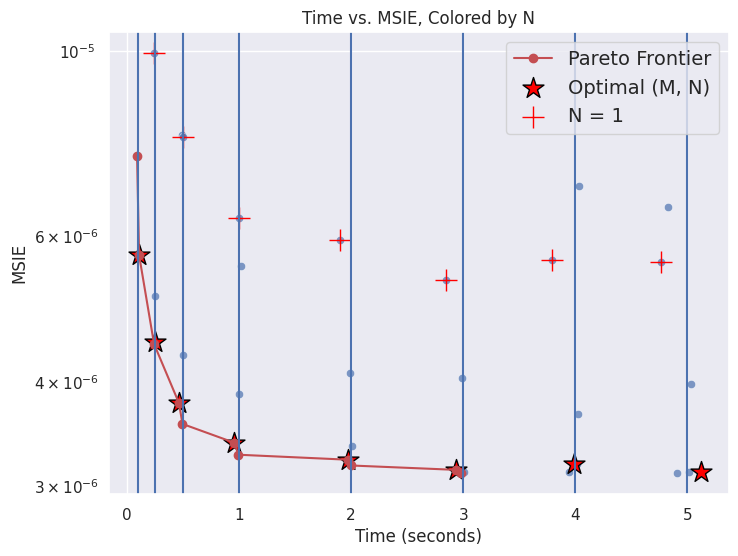

In [64]:
df_results_2["log_N"]    = np.log(df_results_2["N"])
df_results_2["log_M"]    = np.log(df_results_2["M"])
df_results_2["log_MN"]   = np.log(df_results_2["M"] * df_results_2["N"])

df_results_2["MN_label"] = df_results_2["M"].astype("str") + "-" + df_results_2["N"].astype("str")
df_results_average_2 = df_results_2.groupby("MN_label").mean().reset_index()
# Save to disk
df_results_average_2.to_csv(output_folder + "df_results_average_2.csv")
print(df_results_average_2.head())


pareto_df = compute_pareto_front(df_results_average_2)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_results_average_2, x='Time', y='MSIE', alpha=0.7)
plt.plot(pareto_df['Time'], pareto_df['MSIE'], 'r-o', label='Pareto Frontier')

# Now highlight the optimal points
#optimal_df_0 = df_results_average_2[df_results_average_2['N'] == 1]
optimal_df = df_results_average_2[df_results_average_2['is_optimal'] == 1]

plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
            marker='*', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='Optimal (M, N)')


df_one = df_results_average_2[df_results_average_2['N'] == 1]
plt.scatter(df_one['Time'], df_one['MSIE'],
            marker='+', s=250, c='red',
            edgecolors='black', linewidths=1,
            label='N = 1')


for T in list_target_times:
    plt.axvline(x = T, color = 'b')

plt.xlabel('Time (seconds)')
plt.ylabel('MSIE')
plt.yscale('log')
#plt.xscale('log')
plt.title('Time vs. MSIE, Colored by N')
plt.legend(loc= "upper right")
plt.grid(True)
plt.savefig(output_folder + "Time_vs_MSIE_3.pdf", dpi=300)
plt.show()

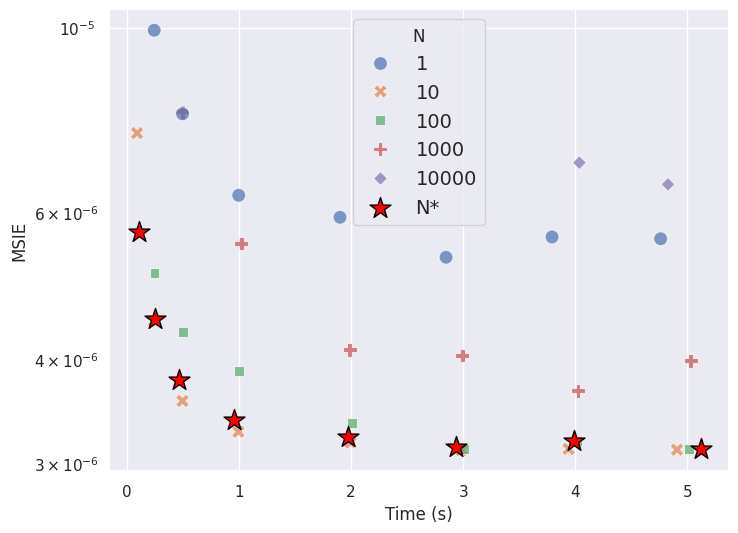

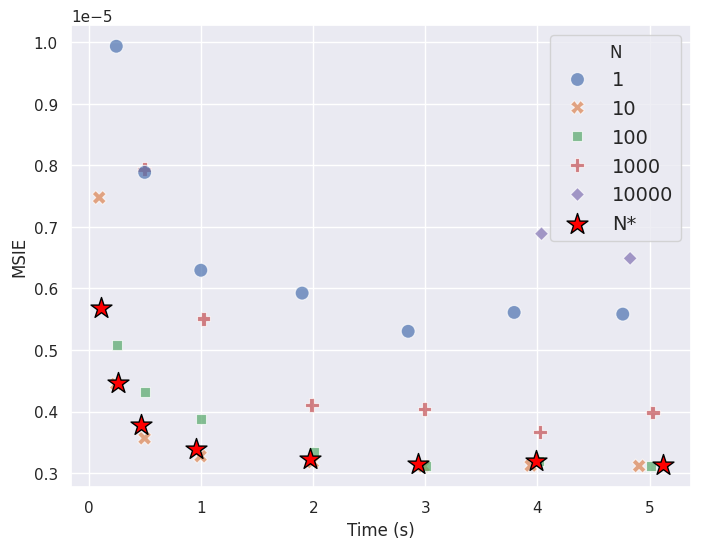

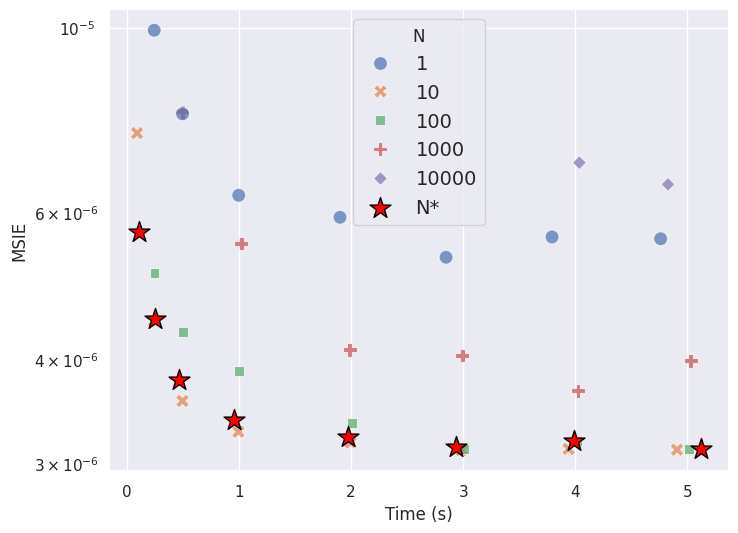

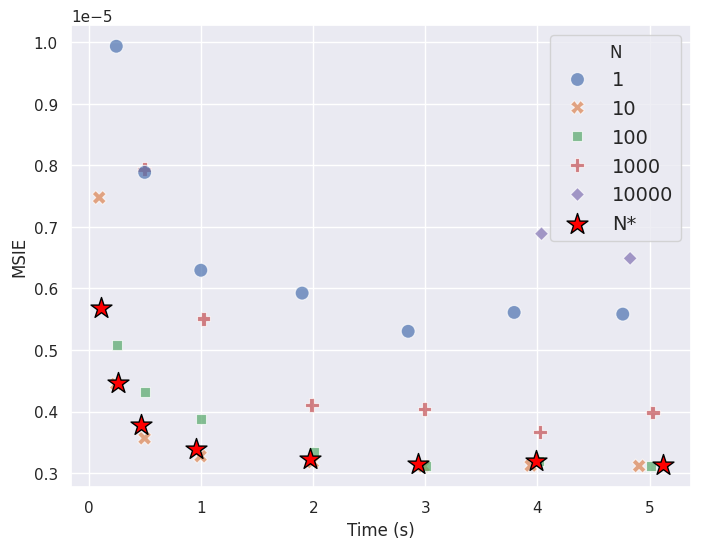

In [65]:
plot_index = 0
for threshold_value in [1e-3, 1e6]: #vary treshold
  for log_yscale in [True, False]: #vary scale
      # Select df for non-optimal
      df = df_results_average_2.copy()
      df = df[df["is_optimal"] == 0]
      df['N_cat'] = df['N'].astype(int).astype(str).astype('category')

      # Now plot:
      plt.figure(figsize=(8,6))
      sns.scatterplot(
          data=df[df["MSIE"] < threshold_value],
          x='Time',
          y='MSIE',
          style='N_cat',
          legend='full',
          hue="N_cat",
          alpha=0.7,
          s=100
      )

      plt.scatter(optimal_df['Time'], optimal_df['MSIE'],
                  marker='*', s=250, c='red',
                  edgecolors='black', linewidths=1,
                  label='N*')

      plt.legend(title='N', loc='best')
      plt.xlabel('Time (s)')
      plt.ylabel('MSIE')

      if log_yscale == True:
          plt.yscale('log')
          #plt.title('Time vs MSIE by N')
      plt.savefig(output_folder + f"Time_vs_MSIE_{4 + plot_index}.pdf", dpi=300)

      plt.show()
      plot_index += 1 #increase plot index

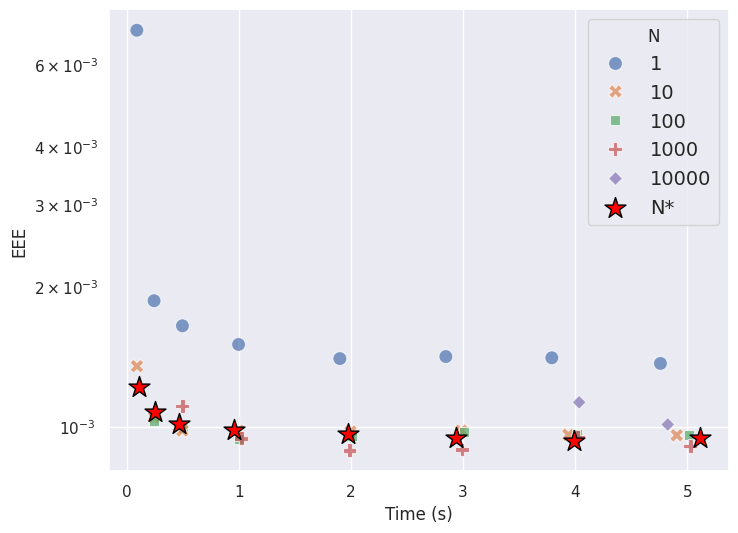

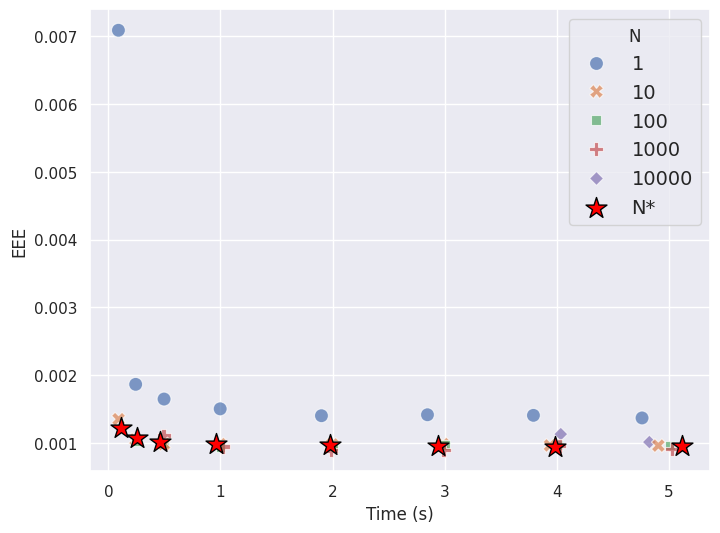

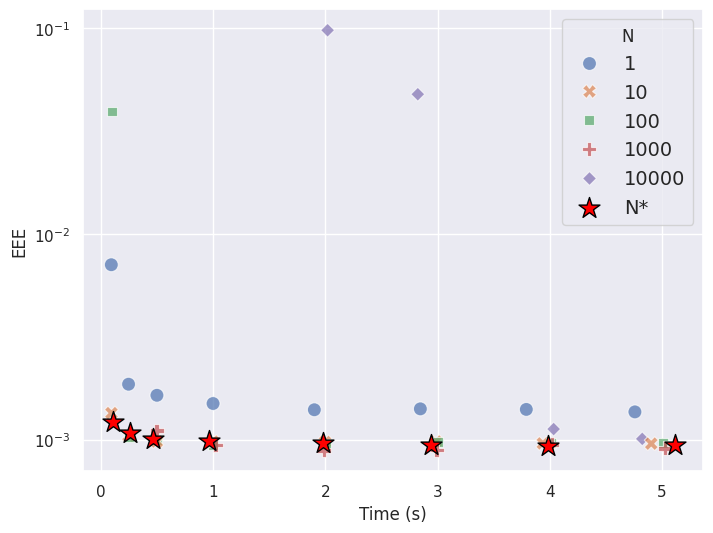

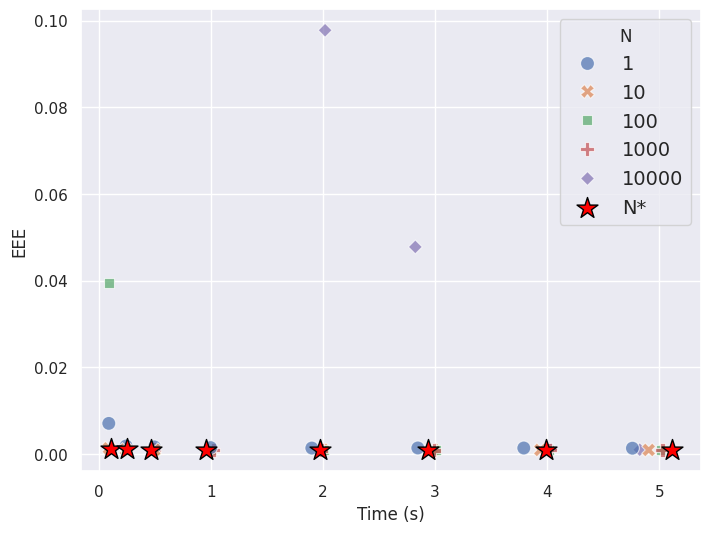

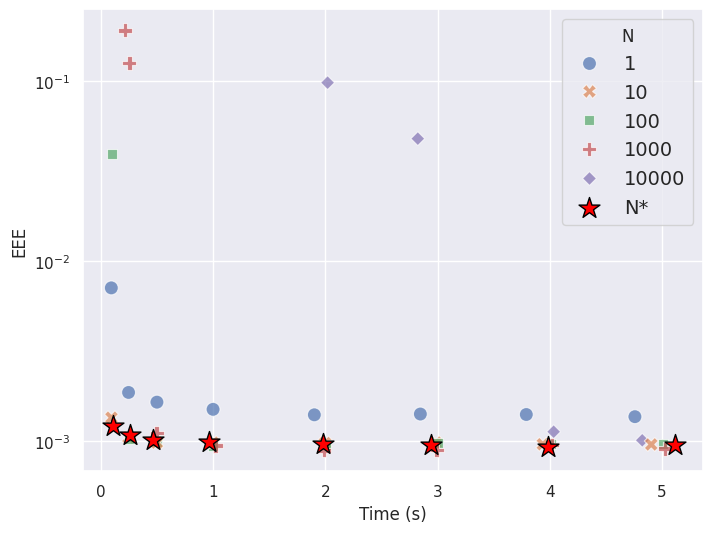

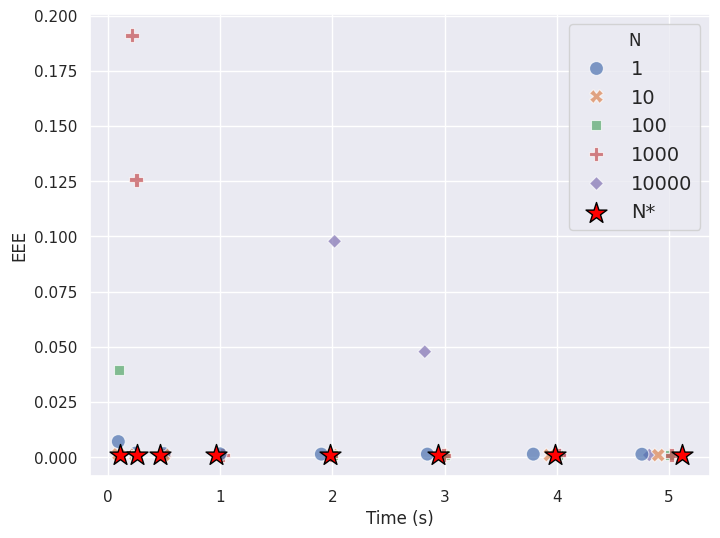

In [66]:
plot_index = 0
for threshold_value in [1e-2, 1e-1, 1e6]: #vary treshold
  for log_yscale in [True, False]: #vary scale
      # Select df for non-optimal
      df = df_results_average_2.copy()
      df = df[df["is_optimal"] == 0]
      df['N_cat'] = df['N'].astype(int).astype(str).astype('category')

      # Now plot:
      plt.figure(figsize=(8,6))
      sns.scatterplot(
          data=df[df["A_EEE"] < threshold_value],
          x='Time',
          y='A_EEE',
          style='N_cat',
          legend='full',
          hue="N_cat",
          alpha=0.7,
          s=100
      )

      plt.scatter(optimal_df['Time'], optimal_df['A_EEE'],
                  marker='*', s=250, c='red',
                  edgecolors='black', linewidths=1,
                  label='N*')

      plt.legend(title='N', loc='best')
      plt.xlabel('Time (s)')
      plt.ylabel('EEE')

      if log_yscale == True:
          plt.yscale('log')
          #plt.title('Time vs MSIE by N')
      plt.savefig(output_folder + f"Time_vs_A_EEE_{plot_index}.pdf", dpi=300)

      plt.show()
      plot_index += 1 #increase plot index

In [67]:
optimal_df

MN_label  repetition     k       M      N      Time       MSE      MSIE  \
1    1090-20         9.5  10.0  1090.0   20.0  0.109065  0.000125  0.000006   
11   1800-30         9.5  10.0  1800.0   30.0  0.255458  0.000085  0.000004   
18   2570-40         9.5  10.0  2570.0   40.0  0.464402  0.000064  0.000004   
20   3670-60         9.5  10.0  3670.0   60.0  0.958309  0.000043  0.000003   
28   5200-90         9.5  10.0  5200.0   90.0  1.975181  0.000030  0.000003   
32  6380-110         9.5  10.0  6380.0  110.0  2.938330  0.000025  0.000003   
36  7370-130         9.5  10.0  7370.0  130.0  3.988110  0.000021  0.000003   
38  8240-150         9.5  10.0  8240.0  150.0  5.118019  0.000019  0.000003   

       A_EEE  is_optimal     log_N     log_M     log_MN  
1   0.001218         1.0  2.995732  6.993933   9.989665  
11  0.001077         1.0  3.401197  7.495542  10.896739  
18  0.001015         1.0  3.688879  7.851661  11.540541  
20  0.000984         1.0  4.094345  8.207947  12.302292  
28  0.000963         1.0  4.499810  8.556414  13.056224  
32  0.000947         1.0  4.700480  8.760923  13.461404  
36  0.000930         1.0  4.867534  8.905173  13.772707  
38  0.000946         1.0  5.010635  9.016756  14.027391

In [68]:
df_results_average_2

MN_label  repetition     k         M        N      Time           MSE  \
0   100-10000         9.5  10.0     100.0  10000.0  4.036001  1.619404e-06   
1     1090-20         9.5  10.0    1090.0     20.0  0.109065  1.245370e-04   
2     11400-1         9.5  10.0   11400.0      1.0  0.243829  2.404529e-03   
3    1170-100         9.5  10.0    1170.0    100.0  0.499293  2.650566e-05   
4   11950-100         9.5  10.0   11950.0    100.0  5.012850  2.745741e-05   
5    120-1000         9.5  10.0     120.0   1000.0  0.494647  3.164620e-06   
6   120-10000         9.5  10.0     120.0  10000.0  4.826323  1.391401e-06   
7   1240-1000         9.5  10.0    1240.0   1000.0  5.027617  4.240444e-06   
8    143820-1         9.5  10.0  143820.0      1.0  2.846877  2.379897e-03   
9     1530-10         9.5  10.0    1530.0     10.0  0.091191  2.471736e-04   
10   17370-10         9.5  10.0   17370.0     10.0  0.995378  2.492480e-04   
11    1800-30         9.5  10.0    1800.0     30.0  0.255458  8.535818e-05   
12   191970-1         9.5  10.0  191970.0      1.0  3.791982  2.383550e-03   
13    210-100         9.5  10.0     210.0    100.0  0.092779  2.455904e-05   
14    23440-1         9.5  10.0   23440.0      1.0  0.496941  2.386555e-03   
15   2360-100         9.5  10.0    2360.0    100.0  0.999788  2.643667e-05   
16   240130-1         9.5  10.0  240130.0      1.0  4.760975  2.392159e-03   
17   250-1000         9.5  10.0     250.0   1000.0  1.021339  3.367516e-06   
18    2570-40         9.5  10.0    2570.0     40.0  0.464402  6.440927e-05   
19   34970-10         9.5  10.0   34970.0     10.0  1.996268  2.503750e-04   
20    3670-60         9.5  10.0    3670.0     60.0  0.958309  4.346554e-05   
21     4170-1         9.5  10.0    4170.0      1.0  0.089952  2.424035e-03   
22    4170-10         9.5  10.0    4170.0     10.0  0.242903  2.479410e-04   
23    47510-1         9.5  10.0   47510.0      1.0  0.997621  2.378019e-03   
24   4760-100         9.5  10.0    4760.0    100.0  2.006798  2.731834e-05   
25   490-1000         9.5  10.0     490.0   1000.0  1.986959  3.766160e-06   
26    50-1000         9.5  10.0      50.0   1000.0  0.210455  2.812738e-06   
27   50-10000         9.5  10.0      50.0  10000.0  2.019510  7.010579e-07   
28    5200-90         9.5  10.0    5200.0     90.0  1.975181  3.031269e-05   
29   52580-10         9.5  10.0   52580.0     10.0  2.984404  2.482368e-04   
30    570-100         9.5  10.0     570.0    100.0  0.246862  2.608487e-05   
31    60-1000         9.5  10.0      60.0   1000.0  0.250040  2.460650e-06   
32   6380-110         9.5  10.0    6380.0    110.0  2.938330  2.486526e-05   
33   70-10000         9.5  10.0      70.0  10000.0  2.824125  6.907390e-07   
34   70180-10         9.5  10.0   70180.0     10.0  3.939526  2.497773e-04   
35   7160-100         9.5  10.0    7160.0    100.0  3.006019  2.752940e-05   
36   7370-130         9.5  10.0    7370.0    130.0  3.988110  2.138487e-05   
37   740-1000         9.5  10.0     740.0   1000.0  2.992376  4.168703e-06   
38   8240-150         9.5  10.0    8240.0    150.0  5.118019  1.902156e-05   
39    8570-10         9.5  10.0    8570.0     10.0  0.496330  2.482489e-04   
40   87780-10         9.5  10.0   87780.0     10.0  4.906559  2.501701e-04   
41   9560-100         9.5  10.0    9560.0    100.0  4.014322  2.722868e-05   
42    95670-1         9.5  10.0   95670.0      1.0  1.901081  2.386330e-03   
43   990-1000         9.5  10.0     990.0   1000.0  4.022453  4.616875e-06   

        MSIE     A_EEE  is_optimal     log_N      log_M     log_MN  
0   0.000007  0.001128         0.0  9.210340   4.605170  13.815511  
1   0.000006  0.001218         1.0  2.995732   6.993933   9.989665  
2   0.000010  0.001863         0.0  0.000000   9.341369   9.341369  
3   0.000004  0.000993         0.0  4.605170   7.064759  11.669929  
4   0.000003  0.000961         0.0  4.605170   9.388487  13.993657  
5   0.000008  0.001107         0.0  6.907755   4.787492  11.695247  
6   0.00000

In [69]:
df_MN

M      N  is_optimal  target_time       se_M      se_N
0     4170      1           0         0.10   0.000000  0.000000
1     1530     10           0         0.10   0.000000  0.000000
2      210    100           0         0.10   0.000000  0.000000
3       50   1000           0         0.10   0.000000  0.000000
4       50  10000           0         0.10   0.000000  0.000000
5     1090     20           1         0.10   9.762751  0.476647
6    11400      1           0         0.25   0.000000  0.000000
7     4170     10           0         0.25   0.000000  0.000000
8      570    100           0         0.25   0.000000  0.000000
9       60   1000           0         0.25   0.000000  0.000000
10      50  10000           0         0.25   0.000000  0.000000
11    1800     30           1         0.25  13.638152  0.261429
12   23440      1           0         0.50   0.000000  0.000000
13    8570     10           0         0.50   0.000000  0.000000
14    1170    100           0         0.50   0.000000  0.000000
15     120   1000           0         0.50   0.000000  0.000000
16      50  10000           0         0.50   0.000000  0.000000
17    2570     40           1         0.50  18.546031  0.239956
18   47510      1           0         1.00   0.000000  0.000000
19   17370     10           0         1.00   0.000000  0.000000
20    2360    100           0         1.00   0.000000  0.000000
21     250   1000           0         1.00   0.000000  0.000000
22      50  10000           0         1.00   0.000000  0.000000
23    3670     60           1         1.00  25.897014  0.353704
24   95670      1           0         2.00   0.000000  0.000000
25   34970     10           0         2.00   0.000000  0.000000
26    4760    100           0         2.00   0.000000  0.000000
27     490   1000           0         2.00   0.000000  0.000000
28      50  10000           0         2.00   0.000000  0.000000
29    5200     90           1         2.00  36.290155  0.559245
30  143820      1           0         3.00   0.000000  0.000000
31   52580     10           0         3.00   0.000000  0.000000
32    7160    100           0         3.00   0.000000  0.000000
33     740   1000           0         3.00   0.000000  0.000000
34      70  10000           0         3.00   0.000000  0.000000
35    6380    110           1         3.00  44.369969  0.716829
36  191970      1           0         4.00   0.000000  0.000000
37   70180     10           0         4.00   0.000000  0.000000
38    9560    100           0         4.00   0.000000  0.000000
39     990   1000           0         4.00   0.000000  0.000000
40     100  10000           0         4.00   0.000000  0.000000
41    7370    130           1         4.00  51.163381  0.849384
42  240130      1           0         5.00   0.000000  0.000000
43   87780     10           0         5.00   0.000000  0.000000
44   11950    100           0         5.00   0.000000  0.000000
45    1240   1000           0         5.00   0.000000  0.000000
46     120  10000           0         5.00   0.000000  0.000000
47    8240    150           1         5.00  57.140295  0.965886

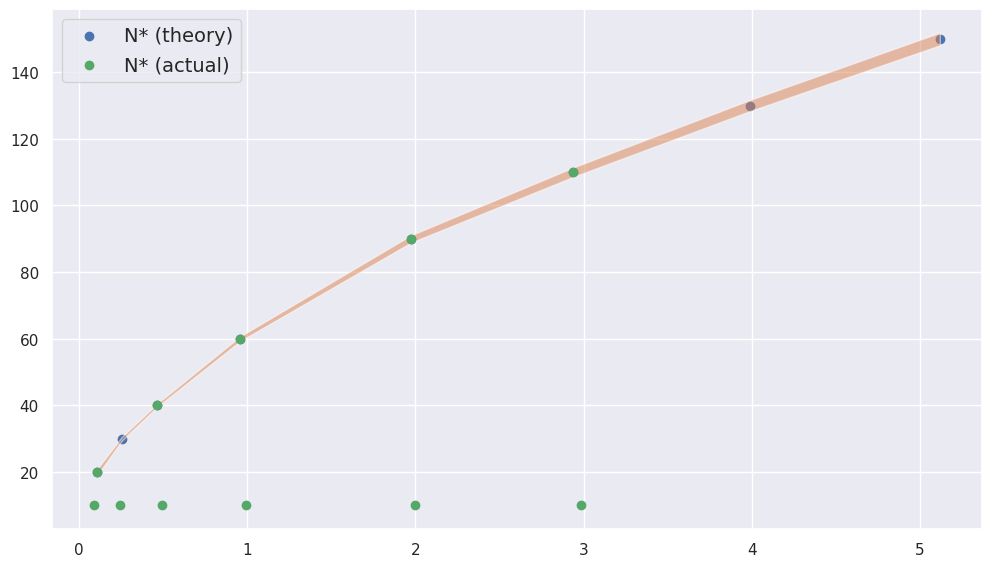

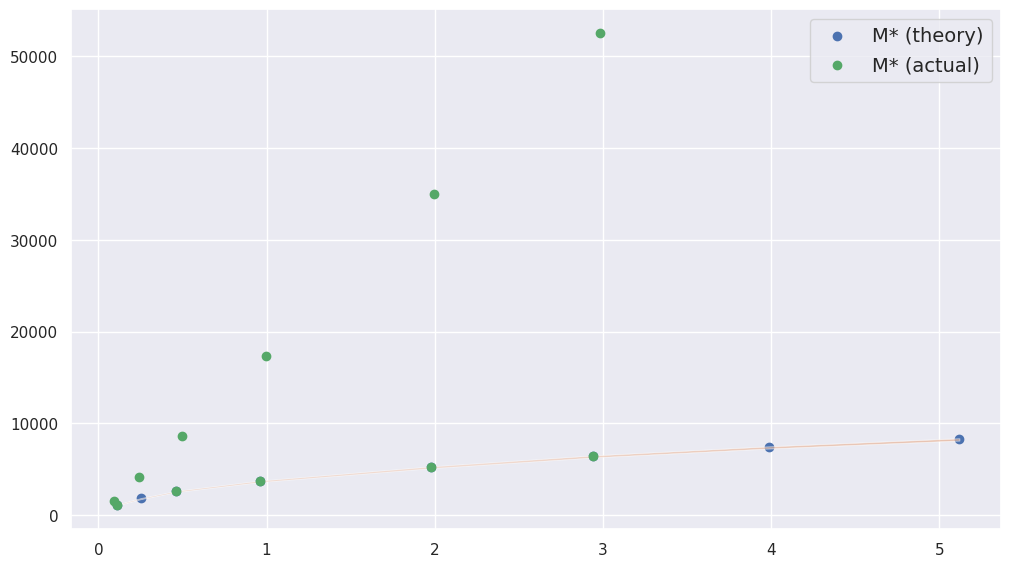

In [70]:
df_MN_sel = df_MN[df_MN["is_optimal"] == 1]
df = df_results_average_2[df_results_average_2["is_optimal"] == True].copy()
df.sort_values("Time", inplace=True)
plt.scatter(df["Time"], df["N"], label="N* (theory)")
plt.fill_between(df["Time"], df_MN_sel['N'] -1.96*df_MN_sel['se_N'], df_MN_sel['N']+ 1.96*df_MN_sel['se_N'], alpha=0.5)

plt.scatter(pareto_df["Time"], pareto_df["N"], label="N* (actual)")
plt.legend()
plt.show()

df = df_results_average_2[df_results_average_2["is_optimal"] == True].copy()
df.sort_values("Time", inplace=True)
plt.scatter(df["Time"], df["M"], label="M* (theory)")
plt.fill_between(df["Time"], df_MN_sel['M'] -1.96*df_MN_sel['se_M'], df_MN_sel['M']+ 1.96*df_MN_sel['se_M'], alpha=0.5)
plt.scatter(pareto_df["Time"], pareto_df["M"], label="M* (actual)")
plt.legend()
plt.show()

---

## Hardware details

In [71]:
!python3 --version

Python 3.11.13


In [72]:
cpuinfo.get_cpu_info()

{'python_version': '3.11.13.final.0 (64 bit)',
 'cpuinfo_version': [9, 0, 0],
 'cpuinfo_version_string': '9.0.0',
 'arch': 'X86_64',
 'bits': 64,
 'count': 8,
 'arch_string_raw': 'x86_64',
 'vendor_id_raw': 'AuthenticAMD',
 'brand_raw': 'AMD EPYC 7B12',
 'hz_advertised_friendly': '2.2500 GHz',
 'hz_actual_friendly': '2.2500 GHz',
 'hz_advertised': [2249998000, 0],
 'hz_actual': [2249998000, 0],
 'model': 49,
 'family': 23,
 'flags': ['3dnowext',
  '3dnowprefetch',
  'abm',
  'adx',
  'aes',
  'apic',
  'arat',
  'avx',
  'avx2',
  'bmi1',
  'bmi2',
  'clflush',
  'clflushopt',
  'clwb',
  'clzero',
  'cmov',
  'cmp_legacy',
  'constant_tsc',
  'cpuid',
  'cr8_legacy',
  'cx16',
  'cx8',
  'de',
  'extd_apicid',
  'f16c',
  'fma',
  'fpu',
  'fsgsbase',
  'fxsr',
  'fxsr_opt',
  'ht',
  'hypervisor',
  'ibpb',
  'ibrs',
  'lahf_lm',
  'lm',
  'mca',
  'mce',
  'misalignsse',
  'mmx',
  'mmxext',
  'movbe',
  'msr',
  'mtrr',
  'nonstop_tsc',
  'nopl',
  'npt',
  'nrip_save',
  'nx',
  '

### Saving and closing on Colab

In [73]:
# Copy to drive
if on_Colab==True:
    drive.mount('/gdrive', force_remount=True)

    zip_filename = f"{output_extension}"  # No '.zip' extension here yet (shutil adds it)
    output_zip_full_path = g_drive_path + zip_filename

    # Compress the folder into the named zip file
    shutil.make_archive(output_zip_full_path, 'zip', output_extension)

    # Unmount Drive safely
    drive.flush_and_unmount()
    print(f'Backup {zip_filename}.zip completed and saved to Google Drive at {g_drive_path}.')


Mounted at /gdrive
Backup irreversible_investment_Colab_9.zip completed and saved to Google Drive at /gdrive/My Drive/bc_MC_PEA/6.irreversible_investment/.


In [74]:
disconnect_when_done = False

if on_Colab==True:
    # Wait 2 minutes
    time.sleep(120)

    ## Close session
    from google.colab import runtime
    if disconnect_when_done==True:
      print("Closing runtime")
      runtime.unassign()

In [75]:
params.rho_tfp

0.8

---

## References


*  